<h1>Analyzing Youtube Video Data from Most Popular Fitness Channels featuring women </h1>

<h2> 1. Aims, objectives, background </h2>

<h3> 1.1 Introduction </h3>

Established in 2005, YouTube has evolved into the second-largest search engine globally, processing over 3 billion searches monthly, trailing only behind Google. Despite its pervasive influence, there remains a pervasive lack of clarity surrounding the mechanics of the YouTube algorithm and the determinants of a video's visibility and recommendation over others. YouTube boasts one of the most expansive and sophisticated industrial recommendation systems in existence.

For content creators, deciphering the factors influencing a video's success proves to be a formidable challenge. Numerous misconceptions circulate regarding the metrics contributing to a video's prominence, such as the significance of likes, comments, or the optimal duration of a video. Navigating through these uncertainties requires experimentation and a keen observation of trends within specific niches, shedding light on the elusive nature of YouTube's recommendation dynamics.

<h3> 1.2 Aims and objectives </h3>

Physical health is a huge component of overall well being. Personally, I exercise mostly by following YouTube videos created by female fitness influencers. As someone who is grateful to these people for sharing such valuable content for free, I wish to understand what does it take to succeed in this space, and what kind of fitness content is consumed by the rest of the world.

With this project, I would like to explore the following: 

* Work with Youtube API and how to obtain video data.
* Analyze video data and verify different commonly considered features about what makes a video do well on Youtube, for example:
    * Number of likes and comments
    * Video duration
    * Title length
    * Tags 
    * Temporal features: how often and what time of the week do they upload new videos?
    * Explore the trending topics using NLP techniques
    * Which popular topics are being covered in the videos (e.g. using wordcloud for video titles)?
    * Which questions are being asked in the comment sections in the videos
* Some budding ideas: the influence of shorts, virality factor, "challenge" based spread of videos.

<h3> 1.3 Steps of the project </h3>
    <ol>
    <li> Obtain video meta data via Youtube API for the top 10-15 channels in the data science niche (this includes several small steps: create a developer key, request data and transform the responses into a usable data format) </li>
<li> Prepocess data and engineer additional features for analysis </li>
<li> Exploratory data analysis </li>
<li> Conclusions </li>
    </ol>
    
<h3> 1.4. Dataset </h3>

<h4> Data selection </h4>

I have created my own dataset using the Google Youtube Data API version 3.0. The exact steps of data creation is presented in section 2. Data Creation below.

<h4> Data limitations </h4>

The dataset is a real-world dataset and suitable for the research. However, the selection of the top 11 Youtube channels (that feature videos that have English language titles) to include in the research is purely based on my knowledge of the internet and might not be accurate. My definition is "popular" is only based on subscriber count but there are other metrics that could be taken into consideration as well (e.g. views, engagement). The top 11 also seems arbitrary given the plethora of channels on Youtube. There might be smaller channels that might also very interesting to look into, which is a potential direction to explore in the future.

<h4> Ethics of data source </h4>

According to Youtube API's guide, the usage of Youtube API is free of charge given that your application send requests within a quota limit. "The YouTube Data API uses a quota to ensure that developers use the service as intended and do not create applications that unfairly reduce service quality or limit access for others. " The default quota allocation for each application is 10,000 units per day, and you could request additional quota by completing a form to YouTube API Services if you reach the quota limit.

Since all data requested from Youtube API is public data (which everyone on the Internet can see on Youtube), there is no particular privacy issues as far as I am concerned. In addition, the data is obtained only for research purposes in this case and not for any commercial interests

<h2> TLDR; </h2>

* My suggestions to aspiring creators:
    * Create <b> 5-15 minute videos (warm ups, stretches, ab workouts, etc.) for repeat viewership </b> and to help those who are strapped for time, and those who want to start/maintain their exercise streak.
    * Post <b> shorts to increase reach and engagement </b>.
    * While shorter videos get more views per video, <b> established YouTubers have a more consistent audience that tune into their longer videos as well </b>. This would also boost your monetization - as YouTube can put more ads in longer videos.
    * Recommended themes: <b> motivational and transformation videos with body positive messaging </b> to inspire your viewers to start their own journey.
    * Many home workout videos target the full body, but ab videos tend to be popular as well, as noted earlier.
    * <b> Include terms like "Fat burn" , "hiit" (high intensity interval training), "challenge" in your titles </b> : they are quite popular - catering to those who have fat/weight loss as their target. YouTubers tend to encourage viewers to take on the challenge and consistenly perform certain workouts of their to see coveted results (such as abs in 15 days).
    * Mention whether your workout needs <b> equipment </b> is recommended as many people who engage in home exercises are at the beginner-intermediate level of their fitness journey and may not have dumbells and other exercise equipment.
    * Mentioning the <b> parts of the body that are being targeted - leg , booty, thigh </b> is a good strategy.
    * Mentioning the <b> duration of the workout (in minutes) </b> is standard practice among the chosen set of YouTubers.
    * <em> Being descriptive doesn't hurt. </em> Most-viewed videos tend to have average title length of 40-75 characters. 
    * Several videos feature 20-30 tags, so don't be shy while tagging.
    
* There is a high correlation between likes, comments and views. 

* Comments appear to be a slightly better indicator for interaction than likes.

* The number of likes seem to follow the "social proof", which means the more views the video has, the more people will like it.

* Comments on videos are generally positive.

In [1]:
#pip install --upgrade google-api-python-client
#pip install google_auth_oauthlib
#pip install wordcloud
#pip install isodate
#pip install python-dotenv

In [2]:
import pandas as pd
import numpy as np
from dateutil import parser
import isodate
import math
from scipy import stats
# Data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
#plt.style.use('fivethirtyeight')
import ast
pd.set_option('display.max_rows', 100)
pd.option_context('format.precision', 2)

In [3]:
# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud
import os
from dotenv import load_dotenv

from googleapiclient.discovery import build
import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors
from IPython.display import JSON
scopes = ["https://www.googleapis.com/auth/youtube.readonly"]
import json

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shralva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shralva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
load_dotenv()
# Disable OAuthlib's HTTPS verification when running locally.
# *DO NOT* leave this option enabled in production.

api_service_name = "youtube"
api_version = "v3"
client_secrets_file = "client_secret.json"

api_key = os.getenv("api_key") 
youtube = build('youtube', 'v3', developerKey=api_key)

<b> Please refer to images data/howToGetChannelId-1.png and data/howToGetChannelId-2.png on how to get channel ids as of Nov 2023. </b>

<h2> 2. Data creation with YouTube API </h2>

In [5]:
channelIdDf = pd.read_csv("data/youtuberChannelIds.csv", names = ["channelName", "channelId"])

In [6]:
channel_ids_ = list(channelIdDf["channelId"])

In [7]:
parts_ = ["snippet", "contentDetails", "statistics", "topicDetails"]

In [8]:
def get_channel_stats(youtube, channel_ids):
    """
    Get channel statistics: title, description, subscriber count, view count, 
    video count, upload playlist id, topicIds and topicCategories
    
    Params:
    youtube: the build object from googleapiclient.discovery
    channels_ids: list of channel IDs
    
    Returns:
    Dataframe containing the channel statistics for all channels in the provided list: title, subscriber count, view count, video count, upload playlist
    
    """
    all_channel_data = []
    parts_ = ["snippet", "contentDetails", "statistics", "topicDetails"]
    next_page_token = None
    while True:
        if next_page_token:
            request = youtube.channels().list(
                        part=','.join(parts_),
                        id=','.join(channel_ids), 
                        pageToken = next_page_token)
        else:
            request = youtube.channels().list(
                        part=','.join(parts_),
                        id=','.join(channel_ids))
        response = request.execute()
        for i in range(len(response['items'])):
            data = dict(channelName = response['items'][i]['snippet']['title'],
                        description = response['items'][i]['snippet']['description'],
                        country = response['items'][i]['snippet'].get('country','blank'),
                        subscribers = response['items'][i]['statistics']['subscriberCount'],
                        views = response['items'][i]['statistics']['viewCount'],
                        totalVideos = response['items'][i]['statistics']['videoCount'],
                        playlistId = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'],
                        topicIds = ';'.join(response['items'][i]['topicDetails']['topicIds']),
                        topicCategories = ';'.join(response['items'][i]['topicDetails']['topicCategories']))
            all_channel_data.append(data)
        next_page_token = response.get('nextPageToken')
        if next_page_token is None:
            break
    
    return pd.DataFrame(all_channel_data)
        

YouTube Playlist list API Response example:

In [9]:
#request = youtube.playlistItems().list(
#                        part='contentDetails',
#                        playlistId = "UUsLF0qPTpkYKq81HsjgzhwQ",
#                        maxResults = 5,
#                        pageToken = None)
#response = request.execute()
#response

In [10]:
def get_video_ids(youtube, playlist_id):
    """
    Get list of video ids of all videos in the given playlist
    
    Params:
    youtube: the build object from googleapiclient.discovery
    playlist_id: playlist ID of the channel
    
    Returns:
    List of video ids of all videos in the playlist
    
    """
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids

YouTube videos list API response: 

In [11]:
#request = youtube.videos().list(
#            part="snippet,contentDetails,statistics,status",
#            id=','.join(["S_16jBH04NY"]), #this is a short video
#             maxResults=10
#        )
#response = request.execute()
#print(response)

In [12]:
#with open('data/videoDetailsSample.json', 'a') as file:
#    file.write(json.dumps(response, indent=2))

In [13]:
def get_video_details(youtube, video_ids):
    """
    Get video details such as title, viewCount, likeCount etc. for all video_ids 
    
    Params:
    youtube: the build object from googleapiclient.discovery
    video_ids: list of video IDs
    
    Returns:
    Dataframe with video IDs and and pertinent video details and statistics.
    
    """
    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favoriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']
            try:
                video_info['categoryId'] = video['categoryId']
            except:
                video_info['categoryId'] = None

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
            
    return pd.DataFrame(all_video_info)
    

YouTube commentThreads list API response:

In [14]:
#request = youtube.commentThreads().list(
#                part="snippet,replies",
#                videoId='S_16jBH04NY'
#            )
#response = request.execute()

In [15]:
#response

In [16]:
#with open('data/videocomments.json', 'a') as file:
#    file.write(json.dumps(response,indent=2))

In [17]:
def get_comments_in_videos(youtube, video_ids):
    """
    Get top level comments as text from all videos with given IDs (only the first 10 comments due to quote limit of Youtube API)
    Params:
    
    youtube: the build object from googleapiclient.discovery
    video_ids: list of video IDs
    
    Returns:
    Dataframe with video IDs and associated top level comment in text.
    
    """
    all_comments = []
    
    for video_id in video_ids:
        try:   
            request = youtube.commentThreads().list(
                part="snippet,replies",
                videoId=video_id
            )
            response = request.execute()
        
            comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response['items'][0:20]]
            comments_in_video_info = {'video_id': video_id, 'comments_top20': comments_in_video}

            all_comments.append(comments_in_video_info)
            
        except: 
            # When error occurs - most likely because comments are disabled on a video
            print('Could not get comments for video ' + video_id)
        
    return pd.DataFrame(all_comments)     

<h2> Getting overview of the channels: channel statistics </h2>

In [18]:
all_channel_data = get_channel_stats(youtube, channel_ids_)

In [19]:
all_channel_data.head()

channelName                                        description  \
0             emi wong  welcome to my channel!\nhope my videos can hel...   
1           growwithjo  FREE Fun Fitness, Perfect for #Beginners \nthe...   
2           Chloe Ting  Subscribe to my channel and find weekly workou...   
3  Boho Beautiful Yoga  Free yoga videos for the digital yogi. \nSpeci...   
4       growingannanas  Get strong, fit & confident with my at home wo...   

  country subscribers       views totalVideos                playlistId  \
0   blank     6380000   892727723         589  UUvGEK5_U-kLgO6-AMDPeTUQ   
1      US     5070000   501530697         334  UUZUUZFex6AaIU4QTopFudYA   
2      AU    24900000  3086338431         421  UUCgLoMYIyP0U56dEhEL1wXQ   
3      CA     2830000   442040783         581  UUWN2FPlvg9r-LnUyepH9IaQ   
4      DE     4610000  2227935432         799  UUsLF0qPTpkYKq81HsjgzhwQ   

                                topicIds  \
0           /m/019_rr;/m/0kt51;/m/027x7n   
1  /m/019_rr;/m/027x7n;/m/03glg;/m/0kt51   
2           /m/019_rr;/m/027x7n;/m/0kt51   
3           /m/019_rr;/m/0kt51;/m/027x7n   
4  /m/019_rr;/m/027x7n;/m/02wbm;/m/0kt51   

                                     topicCategories  
0  https://en.wikipedia.org/wiki/Lifestyle_(socio...  
1  https://en.wikipedia.org/wiki/Lifestyle_(socio...  
2  https://en.wikipedia.org/wiki/Lifestyle_(socio...  
3  https://en.wikipedia.org/wiki/Lifestyle_(socio...  
4  https://en.wikipedia.org/wiki/Lifestyle_(socio...

In [20]:
numeric_cols = ['subscribers', 'views', 'totalVideos']
all_channel_data_original = all_channel_data.copy()

In [21]:
all_channel_data[numeric_cols] = all_channel_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [22]:
all_channel_data_original.describe()

channelName                                        description country  \
count           11                                                 11      11   
unique          11                                                 11       7   
top       emi wong  welcome to my channel!\nhope my videos can hel...      US   
freq             1                                                  1       2   

       subscribers      views totalVideos                playlistId  \
count           11         11          11                        11   
unique          11         11          11                        11   
top        6380000  892727723         589  UUvGEK5_U-kLgO6-AMDPeTUQ   
freq             1          1           1                         1   

                            topicIds  \
count                             11   
unique                             9   
top     /m/019_rr;/m/0kt51;/m/027x7n   
freq                               2   

                                          topicCategories  
count                                                  11  
unique                                                  9  
top     https://en.wikipedia.org/wiki/Lifestyle_(socio...  
freq                                                    2

In [23]:
all_channel_data.describe()

subscribers         views  totalVideos
count  1.100000e+01  1.100000e+01    11.000000
mean   7.274545e+06  1.347901e+09   638.454545
std    6.484386e+06  1.123893e+09   341.089831
min    1.070000e+06  1.392563e+08   203.000000
25%    3.720000e+06  4.817977e+08   377.500000
50%    5.070000e+06  8.927277e+08   589.000000
75%    8.930000e+06  2.028471e+09   816.000000
max    2.490000e+07  3.402639e+09  1235.000000

In [24]:
all_channel_data[numeric_cols].sum()

subscribers       80020000
views          14826911275
totalVideos           7023
dtype: int64

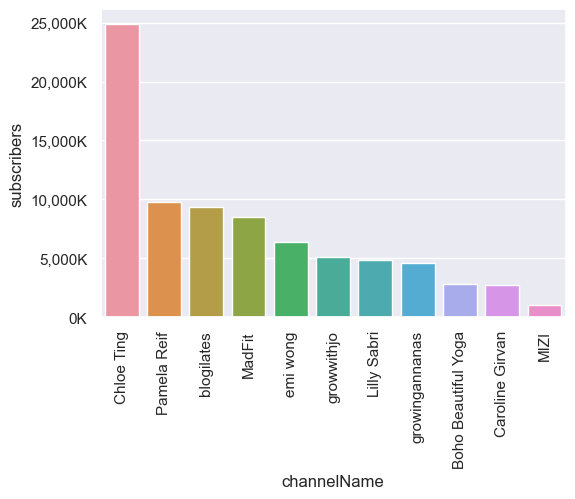

In [25]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.barplot(x='channelName', y='subscribers', data=all_channel_data.sort_values('subscribers', ascending=False))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

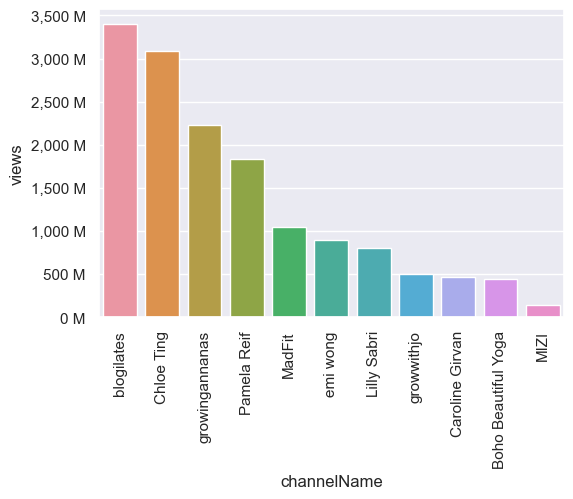

In [26]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.barplot(x='channelName', y='views', data=all_channel_data.sort_values('views', ascending=False))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + ' M'))
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

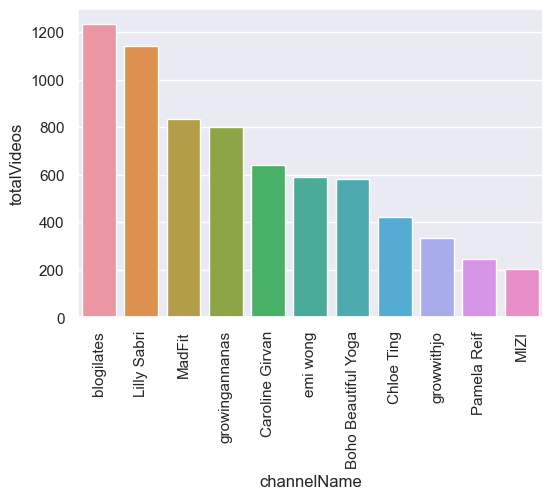

In [27]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.barplot(x='channelName', y='totalVideos', data=all_channel_data.sort_values('totalVideos', ascending=False))
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [28]:
all_channel_data['viewsPerVideo'] = all_channel_data['views']*1.0/all_channel_data['totalVideos']

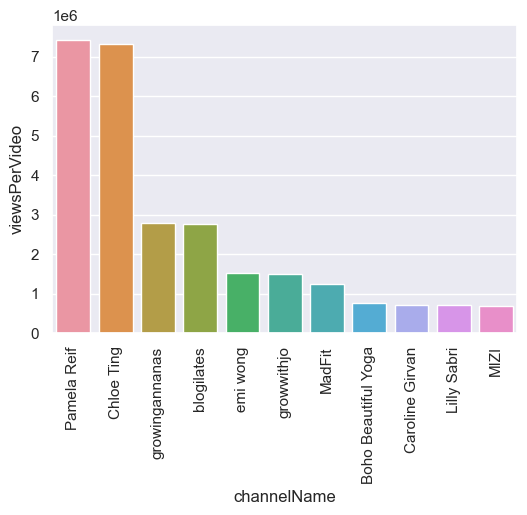

In [29]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.barplot(x='channelName', y='viewsPerVideo', data=all_channel_data.sort_values('viewsPerVideo', ascending=False))
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [30]:
numeric_cols.append('viewsPerVideo')

In [31]:
all_channel_data[numeric_cols].corr()

subscribers     views  totalVideos  viewsPerVideo
subscribers       1.000000  0.720767    -0.059898       0.793147
views             0.720767  1.000000     0.345215       0.687198
totalVideos      -0.059898  0.345215     1.000000      -0.312438
viewsPerVideo     0.793147  0.687198    -0.312438       1.000000

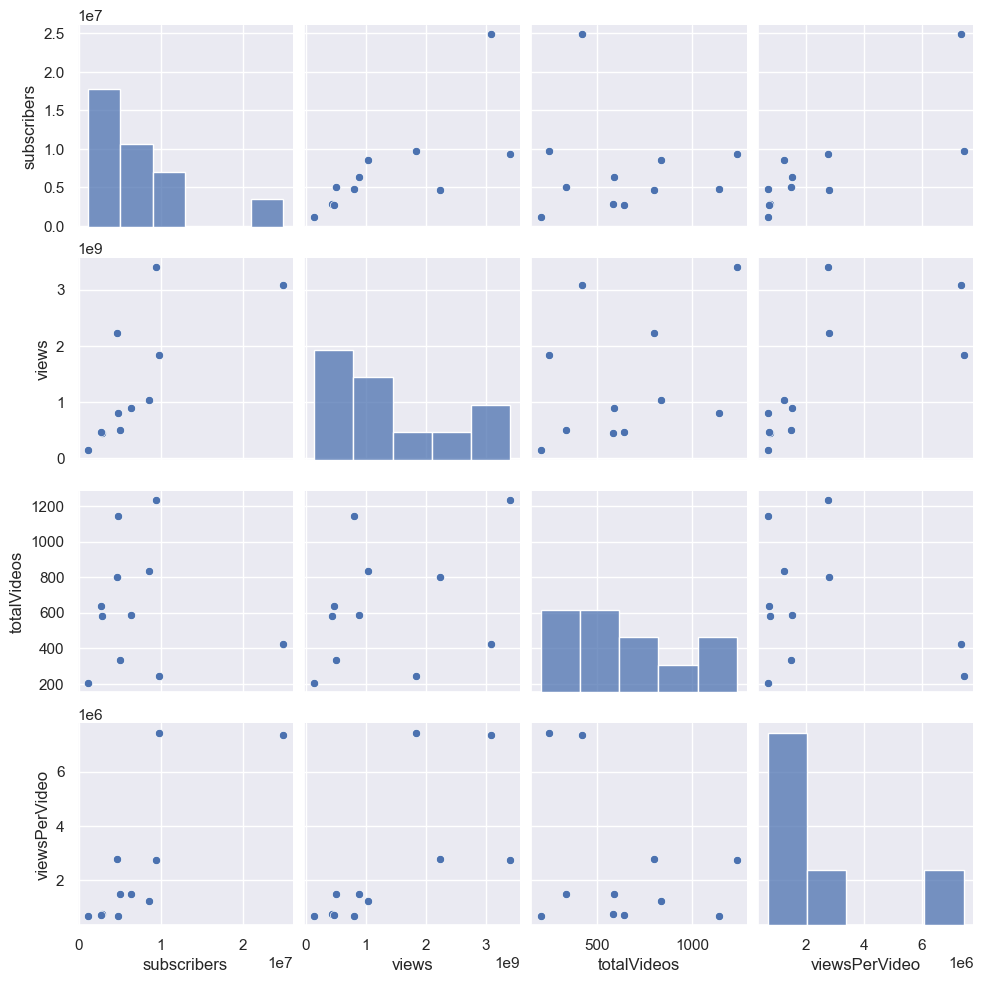

In [32]:
sns.pairplot(all_channel_data[numeric_cols])

<h2> Get video statistics for all the channels </h2>
In the next step, we will obtain the video statistics for all the channels. We will be fetching data for a total of 6956 videos.

In [33]:
playlist_id = all_channel_data.loc[all_channel_data['channelName']== 'blogilates', ['playlistId','country']].iloc[0]['playlistId']
playlist_id

'UUIJwWYOfsCfz6PjxbONYXSg'

In [34]:
playlist_id = all_channel_data.loc[all_channel_data['channelName']== 'blogilates', 'playlistId'].iloc[0]
playlist_id

'UUIJwWYOfsCfz6PjxbONYXSg'

In [35]:
video_df = pd.read_excel('data/allChannels_videoData.xlsx')

In [36]:
comments_df = pd.read_excel('data/allChannels_commentsData.xlsx')

Extracting data using YouTube API:

In [37]:
#video_df = pd.DataFrame()
#comments_df = pd.DataFrame()

#for c in all_channel_data['channelName'].unique():
#    print("Getting video information from channel: " + c)
#    playlist_id = all_channel_data.loc[all_channel_data['channelName']== c, 'playlistId'].iloc[0]
#    video_ids = get_video_ids(youtube, playlist_id)
    
#    # get video data for this channel
#    video_data = get_video_details(youtube, video_ids)
#    # get top 20 comments data for all the videos on this channel
#    comments_data = get_comments_in_videos(youtube, video_ids)

#    # append video data together and comment data toghether
#    video_df = video_df.append(video_data, ignore_index=True)
#    comments_df = comments_df.append(comments_data, ignore_index=True)

In [38]:
# video_df.to_excel(excel_writer= 'data/allChannels_videoData.xlsx',sheet_name='sheet_1')

In [39]:
# comments_df.to_excel(excel_writer= 'data/allChannels_commentsData.xlsx',sheet_name='sheet_1')

In [40]:
video_df.head()

Unnamed: 0     video_id  categoryId channelTitle  \
0           0  J3cvnNmifnA         NaN   Chloe Ting   
1           1  uVg3O0KeQ3E         NaN   Chloe Ting   
2           2  Nt1sOThC834         NaN   Chloe Ting   
3           3  b4TXNOTaY94         NaN   Chloe Ting   
4           4  HSk76ZthVHw         NaN   Chloe Ting   

                                              title  \
0  5 Must Do Booty Exercises To Grow A Rounder Butt   
1                             Day in my life in NYC   
2           Fastest Way To Get A Small Waist & Abs?   
3          finally answering your juicy questions..   
4                                  this is dinner?!   

                                         description  \
0  Here's another glutes / booty gym routine vide...   
1  Just a casual vlog from a day out. Drop me a c...   
2  Trying out these fitness gadget - we've got ab...   
3  Hi. Visit https://shokz.co/ChloeTing for more ...   
4  ✚ For information about food portions\nhttps:/...   

                                                tags           publishedAt  \
0  ['glutes', 'booty', 'booty workout', 'booty gy...  2023-10-31T14:00:11Z   
1  ['chloe ting', 'chloeting', 'chloeting vlog', ...  2023-10-14T15:47:03Z   
2  ['abs', 'slim waist', 'abs trainers', 'abs gad...  2023-10-05T14:30:09Z   
3  ['chloe ting', 'chloeting', 'chloetingvlogs', ...  2023-09-25T14:00:24Z   
4  ['chloe ting', 'chloeting', 'chloe ting diet',...  2023-09-13T14:30:10Z   

   viewCount  likeCount  favoriteCount  commentCount duration definition  \
0   132492.0     4529.0            NaN         257.0  PT8M30S         hd   
1   138969.0     3898.0            NaN         368.0  PT7M17S         hd   
2   233332.0     5875.0            NaN         304.0   PT8M2S         hd   
3   270549.0     7393.0            NaN         518.0  PT8M59S         hd   
4   160169.0     5585.0            NaN         369.0   PT8M1S         hd   

   caption  
0    False  
1    False  
2    False  
3    False  
4    False

The duration column is in ISO-8601 format. <br>
* P is the duration designator (for period) placed at the start of the duration representation.
* Y is the year designator that follows the value for the number of years.
* M is the month designator that follows the value for the number of months.
* W is the week designator that follows the value for the number of weeks.
* D is the day designator that follows the value for the number of days.
* T is the time designator that precedes the time components of the representation.

In [41]:
comments_df.head()

Unnamed: 0     video_id                                     comments_top20
0           0  J3cvnNmifnA  ["That's not my Chloe she looks different", 'p...
1           1  uVg3O0KeQ3E  ['Free palestine 🇸🇩🇸🇩🇸🇩🇸🇩🇸🇩🇸🇩', 'Welcome to Ne...
2           2  Nt1sOThC834  ['I love your video.❤❤', "Hi Chloe, firstly i ...
3           3  b4TXNOTaY94  ['I heard if u say your fav youtuber name 3 ti...
4           4  HSk76ZthVHw  ['Not you including useful resources and conta...

<h2> Preprocessing and feature engineering </h2>
Check for missing/empty values, converting features to make them easier to work with.

In [42]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6957 entries, 0 to 6956
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6957 non-null   int64  
 1   video_id       6957 non-null   object 
 2   categoryId     0 non-null      float64
 3   channelTitle   6957 non-null   object 
 4   title          6957 non-null   object 
 5   description    6347 non-null   object 
 6   tags           5881 non-null   object 
 7   publishedAt    6957 non-null   object 
 8   viewCount      6956 non-null   float64
 9   likeCount      6852 non-null   float64
 10  favoriteCount  0 non-null      float64
 11  commentCount   6947 non-null   float64
 12  duration       6957 non-null   object 
 13  definition     6957 non-null   object 
 14  caption        6957 non-null   bool   
dtypes: bool(1), float64(5), int64(1), object(8)
memory usage: 767.8+ KB


We need to convert the numeric columns in this dataframe to the correct data type.

In [43]:
video_df_original = video_df.copy()
numeric_cols2 = ['viewCount', 'likeCount', 'favoriteCount', 'commentCount']
video_df[numeric_cols2] = video_df[numeric_cols2].apply(pd.to_numeric, errors='coerce', axis=1)

In [44]:
video_df.isnull().any()

Unnamed: 0       False
video_id         False
categoryId        True
channelTitle     False
title            False
description       True
tags              True
publishedAt      False
viewCount         True
likeCount         True
favoriteCount     True
commentCount      True
duration         False
definition       False
caption          False
dtype: bool

In [45]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      6936 non-null   int64 
 1   video_id        6936 non-null   object
 2   comments_top20  6936 non-null   object
dtypes: int64(1), object(2)
memory usage: 162.7+ KB


<h3> Adding additional features in the data </h3>

* create published date column with another column showing the day in the week the video was published, which will be useful for later analysis.
* convert video duration to seconds instead of the current default string format
* calculate number of tags for each video
* calculate comments and likes per 1000 view ratio
* calculate title character length

In [46]:
parser.parse('2023-10-31T14:00:11Z')

datetime.datetime(2023, 10, 31, 14, 0, 11, tzinfo=tzutc())

In [47]:
# Create publish day (in the week) column
video_df['publishedAt'] =  video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['publishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A")) 

In [48]:
# convert duration to seconds
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [49]:
x = "['glutes', \"booty\", 'booty workout', 'booty gym workout', 'booty exercises', 'grow a booty', 'how to grow a booty', 'asian booty', 'glutes workout', 'gym workout routine', 'booty gym routine', 'booty routine', 'booty routine weights', 'weighted booty routine', 'how to grow a butt', 'grow glutes at gym routine', 'growing glutes', 'growing booty', 'glutes routine', 'booty gym exercises', 'booty gym', 'gym', 'gym workout', 'gym workout booty', 'hip thrusts', 'RDL', 'step up', 'cable kickback', 'bulgarian', 'glute bridges']"

In [50]:
def parseListStr(str):
    str = str[1:-1]
    str2 = str.replace("'","")
    str2 = str2.replace("\"","")
    #print(str2)
    return str2.split(", ")

In [51]:
video_df['tags'] = video_df['tags'].apply(lambda x: str(x))

In [52]:
video_df['tagsCount'] = video_df['tags'].apply(lambda x: 0 if (x == 'None' or len(x) == 0) else len(parseListStr(x)))

In [53]:
# Comments and likes per 1000 view ratio
video_df['likeRatio'] = video_df['likeCount']/ video_df['viewCount'] * 1000
video_df['commentRatio'] = video_df['commentCount']/ video_df['viewCount'] * 1000

In [54]:
# Title character length
video_df['titleLength'] = video_df['title'].apply(lambda x: len(x))

In [55]:
video_df.head()

Unnamed: 0     video_id  categoryId channelTitle  \
0           0  J3cvnNmifnA         NaN   Chloe Ting   
1           1  uVg3O0KeQ3E         NaN   Chloe Ting   
2           2  Nt1sOThC834         NaN   Chloe Ting   
3           3  b4TXNOTaY94         NaN   Chloe Ting   
4           4  HSk76ZthVHw         NaN   Chloe Ting   

                                              title  \
0  5 Must Do Booty Exercises To Grow A Rounder Butt   
1                             Day in my life in NYC   
2           Fastest Way To Get A Small Waist & Abs?   
3          finally answering your juicy questions..   
4                                  this is dinner?!   

                                         description  \
0  Here's another glutes / booty gym routine vide...   
1  Just a casual vlog from a day out. Drop me a c...   
2  Trying out these fitness gadget - we've got ab...   
3  Hi. Visit https://shokz.co/ChloeTing for more ...   
4  ✚ For information about food portions\nhttps:/...   

                                                tags  \
0  ['glutes', 'booty', 'booty workout', 'booty gy...   
1  ['chloe ting', 'chloeting', 'chloeting vlog', ...   
2  ['abs', 'slim waist', 'abs trainers', 'abs gad...   
3  ['chloe ting', 'chloeting', 'chloetingvlogs', ...   
4  ['chloe ting', 'chloeting', 'chloe ting diet',...   

                publishedAt  viewCount  likeCount  ...  commentCount  \
0 2023-10-31 14:00:11+00:00   132492.0     4529.0  ...         257.0   
1 2023-10-14 15:47:03+00:00   138969.0     3898.0  ...         368.0   
2 2023-10-05 14:30:09+00:00   233332.0     5875.0  ...         304.0   
3 2023-09-25 14:00:24+00:00   270549.0     7393.0  ...         518.0   
4 2023-09-13 14:30:10+00:00   160169.0     5585.0  ...         369.0   

   duration definition caption  publishDayName durationSecs  tagsCount  \
0   PT8M30S         hd   False         Tuesday        510.0         30   
1   PT7M17S         hd   False        Saturday        437.0          8   
2    PT8M2S         hd   False        Thursday        482.0         32   
3   PT8M59S         hd   False          Monday        539.0          9   
4    PT8M1S         hd   False       Wednesday        481.0         19   

   likeRatio  commentRatio  titleLength  
0  34.183196      1.939740           48  
1  28.049421      2.648073           21  
2  25.178715      1.302865           39  
3  27.325919      1.914625           40  
4  34.869419      2.303817           16  

[5 rows x 21 columns]

The publishedAt date column appears clean. Videos were published between 2009 and 2023.

<h3> Exploratory data analysis </h3>

<h4> View distribution per channel </h4>

Chloe Ting has the highest number of subscribers (25M), and a (view count) / (subscriber) ratio, which makes it harder to interpret these distibution plots for other YouTubers. Therefore, I have plotted the distribution plots once again by excluding her data.

We note that Chloe Ting, Pamela Reif and Blogilates have relatively higher variance in their videos view counts, suggesting that some of their videos have gone viral.
* Chloe's most 3 most popular videos has garnered 523M, 211M and 76M as of today.

Caroline Girvan, Lilly Sabri and MIZI may have fewer views, but their views are consistent.

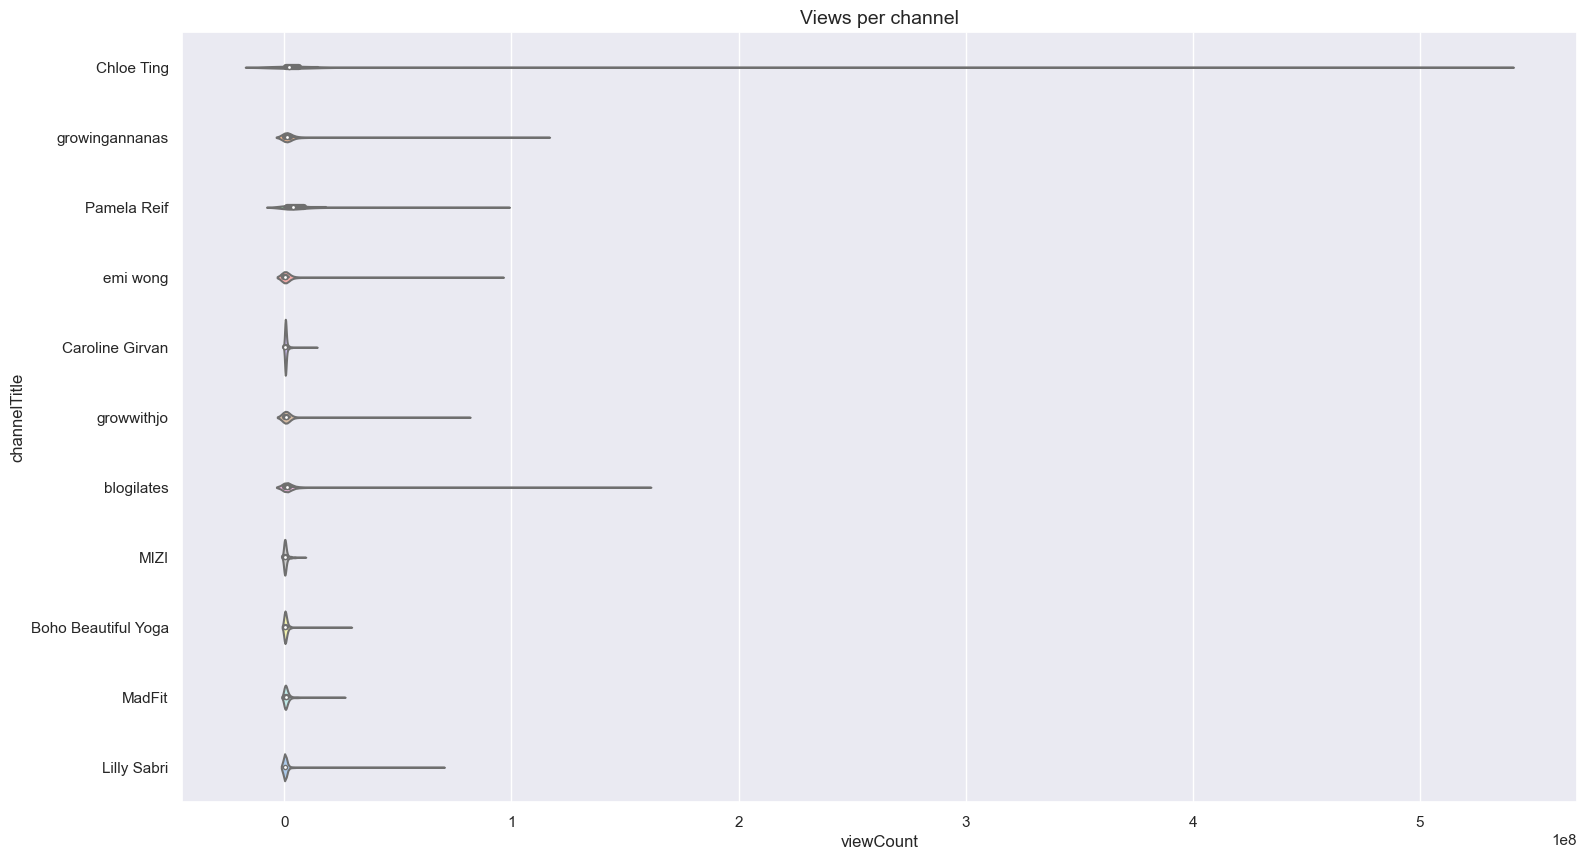

In [56]:
sns.set(rc={'figure.figsize':(18, 10)})
sns.violinplot(y = video_df['channelTitle'], x = video_df['viewCount'], palette = 'pastel', orient='h')
plt.title('Views per channel', fontsize = 14)
plt.show()

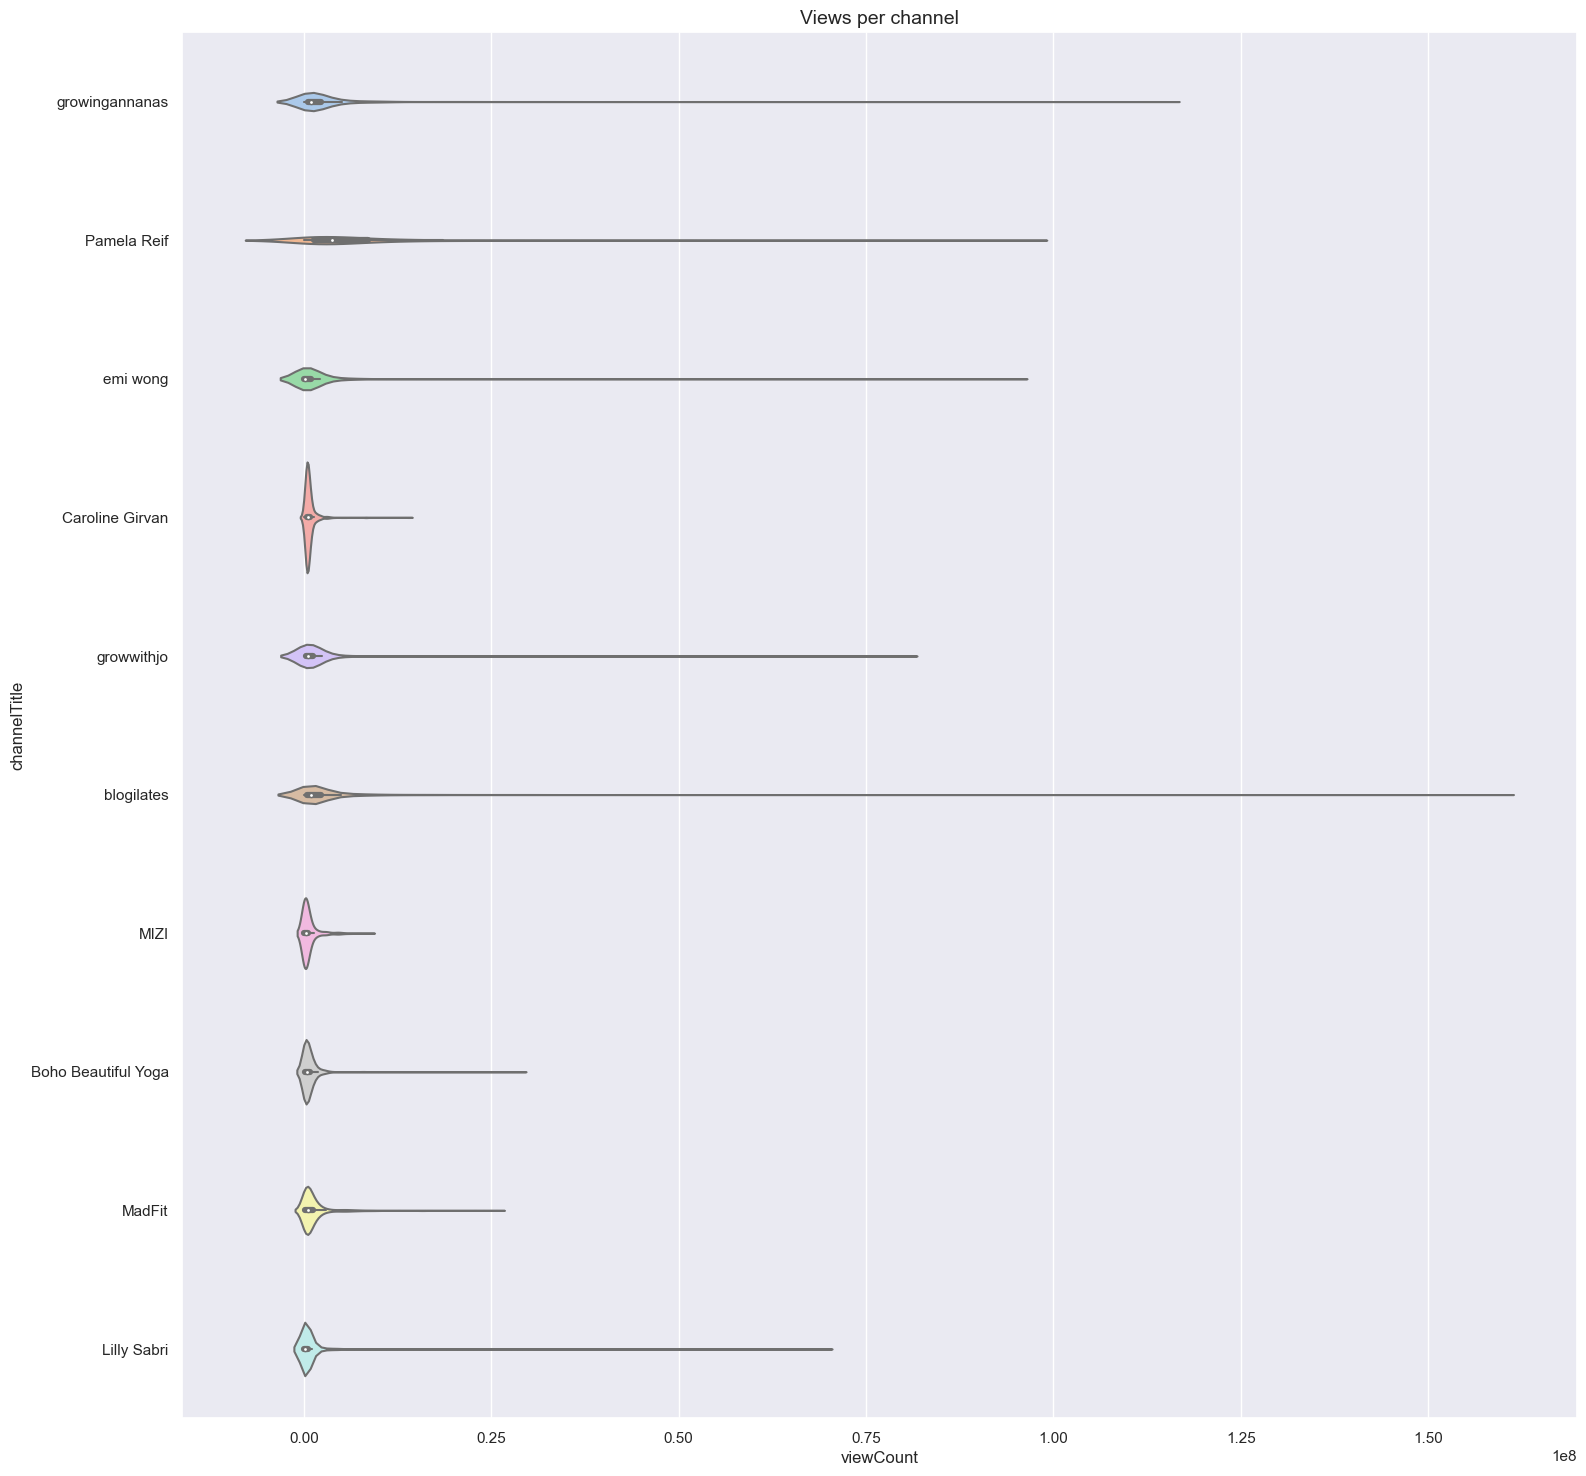

In [57]:
sns.set(rc={'figure.figsize':(18, 18)})
sns.violinplot(y = video_df.loc[video_df['channelTitle'] != 'Chloe Ting']['channelTitle'], x = video_df.loc[video_df['channelTitle'] != 'Chloe Ting']['viewCount'], palette = 'pastel', orient='h')
plt.title('Views per channel', fontsize = 14)
plt.show()

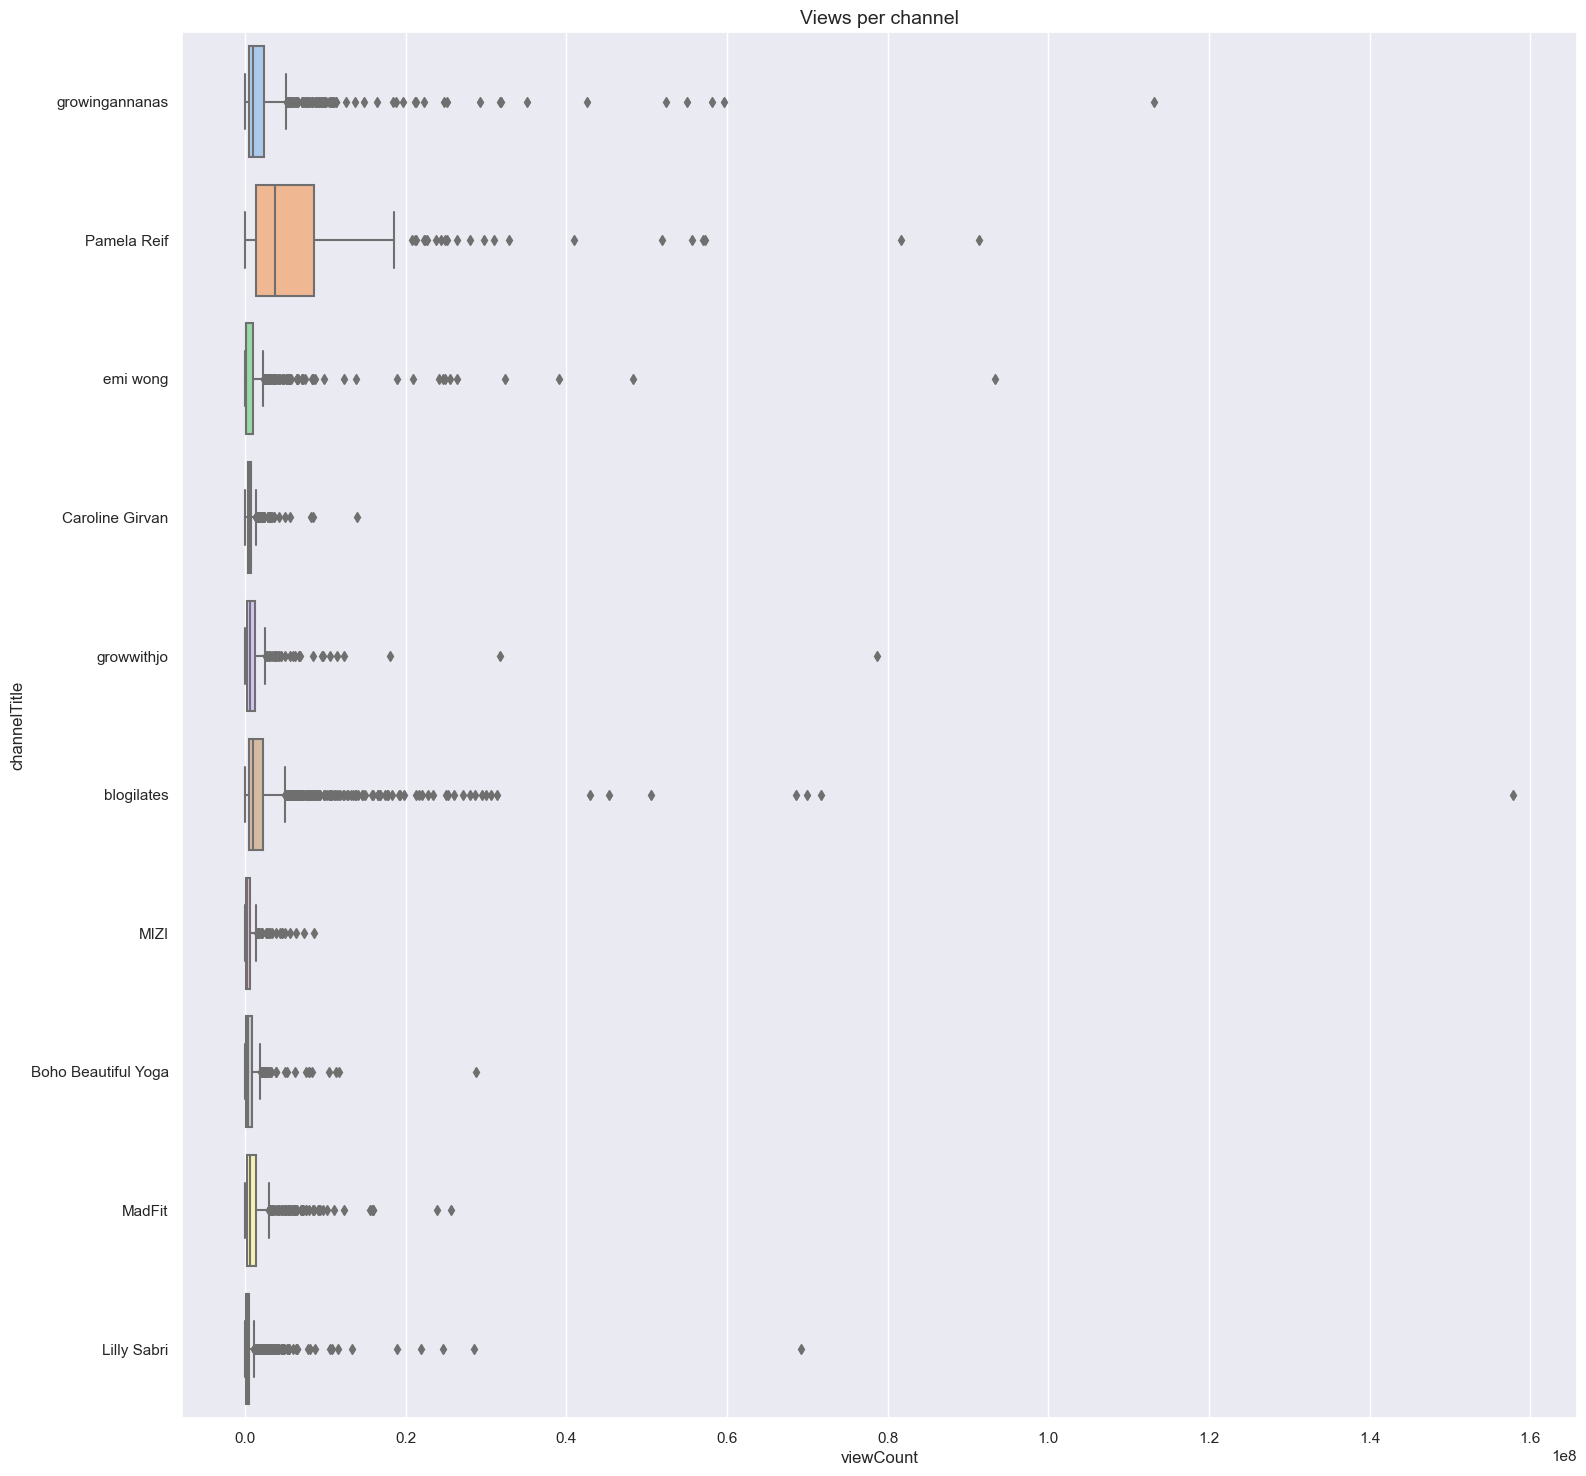

In [58]:
sns.set(rc={'figure.figsize':(18, 18)})
sns.boxplot(y = video_df.loc[video_df['channelTitle'] != 'Chloe Ting']['channelTitle'], x = video_df.loc[video_df['channelTitle'] != 'Chloe Ting']['viewCount'], palette = 'pastel', orient='h')
plt.title('Views per channel', fontsize = 14)
plt.show()

Let's have a look at each YouTuber's most popular videos to get a sense of what their most viral creations are.

In [59]:
channelTitles = video_df['channelTitle'].unique()

In [60]:
def getMostViewedVideosForChannel(video_df, channelTitle, k=1):
    channeldf = video_df.loc[video_df['channelTitle'] == channelTitle]
    display(channeldf.sort_values('viewCount', ascending=False)[0:k])
    display(channeldf.describe())

In [61]:
for channel in channelTitles:
    print("Channel name: ",channel)
    getMostViewedVideosForChannel(video_df, channel, 3)
    print("----------------------------------------------------")

Channel name:  Chloe Ting


Unnamed: 0     video_id  categoryId channelTitle  \
241         241  2pLT-olgUJs         NaN   Chloe Ting   
242         242  2MoGxae-zyo         NaN   Chloe Ting   
264         264  6TmQiugy_qw         NaN   Chloe Ting   

                                                 title  \
241         Get Abs in 2 WEEKS | Abs Workout Challenge   
242  Do This Everyday To Lose Weight | 2 Weeks Shre...   
264       Abs Workout 🔥Get that 11 Line Abs in 35 days   

                                           description  \
241  Abs Abs Abs! Everyone seems to be asking for a...   
242  First episode of my new program for this month...   
264  Want that 11 line abs? It's the 2019 Summer Sh...   

                                                  tags  \
241  ['abs', 'abs workout', 'abs exercise', 'lower ...   
242  ['workout', 'daily workout', 'home workout', '...   
264  ['abs', 'abs workout', 'abs exercise', '11 abs...   

                  publishedAt    viewCount  likeCount  ...  commentCount  \
241 2019-08-12 11:45:00+00:00  523940875.0  8930911.0  ...      314328.0   
242 2019-08-08 11:45:00+00:00  211985317.0  4086900.0  ...      150999.0   
264 2019-04-30 11:08:03+00:00   76316291.0  1555494.0  ...       44151.0   

     duration definition caption  publishDayName durationSecs  tagsCount  \
241   PT11M4S         hd    True          Monday        664.0         26   
242  PT14M23S         hd    True        Thursday        863.0         26   
264   PT11M8S         hd    True         Tuesday        668.0         33   

     likeRatio  commentRatio  titleLength  
241  17.045647      0.599930           42  
242  19.279165      0.712309           57  
264  20.382201      0.578527           44  

[3 rows x 21 columns]

Unnamed: 0  categoryId     viewCount     likeCount  favoriteCount  \
count  422.000000         0.0  4.220000e+02  4.220000e+02            0.0   
mean   210.500000         NaN  7.289972e+06  1.434647e+05            NaN   
std    121.965159         NaN  2.879283e+07  5.022557e+05            NaN   
min      0.000000         NaN  0.000000e+00  0.000000e+00            NaN   
25%    105.250000         NaN  5.647240e+05  1.659525e+04            NaN   
50%    210.500000         NaN  1.929661e+06  4.902600e+04            NaN   
75%    315.750000         NaN  6.354392e+06  1.492950e+05            NaN   
max    421.000000         NaN  5.239409e+08  8.930911e+06            NaN   

        commentCount  durationSecs   tagsCount   likeRatio  commentRatio  \
count     422.000000    422.000000  422.000000  421.000000    421.000000   
mean     4166.611374    846.092417   22.817536   25.613312      0.972814   
std     17425.252283    576.256099    6.475048    9.222366      0.971103   
min         0.000000      0.000000    1.000000    8.409795      0.119502   
25%       491.000000    633.250000   19.000000   19.961926      0.466301   
50%      1361.500000    724.500000   24.000000   23.373843      0.660534   
75%      3958.250000    995.500000   27.000000   28.520631      1.099271   
max    314328.000000   7849.000000   43.000000   66.655913      9.757531   

       titleLength  
count   422.000000  
mean     57.355450  
std      15.140253  
min       9.000000  
25%      49.000000  
50%      59.000000  
75%      67.750000  
max      93.000000

----------------------------------------------------
Channel name:  growingannanas


Unnamed: 0     video_id  categoryId    channelTitle  \
557         557  UIfjsWym7Qg         NaN  growingannanas   
745         745  -iHCOK0Yo9E         NaN  growingannanas   
946         946  4BhWEtNGxao         NaN  growingannanas   

                                                 title description tags  \
557  watermelon jelly? I had to try it and it taste...         NaN  nan   
745        yes GO FOR IT 🙌 #fitness #fitnessmotivation         NaN  nan   
946  #fitnesstransformation now it’s your turn. Wha...         NaN  nan   

                  publishedAt    viewCount  likeCount  ...  commentCount  \
557 2023-06-22 17:26:39+00:00  113187607.0  3306715.0  ...        3107.0   
745 2022-11-02 08:24:57+00:00   59630907.0  2610550.0  ...        8553.0   
946 2022-01-05 05:41:52+00:00   58179650.0  1847116.0  ...        8874.0   

     duration definition caption  publishDayName durationSecs  tagsCount  \
557     PT24S         hd   False        Thursday         24.0          1   
745     PT10S         hd   False       Wednesday         10.0          1   
946     PT49S         hd   False       Wednesday         49.0          1   

     likeRatio  commentRatio  titleLength  
557  29.214462      0.027450           52  
745  43.778472      0.143432           43  
946  31.748489      0.152528          100  

[3 rows x 21 columns]

Unnamed: 0  categoryId     viewCount     likeCount  favoriteCount  \
count   783.000000         0.0  7.830000e+02  7.830000e+02            0.0   
mean    813.000000         NaN  2.698468e+06  1.116134e+05            NaN   
std     226.176922         NaN  6.827190e+06  2.520717e+05            NaN   
min     422.000000         NaN  1.792000e+04  4.010000e+02            NaN   
25%     617.500000         NaN  4.921060e+05  1.095050e+04            NaN   
50%     813.000000         NaN  9.945390e+05  2.233100e+04            NaN   
75%    1008.500000         NaN  2.313954e+06  1.077835e+05            NaN   
max    1204.000000         NaN  1.131876e+08  3.306715e+06            NaN   

       commentCount  durationSecs   tagsCount   likeRatio  commentRatio  \
count    783.000000    783.000000  783.000000  783.000000    783.000000   
mean     698.407407   1058.987229   13.596424   35.702989      0.570412   
std     1013.966669   1028.193885   12.677813   18.993052      0.682241   
min       14.000000      6.000000    1.000000    9.782383      0.026156   
25%      293.000000     23.000000    1.000000   20.591063      0.235052   
50%      423.000000    929.000000   18.000000   26.437778      0.421385   
75%      671.000000   2055.500000   24.000000   50.612369      0.738072   
max    11523.000000   3988.000000   39.000000  227.197205     13.665440   

       titleLength  
count   783.000000  
mean     70.671775  
std      22.073657  
min      12.000000  
25%      54.000000  
50%      76.000000  
75%      90.000000  
max     100.000000

----------------------------------------------------
Channel name:  Pamela Reif


Unnamed: 0     video_id  categoryId channelTitle  \
1433        1433  AnYl6Nk9GOA         NaN  Pamela Reif   
1426        1426  1f8yoFFdkcY         NaN  Pamela Reif   
1448        1448  Q-vuR4PJh2c         NaN  Pamela Reif   

                                                  title  \
1433    10 MIN AB WORKOUT // No Equipment | Pamela Reif   
1426  10 MIN BEGINNER AB WORKOUT // No Equipment | P...   
1448  10 MIN SIXPACK WORKOUT // No Equipment | Pamel...   

                                            description  \
1433  inspired by my most popular "Sixpack Workout" ...   
1426  Ohhhh yes - a BEGINNER ab workout! ♥︎ / Werbun...   
1448  NO EXCUSES ♥︎  a quick & intense workout to ta...   

                                                   tags  \
1433  ['workout', 'training', 'abs', 'sickpack', 'fl...   
1426  ['workout', 'training', 'abs', 'sickpack', 'fl...   
1448  ['workout', 'training', 'abs', 'sickpack', 'fl...   

                   publishedAt   viewCount  likeCount  ...  commentCount  \
1433 2019-10-20 07:00:00+00:00  91311121.0   898476.0  ...       20615.0   
1426 2020-02-16 08:00:00+00:00  81597826.0  1009706.0  ...       16155.0   
1448 2018-01-08 18:38:38+00:00  57284134.0   600614.0  ...       12659.0   

      duration definition caption  publishDayName durationSecs  tagsCount  \
1433  PT10M26S         hd   False          Sunday        626.0         48   
1426  PT10M30S         hd   False          Sunday        630.0         49   
1448  PT10M22S         hd   False          Monday        622.0         48   

      likeRatio  commentRatio  titleLength  
1433   9.839721      0.225767           47  
1426  12.374178      0.197983           56  
1448  10.484823      0.220986           52  

[3 rows x 21 columns]

Unnamed: 0  categoryId     viewCount     likeCount  favoriteCount  \
count   246.000000         0.0  2.450000e+02  2.460000e+02            0.0   
mean   1327.500000         NaN  7.427762e+06  8.769900e+04            NaN   
std      71.158274         NaN  1.173959e+07  1.391214e+05            NaN   
min    1205.000000         NaN  0.000000e+00  1.000000e+00            NaN   
25%    1266.250000         NaN  1.366222e+06  1.943350e+04            NaN   
50%    1327.500000         NaN  3.704149e+06  4.617900e+04            NaN   
75%    1388.750000         NaN  8.496904e+06  9.630475e+04            NaN   
max    1450.000000         NaN  9.131112e+07  1.009706e+06            NaN   

       commentCount  durationSecs   tagsCount   likeRatio  commentRatio  \
count    246.000000    246.000000  246.000000  245.000000    244.000000   
mean    1726.296748    724.695122   51.959350         inf      0.264193   
std     2962.456473    518.732931   11.796505         NaN      0.134783   
min        0.000000      0.000000    1.000000    7.915099      0.106612   
25%      350.500000    596.500000   51.000000   10.992110      0.186707   
50%      826.000000    658.500000   54.000000   12.455367      0.225582   
75%     1793.750000    821.500000   57.000000   15.312831      0.305674   
max    20634.000000   3531.000000   65.000000         inf      1.084933   

       titleLength  
count   246.000000  
mean     80.849593  
std      14.424955  
min      26.000000  
25%      73.000000  
50%      84.000000  
75%      92.000000  
max     100.000000

----------------------------------------------------
Channel name:  emi wong


Unnamed: 0     video_id  categoryId channelTitle  \
1777        1777  jXm0y-csiuE         NaN     emi wong   
1820        1820  W4eKVKwf3rQ         NaN     emi wong   
1830        1830  Jg61m0DwURs         NaN     emi wong   

                                                  title  \
1777  10 MIN EXERCISE & STRETCH FOR SHOULDERS, NECK ...   
1820  30 min Full Body Fat Burn HIIT (NO JUMPING) - ...   
1830  SLIM LEGS IN 20 DAYS! 10 min No Jumping Quiet ...   

                                            description  \
1777  SUBSCRIBE & TURN ON NOTIFICATIONS FOR NEW VIDE...   
1820  SUBSCRIBE & TURN ON NOTIFICATIONS FOR NEW VIDE...   
1830  SUBSCRIBE & TURN ON NOTIFICATIONS FOR NEW VIDE...   

                                                   tags  \
1777  ['collarbone workout', 'shoulder workout', 'se...   
1820  ['30 min workout', 'quiet workout', 'no jumpin...   
1830  ['leg workout', 'leg day', 'slim legs', 'burn ...   

                   publishedAt   viewCount  likeCount  ...  commentCount  \
1777 2020-04-05 12:07:57+00:00  93332558.0  1885457.0  ...       24871.0   
1820 2019-10-09 12:44:04+00:00  48329608.0   738331.0  ...       15563.0   
1830 2019-08-26 11:51:01+00:00  39124862.0   870839.0  ...       25917.0   

      duration definition caption  publishDayName durationSecs  tagsCount  \
1777  PT10M30S         hd    True          Sunday        630.0         33   
1820  PT30M55S         hd    True       Wednesday       1855.0         36   
1830  PT11M35S         hd    True          Monday        695.0         30   

      likeRatio  commentRatio  titleLength  
1777  20.201493      0.266477           73  
1820  15.276991      0.322018           92  
1830  22.257944      0.662418           64  

[3 rows x 21 columns]

Unnamed: 0  categoryId     viewCount     likeCount  favoriteCount  \
count   580.000000         0.0  5.800000e+02  5.790000e+02            0.0   
mean   1740.500000         NaN  1.527554e+06  3.108871e+04            NaN   
std     167.575853         NaN  5.626589e+06  1.092280e+05            NaN   
min    1451.000000         NaN  0.000000e+00  1.000000e+00            NaN   
25%    1595.750000         NaN  6.419675e+04  1.838500e+03            NaN   
50%    1740.500000         NaN  1.476770e+05  3.878000e+03            NaN   
75%    1885.250000         NaN  9.371542e+05  2.139850e+04            NaN   
max    2030.000000         NaN  9.333256e+07  1.885457e+06            NaN   

       commentCount  durationSecs   tagsCount   likeRatio  commentRatio  \
count    580.000000    580.000000  580.000000  579.000000    579.000000   
mean     704.853448    623.734483   26.720690         inf      0.909790   
std     2237.981976    516.039885   15.631815         NaN      0.831084   
min        0.000000      0.000000    1.000000    7.848933      0.069485   
25%       65.250000    205.500000   19.750000   18.749102      0.376349   
50%      155.500000    651.000000   32.000000   23.481424      0.650145   
75%      483.250000    875.000000   38.000000   31.990459      1.193657   
max    25917.000000   3891.000000   56.000000         inf      8.334001   

       titleLength  
count   580.000000  
mean     64.641379  
std      20.115273  
min      12.000000  
25%      50.750000  
50%      67.000000  
75%      80.250000  
max     100.000000

----------------------------------------------------
Channel name:  Caroline Girvan


Unnamed: 0     video_id  categoryId     channelTitle  \
2501        2501  c0VxUFHdYzs         NaN  Caroline Girvan   
2567        2567  X6gWQ1Lcvjg         NaN  Caroline Girvan   
2546        2546  GViX8riaHX4         NaN  Caroline Girvan   

                                                  title  \
2501       5 Min Full Body Warm Up with Caroline Girvan   
2567  15 Min DUMBBELL ARMS & SHOULDER WORKOUT at Hom...   
2546  30 Min FULL BODY DUMBBELL WORKOUT at Home | Mu...   

                                            description  \
2501  This is full body 5 min warm up you can follow...   
2567  This is a no repeat arm and shoulder workout a...   
2546  This is a follow along 30 minute full body dum...   

                                                   tags  \
2501  ['full body warm up', 'warm up', 'warmup', '5 ...   
2567  ['shoulder workout', 'arm workout', 'upper bod...   
2546  ['dumbbell workout', 'full body workout', 'dum...   

                   publishedAt   viewCount  likeCount  ...  commentCount  \
2501 2020-09-21 07:15:01+00:00  13968219.0    68622.0  ...         742.0   
2567 2020-07-13 18:07:02+00:00   8375945.0   138307.0  ...        2574.0   
2546 2020-08-03 12:21:05+00:00   8195197.0   145535.0  ...        3807.0   

      duration definition caption  publishDayName durationSecs  tagsCount  \
2501    PT5M3S         hd   False          Monday        303.0         23   
2567  PT16M55S         hd   False          Monday       1015.0         23   
2546  PT36M28S         hd   False          Monday       2188.0         20   

      likeRatio  commentRatio  titleLength  
2501   4.912724      0.053121           44  
2567  16.512405      0.307309           59  
2546  17.758572      0.464540           59  

[3 rows x 21 columns]

Unnamed: 0  categoryId     viewCount      likeCount  favoriteCount  \
count   639.000000         0.0  6.390000e+02     639.000000            0.0   
mean   2350.000000         NaN  7.124954e+05   15559.392801            NaN   
std     184.607692         NaN  9.057780e+05   12085.825972            NaN   
min    2031.000000         NaN  1.647600e+04     683.000000            NaN   
25%    2190.500000         NaN  3.650035e+05   10664.500000            NaN   
50%    2350.000000         NaN  4.995130e+05   13306.000000            NaN   
75%    2509.500000         NaN  7.576815e+05   17257.000000            NaN   
max    2669.000000         NaN  1.396822e+07  145535.000000            NaN   

       commentCount  durationSecs   tagsCount   likeRatio  commentRatio  \
count    639.000000    639.000000  639.000000  639.000000    639.000000   
mean     831.547731   2165.682316   23.192488   25.453117      1.529968   
std      575.522121    903.949307    4.218062    6.218953      1.113472   
min       17.000000     31.000000    1.000000    4.912724      0.053121   
25%      522.000000   1471.000000   21.000000   21.248681      0.837861   
50%      729.000000   2224.000000   24.000000   25.153257      1.444727   
75%     1007.500000   2789.000000   26.000000   29.210785      1.962469   
max     4780.000000   4180.000000   33.000000   80.719516     14.928487   

       titleLength  
count   639.000000  
mean     60.942097  
std       8.885801  
min      24.000000  
25%      58.000000  
50%      61.000000  
75%      66.000000  
max      99.000000

----------------------------------------------------
Channel name:  growwithjo


Unnamed: 0     video_id  categoryId channelTitle  \
2797        2797  L8Oqr5Iza-E         NaN   growwithjo   
2753        2753  TgF_74TTIsA         NaN   growwithjo   
2779        2779  nXSOrxXVgm0         NaN   growwithjo   

                                                  title  \
2797  MAJOR WEIGHT LOSS TRANSFORMATION FROM HOME WOR...   
2753  Lower Belly Transformation Post C-Section #wor...   
2779  Lower Belly Fat Transformation (Post C-Section...   

                                            description  \
2797  Working out from home can get you amazing resu...   
2753  dont let anyone tell you that home workouts ar...   
2779  This fat loss transformation came through cons...   

                                                   tags  \
2797  ['after', 'before', 'before and after', 'belly...   
2753  ['growwithjo', 'beginner', 'beginner workouts'...   
2779  ['growwithjo', 'beginner', 'beginner workouts'...   

                   publishedAt   viewCount  likeCount  ...  commentCount  \
2797 2022-05-02 14:30:05+00:00  78706749.0  3503623.0  ...       23097.0   
2753 2022-10-12 14:00:21+00:00  31705616.0   371246.0  ...        2006.0   
2779 2022-07-09 10:00:25+00:00  17959756.0   262821.0  ...        1344.0   

      duration definition caption  publishDayName durationSecs  tagsCount  \
2797      PT1M         hd   False          Monday         60.0         33   
2753     PT10S         hd   False       Wednesday         10.0         28   
2779     PT15S         hd   False        Saturday         15.0         30   

      likeRatio  commentRatio  titleLength  
2797  44.514899      0.293456           60  
2753  11.709156      0.063270           60  
2779  14.633885      0.074834           67  

[3 rows x 21 columns]

Unnamed: 0  categoryId     viewCount     likeCount  favoriteCount  \
count   333.000000         0.0  3.330000e+02  3.330000e+02            0.0   
mean   2836.000000         NaN  1.472239e+06  4.391435e+04            NaN   
std      96.273049         NaN  4.956713e+06  1.981423e+05            NaN   
min    2670.000000         NaN  1.117000e+04  1.570000e+02            NaN   
25%    2753.000000         NaN  2.683130e+05  7.859000e+03            NaN   
50%    2836.000000         NaN  5.511300e+05  1.701800e+04            NaN   
75%    2919.000000         NaN  1.172347e+06  3.365300e+04            NaN   
max    3002.000000         NaN  7.870675e+07  3.503623e+06            NaN   

       commentCount  durationSecs   tagsCount   likeRatio  commentRatio  \
count    333.000000    333.000000  333.000000  333.000000    333.000000   
mean    1025.405405   1047.660661   27.771772   30.280267      1.123714   
std     1916.240732    882.989017    5.354498    8.702914      0.900721   
min        0.000000      7.000000    1.000000   11.709156      0.000000   
25%      172.000000    522.000000   26.000000   25.042102      0.644758   
50%      528.000000    852.000000   28.000000   28.647299      0.963607   
75%     1111.000000   1389.000000   30.000000   33.158358      1.352421   
max    23097.000000   4765.000000   50.000000   70.918408     10.622961   

       titleLength  
count   333.000000  
mean     59.057057  
std      18.544794  
min      23.000000  
25%      44.000000  
50%      58.000000  
75%      74.000000  
max     100.000000

----------------------------------------------------
Channel name:  blogilates


Unnamed: 0     video_id  categoryId channelTitle  \
3059        3059  k43k68kmeyE         NaN   blogilates   
3308        3308  LEeluLcp14w         NaN   blogilates   
3075        3075  sSroH0LEfVM         NaN   blogilates   

                                                  title  \
3059  You asked for a thicker yoga mat. And with me…...   
3308  Agree or disagree? Headphones in = don’t talk ...   
3075  I am genuinely so sorry it’s taken me THIS LON...   

                                            description tags  \
3059  Shop the yoga mat https://bit.ly/3MHlArE\n\nYo...  nan   
3308  SHOP POPFLEX NOW: http://bit.ly/3rt96Jj\n\nAgr...  nan   
3075  Shop the Ambition Bra https://bit.ly/3oj0gz8\n...  nan   

                   publishedAt    viewCount  likeCount  ...  commentCount  \
3059 2023-05-19 11:08:37+00:00  157926098.0  3285923.0  ...        5261.0   
3308 2022-04-01 16:00:12+00:00   71663803.0  3220268.0  ...       54525.0   
3075 2023-03-27 13:18:16+00:00   69997007.0  2548558.0  ...       14079.0   

      duration definition caption  publishDayName durationSecs  tagsCount  \
3059     PT15S         hd   False          Friday         15.0          1   
3308      PT1M         hd   False          Friday         60.0          1   
3075      PT1M         hd   False          Monday         60.0          1   

      likeRatio  commentRatio  titleLength  
3059  20.806713      0.033313           96  
3308  44.935768      0.760844           55  
3075  36.409528      0.201137           93  

[3 rows x 21 columns]

Unnamed: 0  categoryId     viewCount     likeCount  favoriteCount  \
count  1225.000000         0.0  1.225000e+03  1.225000e+03            0.0   
mean   3615.000000         NaN  2.710334e+06  1.244030e+05            NaN   
std     353.771348         NaN  7.167401e+06  3.297126e+05            NaN   
min    3003.000000         NaN  0.000000e+00  0.000000e+00            NaN   
25%    3309.000000         NaN  4.019220e+05  8.834000e+03            NaN   
50%    3615.000000         NaN  9.658640e+05  2.198100e+04            NaN   
75%    3921.000000         NaN  2.229373e+06  6.541900e+04            NaN   
max    4227.000000         NaN  1.579261e+08  3.676183e+06            NaN   

       commentCount  durationSecs    tagsCount    likeRatio  commentRatio  \
count   1218.000000   1225.000000  1225.000000  1224.000000   1217.000000   
mean    1777.389163    448.747755    14.928163    35.132162      1.699017   
std     3252.997210    463.294519    13.448391    23.576172      5.218938   
min        0.000000      0.000000     1.000000     0.879484      0.033313   
25%      444.500000     59.000000     1.000000    16.320419      0.487927   
50%      887.000000    373.000000    12.000000    27.723220      0.876976   
75%     1680.250000    687.000000    28.000000    50.233453      1.796649   
max    54525.000000   4366.000000    73.000000   117.101623    146.641378   

       titleLength  
count  1225.000000  
mean     54.473469  
std      21.435978  
min      12.000000  
25%      38.000000  
50%      51.000000  
75%      68.000000  
max     100.000000

----------------------------------------------------
Channel name:  MIZI


Unnamed: 0     video_id  categoryId channelTitle  \
4311        4311  u_9untoVK7w         NaN         MIZI   
4348        4348  yimeburgZX8         NaN         MIZI   
4320        4320  ZFEj0cWxw08         NaN         MIZI   

                                                  title  \
4311          일주일만에 뱃살 빼기🔥30분 서서하는 복근 운동 - 스쿼트X 런지X 점핑X   
4348                   두툼한 등살, 브라살 빼기🔥 한달 만에 슬림한 상체 만들기   
4320  얼굴살, 얼굴 붓기 빠지는 7분 루틴✨작은 얼굴, 브이라인 만들기 / 이중턱 없애고...   

                                            description  \
4311  새로운 30분 뱃살빼기 운동🔥\n여러분들의 최애 서서하는 복부 운동을 준비했어요\n...   
4348  안녕하세요 여러분!!\n벌써 3월 중순!! 점점 옷차림이 가벼워지는 계절이 오고있어...   
4320  안녕하세요 여러분!!\n오늘은 작은 얼굴 만들기 7분 루틴을 준비해봤어요!!\n얼굴...   

                                                   tags  \
4311  ['서서하는', '서서하는운동', '다이어트', '홈트', '살빼기', '뱃살', ...   
4348  ['서서하는', '서서하는운동', '다이어트', '홈트', '살빼기', '뱃살', ...   
4320  ['다이어트', '홈트', '살빼기', 'workout', 'diet', 'mizi...   

                   publishedAt  viewCount  likeCount  ...  commentCount  \
4311 2022-12-14 08:00:31+00:00  8534216.0   132329.0  ...        1119.0   
4348 2022-03-15 08:29:54+00:00  7285643.0   110218.0  ...         975.0   
4320 2022-10-19 16:04:31+00:00  6316276.0   201234.0  ...        1385.0   

      duration definition caption  publishDayName durationSecs  tagsCount  \
4311  PT30M58S         hd   False       Wednesday       1858.0         66   
4348  PT16M29S         hd   False         Tuesday        989.0         92   
4320   PT7M50S         hd   False       Wednesday        470.0         68   

      likeRatio  commentRatio  titleLength  
4311  15.505701      0.131119           41  
4348  15.128109      0.133825           32  
4320  31.859596      0.219275           52  

[3 rows x 21 columns]

Unnamed: 0  categoryId     viewCount      likeCount  favoriteCount  \
count   196.00000         0.0  1.960000e+02     196.000000            0.0   
mean   4325.50000         NaN  6.858063e+05   11726.892857            NaN   
std      56.72448         NaN  1.287751e+06   23400.021808            NaN   
min    4228.00000         NaN  2.976000e+03      61.000000            NaN   
25%    4276.75000         NaN  4.428700e+04    1145.500000            NaN   
50%    4325.50000         NaN  2.330030e+05    4039.500000            NaN   
75%    4374.25000         NaN  5.799202e+05   10108.500000            NaN   
max    4423.00000         NaN  8.534216e+06  201234.000000            NaN   

       commentCount  durationSecs   tagsCount   likeRatio  commentRatio  \
count    196.000000    196.000000  196.000000  196.000000    196.000000   
mean     178.091837    972.173469   61.336735   23.272167      0.720140   
std      226.920277    913.677905   22.763869   11.838982      1.281276   
min        1.000000      9.000000    1.000000    7.871601      0.068677   
25%       47.500000    396.750000   53.000000   15.704670      0.265804   
50%      102.000000    666.000000   62.500000   18.418426      0.424958   
75%      242.250000   1273.250000   76.000000   24.887758      0.677626   
max     1385.000000   3878.000000  100.000000   63.739870     10.752688   

       titleLength  
count   196.000000  
mean     51.938776  
std      19.952670  
min      17.000000  
25%      36.000000  
50%      46.500000  
75%      66.000000  
max     100.000000

----------------------------------------------------
Channel name:  Boho Beautiful Yoga


Unnamed: 0     video_id  categoryId         channelTitle  \
4992        4992  oX6I6vs1EFs         NaN  Boho Beautiful Yoga   
4954        4954  3_Q-yYfjeBM         NaN  Boho Beautiful Yoga   
4746        4746  W2Mq_c-dgVY         NaN  Boho Beautiful Yoga   

                                                  title  \
4992  Morning Yoga Workout ♥ Better Than The Gym | S...   
4954    Easy Yoga For Beginners | Full Body Gentle Flow   
4746  5 Minutes Arm Workout For Toning | How To Lose...   

                                            description  \
4992  A 15 minute yoga workout class aimed to streng...   
4954  This 20 min easy yoga class is intended to str...   
4746  An incredible 5 minute arm workout that will t...   

                                                   tags  \
4992  ['morning yoga', 'best wakeup yoga class', 'mo...   
4954  ['yoga for beginners', 'beginner yoga flow', '...   
4746  ['five minute fitness', 'fitness videos', 'at ...   

                   publishedAt   viewCount  likeCount  ...  commentCount  \
4992 2015-08-19 15:53:09+00:00  28702831.0   290923.0  ...        5850.0   
4954 2016-08-04 16:50:34+00:00  11608659.0   113118.0  ...        2636.0   
4746 2020-03-28 16:21:32+00:00  11246760.0   147408.0  ...        2687.0   

      duration definition caption  publishDayName durationSecs  tagsCount  \
4992  PT17M11S         hd    True       Wednesday       1031.0         20   
4954  PT19M43S         hd    True        Thursday       1183.0         19   
4746   PT6M19S         hd    True        Saturday        379.0         17   

      likeRatio  commentRatio  titleLength  
4992  10.135690      0.203813           63  
4954   9.744278      0.227072           47  
4746  13.106708      0.238913           54  

[3 rows x 21 columns]

Unnamed: 0  categoryId     viewCount      likeCount  favoriteCount  \
count   578.000000         0.0  5.780000e+02     578.000000            0.0   
mean   4712.500000         NaN  7.599367e+05   13055.299308            NaN   
std     166.998503         NaN  1.681200e+06   18677.899413            NaN   
min    4424.000000         NaN  4.734000e+03     161.000000            NaN   
25%    4568.250000         NaN  1.137588e+05    3185.250000            NaN   
50%    4712.500000         NaN  3.816275e+05    8881.000000            NaN   
75%    4856.750000         NaN  8.277792e+05   17027.000000            NaN   
max    5001.000000         NaN  2.870283e+07  290923.000000            NaN   

       commentCount  durationSecs   tagsCount   likeRatio  commentRatio  \
count    577.000000    578.000000  578.000000  578.000000    577.000000   
mean     386.566724   1146.851211   17.520761   25.870902      1.210108   
std      420.373515    861.743957    7.664346   12.264920      1.720423   
min        2.000000      7.000000    1.000000    3.069454      0.128511   
25%      179.000000    665.500000   14.000000   17.644643      0.462333   
50%      304.000000   1014.500000   20.000000   23.395125      0.675609   
75%      466.000000   1436.000000   23.000000   30.383119      1.325460   
max     5850.000000   5694.000000   37.000000   86.765236     22.859168   

       titleLength  
count   578.000000  
mean     66.574394  
std      16.108025  
min      14.000000  
25%      57.000000  
50%      67.000000  
75%      77.000000  
max     100.000000

----------------------------------------------------
Channel name:  MadFit


Unnamed: 0     video_id  categoryId channelTitle  \
5562        5562  1vRto-2MMZo         NaN       MadFit   
5540        5540  SoRmqE7A_IE         NaN       MadFit   
5783        5783  rptV4dEJUx4         NaN       MadFit   

                                                  title  \
5562  15 MIN DANCE PARTY WORKOUT - Full Body/No Equi...   
5540  15 MIN TIKTOK DANCE PARTY WORKOUT - Full Body/...   
5783    10 min LOWER ABS Workout | LOSE LOWER BELLY FAT   

                                            description  \
5562  A full body DANCE cardio routine to some throw...   
5540  Do this full body DANCE cardio workout #WithMe...   
5783  A 10 min intense lower abs AT HOME NO EQUIPMEN...   

                                                   tags  \
5562  ['15 min dance workout', 'dance workout', 'ful...   
5540  ['dance party workout', 'madfit dance party', ...   
5783  ['lower abs workout', 'lower abs', 'how to los...   

                   publishedAt   viewCount  likeCount  ...  commentCount  \
5562 2020-04-27 13:12:38+00:00  25592947.0   546953.0  ...       11907.0   
5540 2020-06-01 13:00:15+00:00  23838419.0   512927.0  ...        9676.0   
5783 2018-12-04 18:01:40+00:00  15929068.0   324830.0  ...        5508.0   

      duration definition caption  publishDayName durationSecs  tagsCount  \
5562  PT15M39S         hd   False          Monday        939.0         26   
5540  PT15M24S         hd   False          Monday        924.0         25   
5783  PT13M43S         hd   False         Tuesday        823.0         26   

      likeRatio  commentRatio  titleLength  
5562  21.371240      0.465245           51  
5540  21.516821      0.405899           58  
5783  20.392279      0.345783           47  

[3 rows x 21 columns]

Unnamed: 0  categoryId     viewCount      likeCount  favoriteCount  \
count   820.000000         0.0  8.200000e+02     716.000000            0.0   
mean   5411.500000         NaN  1.255185e+06   33288.192737            NaN   
std     236.857904         NaN  2.243834e+06   53853.803023            NaN   
min    5002.000000         NaN  0.000000e+00       0.000000            NaN   
25%    5206.750000         NaN  2.108970e+05    9381.750000            NaN   
50%    5411.500000         NaN  5.923195e+05   18078.000000            NaN   
75%    5616.250000         NaN  1.285478e+06   35112.750000            NaN   
max    5821.000000         NaN  2.559295e+07  612285.000000            NaN   

       commentCount  durationSecs   tagsCount   likeRatio  commentRatio  \
count    820.000000    820.000000  820.000000  715.000000    819.000000   
mean     574.128049    695.265854   18.981707   27.880255      0.535622   
std     1023.381100    567.417068    8.128450    9.502997      0.343673   
min        0.000000      0.000000    1.000000    9.232586      0.030174   
25%      105.750000    172.500000   16.750000   22.141369      0.346246   
50%      300.500000    721.500000   22.000000   25.522307      0.477910   
75%      641.250000   1047.250000   24.000000   30.518202      0.652425   
max    11907.000000   2929.000000   34.000000   75.564124      4.606172   

       titleLength  
count   820.000000  
mean     51.595122  
std      13.464627  
min      14.000000  
25%      43.000000  
50%      51.000000  
75%      59.000000  
max      99.000000

----------------------------------------------------
Channel name:  Lilly Sabri


Unnamed: 0     video_id  categoryId channelTitle  \
6542        6542  ohgLmY19jNg         NaN  Lilly Sabri   
6608        6608  4Zne-5V30xg         NaN  Lilly Sabri   
6460        6460  nO3fVMzvDrs         NaN  Lilly Sabri   

                                                  title  \
6542  LOSE FAT in 7 days (belly, waist & abs) | 5 mi...   
6608  SMALLER WAIST and LOSE BELLY FAT in 14 Days | ...   
6460  FLAT STOMACH in 1 Week (Intense Abs) | 7 minut...   

                                            description  \
6542  Lose belly, waist and abs fat in 7 days with t...   
6608  Do this at home workout to get a smaller waist...   
6460  Get a flatter stomach in 7 week with this inte...   

                                                   tags  \
6542  ['home workout', 'home exercise', 'workout pro...   
6608  ['home workout', 'small waist', 'small waist w...   
6460  ['home workout', 'home exercise', 'best ab wor...   

                   publishedAt   viewCount  likeCount  ...  commentCount  \
6542 2020-05-08 16:30:12+00:00  69146071.0  1790154.0  ...       55321.0   
6608 2020-03-19 19:07:58+00:00  28511986.0   780899.0  ...       18962.0   
6460 2020-08-24 16:30:05+00:00  24683332.0   633464.0  ...       16149.0   

      duration definition caption  publishDayName durationSecs  tagsCount  \
6542   PT5M53S         hd    True          Friday        353.0         25   
6608  PT10M41S         hd    True        Thursday        641.0         22   
6460   PT8M18S         hd    True          Monday        498.0         26   

      likeRatio  commentRatio  titleLength  
6542  25.889454      0.800060           63  
6608  27.388446      0.665054           58  
6460  25.663634      0.654247           60  

[3 rows x 21 columns]

Unnamed: 0  categoryId     viewCount     likeCount  favoriteCount  \
count  1135.000000         0.0  1.135000e+03  1.135000e+03            0.0   
mean   6389.000000         NaN  6.977214e+05  1.835684e+04            NaN   
std     327.790584         NaN  2.718403e+06  6.966605e+04            NaN   
min    5822.000000         NaN  1.006000e+03  5.500000e+01            NaN   
25%    6105.500000         NaN  8.022350e+04  2.474500e+03            NaN   
50%    6389.000000         NaN  1.972820e+05  5.873000e+03            NaN   
75%    6672.500000         NaN  4.939370e+05  1.425600e+04            NaN   
max    6956.000000         NaN  6.914607e+07  1.790154e+06            NaN   

       commentCount  durationSecs    tagsCount    likeRatio  commentRatio  \
count   1133.000000   1135.000000  1135.000000  1135.000000   1133.000000   
mean     339.123566    809.369163    22.785022    30.271628      0.888084   
std     1908.623239    971.175307     8.012641     8.857354      2.834159   
min        3.000000      2.000000     1.000000     0.946445      0.020702   
25%       34.000000     31.000000    18.000000    24.683142      0.305522   
50%       87.000000    544.000000    26.000000    28.827539      0.489982   
75%      255.000000    936.000000    29.000000    33.973427      0.781837   
max    55321.000000   6126.000000    40.000000   125.314545     87.569200   

       titleLength  
count  1135.000000  
mean     54.155066  
std      13.137877  
min       7.000000  
25%      46.000000  
50%      56.000000  
75%      64.000000  
max      98.000000

----------------------------------------------------


Given that the recommended weekly exercise duration is a minimum of 150 minutes, most workout videos tend to be at least 30 minutes long. 

However, for all the creators on this list, their shorter videos are most popular. Given that people can often find themselves strapped for time, they will turn to such videos to get their daily dose of movement. Another potential reason is the theme of the video - such as abs workouts, stretches - also tend to feature more frequently in exercise routines.

YouTube shorts are a type of video whose max length is 60 seconds, and can really help increase a creator's reach since unlike a typical lengthier YouTube video, it is easier to gain views on smaller videos (viewer's patience doesn't run out as quickly).

* For Caroline Girvan, it is a 5 minute warm up routine - which makes sense, as most people would like to warm up before their workout and Caroline herself must advise viewers to watch this video before taking on her other lengthier workouts.
* 10 minute abs, 15 minute stretches seem to be very popular with viewers. (Understandably so.) Chloe Ting's 10 minute abs video is the most watched fitness video on YouTube, with 523M views. Her top 3 videos, came out in 2019. They, annecdotally, have enjoyed immense success during the COVID-19 pandemic.
* The video (it's a short) with the highest like ratio is growthwithjo's own personal weight loss transformation. This class of videos greatly resonates with viewers. People love not only motivational messages but also a good glow up!
* To my amusement, the next best liked video is growingannanas video of creating and trying watermelon jelly. It has the hallmarks of a popular video, featuring a quirky process to arrive at pretty, delicious looking outcome.
* For Blogilates, her advertising her own mat is her most viewed video. This is a short. (Good for her!)

<h3> Does the number of likes and comments matter for a video to get more views? </h3>

Firstly, I would like to check if comments and likes do correlate with how many views a video would get. In the plots below, it can be observed that the number of views and number of comments/ likes strongly correlated with each other.

The number of comments have a slightly stronger correlation than the number of likes. However, this is expected as the more people watching a video, the more likely this video will get comments and likes.

To correct for this factor, we will also plot relationships for normalized measures: comments per 1000 views and likes per 1000 views ratios.
When we plot these measures, the relationship doesn't appear as obvious - creators can have highly viewed videos that don't get as many views or likes.

In [62]:
cols_of_interest = ["viewCount", "likeCount", "titleLength", "commentCount","durationSecs","tagsCount","likeRatio" ,"commentRatio"]

In [63]:
video_df_red = video_df[cols_of_interest]

In [64]:
video_df_red.columns

Index(['viewCount', 'likeCount', 'titleLength', 'commentCount', 'durationSecs',
       'tagsCount', 'likeRatio', 'commentRatio'],
      dtype='object')

In [65]:
def remove_outlier(df_in):
    for col_name in ["viewCount", "durationSecs"]:
        q1 = df_in[col_name].quantile(0.25)
        q3 = df_in[col_name].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_in = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
    return df_in

In [66]:
def remove_outlier_99(df_in):
    for col_name in ["viewCount", "durationSecs"]:
        fence_high = df_in[col_name].quantile(0.99)
        df_in = df_in.loc[(df_in[col_name] <= fence_high)]
    return df_in

In [67]:
video_df_remOutlier = remove_outlier_99(video_df_red)

In [68]:
video_df_red.describe()

viewCount     likeCount  titleLength   commentCount  durationSecs  \
count  6.956000e+03  6.852000e+03  6957.000000    6947.000000   6957.000000   
mean   2.092521e+06  6.114757e+04    59.608021    1049.272060    912.881271   
std    8.878935e+06  2.220941e+05    18.746347    4788.982567    896.131791   
min    0.000000e+00  0.000000e+00     7.000000       0.000000      0.000000   
25%    1.928768e+05  5.673000e+03    47.000000     148.000000    222.000000   
50%    5.591595e+05  1.402850e+04    59.000000     407.000000    689.000000   
75%    1.482155e+06  3.635750e+04    71.000000     893.000000   1271.000000   
max    5.239409e+08  8.930911e+06   100.000000  314328.000000   7849.000000   

         tagsCount    likeRatio  commentRatio  
count  6957.000000  6848.000000   6941.000000  
mean     22.205692          inf      1.030287  
std      14.725506          NaN      2.625663  
min       1.000000     0.879484      0.000000  
25%      13.000000    20.079041      0.359197  
50%      23.000000    25.666133      0.614820  
75%      29.000000    34.091017      1.123235  
max     100.000000          inf    146.641378

"Get Abs in 2 WEEKS" is the has the highest number of likes and comments in our dataset. But it's likeRatio and commentRatio are lesser than their median values.

In [69]:
video_df[video_df["commentCount"] == np.max(video_df["commentCount"])]

Unnamed: 0     video_id  categoryId channelTitle  \
241         241  2pLT-olgUJs         NaN   Chloe Ting   

                                          title  \
241  Get Abs in 2 WEEKS | Abs Workout Challenge   

                                           description  \
241  Abs Abs Abs! Everyone seems to be asking for a...   

                                                  tags  \
241  ['abs', 'abs workout', 'abs exercise', 'lower ...   

                  publishedAt    viewCount  likeCount  ...  commentCount  \
241 2019-08-12 11:45:00+00:00  523940875.0  8930911.0  ...      314328.0   

     duration definition caption  publishDayName durationSecs  tagsCount  \
241   PT11M4S         hd    True          Monday        664.0         26   

     likeRatio  commentRatio  titleLength  
241  17.045647       0.59993           42  

[1 rows x 21 columns]

In [70]:
video_df[video_df["likeCount"] == np.max(video_df["likeCount"])]

Unnamed: 0     video_id  categoryId channelTitle  \
241         241  2pLT-olgUJs         NaN   Chloe Ting   

                                          title  \
241  Get Abs in 2 WEEKS | Abs Workout Challenge   

                                           description  \
241  Abs Abs Abs! Everyone seems to be asking for a...   

                                                  tags  \
241  ['abs', 'abs workout', 'abs exercise', 'lower ...   

                  publishedAt    viewCount  likeCount  ...  commentCount  \
241 2019-08-12 11:45:00+00:00  523940875.0  8930911.0  ...      314328.0   

     duration definition caption  publishDayName durationSecs  tagsCount  \
241   PT11M4S         hd    True          Monday        664.0         26   

     likeRatio  commentRatio  titleLength  
241  17.045647       0.59993           42  

[1 rows x 21 columns]

In [71]:
video_df_remOutlier.describe()

viewCount     likeCount  titleLength  commentCount  durationSecs  \
count  6.818000e+03  6.713000e+03  6818.000000   6808.000000   6818.000000   
mean   1.561382e+06  4.804506e+04    59.522147    852.782168    881.810355   
std    2.974745e+06  1.198970e+05    18.751766   1651.320755    829.455815   
min    0.000000e+00  0.000000e+00     7.000000      0.000000      0.000000   
25%    1.887638e+05  5.611000e+03    47.000000    145.000000    219.000000   
50%    5.518750e+05  1.394800e+04    59.000000    401.500000    685.500000   
75%    1.438829e+06  3.519000e+04    71.000000    866.500000   1249.750000   
max    2.529127e+07  2.018464e+06   100.000000  30076.000000   3891.000000   

         tagsCount    likeRatio  commentRatio  
count  6818.000000  6710.000000   6803.000000  
mean     22.209299          inf      1.033457  
std      14.739359          NaN      2.649210  
min       1.000000     0.879484      0.000000  
25%      13.000000    20.132596      0.360366  
50%      23.000000    25.710273      0.615546  
75%      29.000000    34.130777      1.122720  
max     100.000000          inf    146.641378

In [72]:
video_df_remOutlier.shape

(6818, 8)

Having a look at what kind of videos get significantly high comments (a signal of engagement).

We see "giveaways" - which often require users to comment to enter the giveaway have high commentRatios

In [73]:
video_df[video_df_red["commentRatio"] > 10]

Unnamed: 0     video_id  categoryId         channelTitle  \
707          707  2PELcM90DNQ         NaN       growingannanas   
2357        2357  I_-lf7Y1Agk         NaN      Caroline Girvan   
2441        2441  DXGFvC73m0I         NaN      Caroline Girvan   
2968        2968  bHAEKmOVLR8         NaN           growwithjo   
3452        3452  gPuUya9gNho         NaN           blogilates   
3481        3481  yLcvuN5Yru8         NaN           blogilates   
3582        3582  OyaMpFt9fSk         NaN           blogilates   
3642        3642  ni3w3gNs3AQ         NaN           blogilates   
3663        3663  QauFM1Ra4wY         NaN           blogilates   
3664        3664  flEl_sT0Mjw         NaN           blogilates   
3667        3667  ODO_FZhc3s4         NaN           blogilates   
3733        3733  u-wHGaDOVrU         NaN           blogilates   
3925        3925  DnDgSsWnwwE         NaN           blogilates   
3957        3957  fWW6NExQp2w         NaN           blogilates   
3961        3961  XK4Lr48zrQc         NaN           blogilates   
3983        3983  KgUP9_UK0NQ         NaN           blogilates   
4049        4049  CK2lLScgoQM         NaN           blogilates   
4066        4066  7-uGERS8VUY         NaN           blogilates   
4070        4070  HUrCg-Lg3rI         NaN           blogilates   
4415        4415  kqwtricUrLY         NaN                 MIZI   
4417        4417  3J0qaOSz6mI         NaN                 MIZI   
4800        4800  -RAyPCbMYn0         NaN  Boho Beautiful Yoga   
4905        4905  p3qS-K8GLuI         NaN  Boho Beautiful Yoga   
4951        4951  3HEwpwKq1ic         NaN  Boho Beautiful Yoga   
6451        6451  ViWl8v9sHs4         NaN          Lilly Sabri   
6725        6725  7WLWJpJlE7M         NaN          Lilly Sabri   
6843        6843  o7uMnwLpmIU         NaN          Lilly Sabri   
6889        6889  GfktB2BseMM         NaN          Lilly Sabri   

                                                  title  \
707   15 MIN Christmas HIIT Workout + GIVEAWAY - Hap...   
2357     EPIC II - Debrief | What Next? Caroline Girvan   
2441  EPIC DEBRIEF | Thank You and What Next from Ca...   
2968  What I Eat In A Day Pregnant (Easy Healthy Mea...   
3452                        1,000 Ab Challenge. You in?   
3481                     When you're not good enough...   
3582        I'm taking the 100 Glute Challenge. You in?   
3642          30 Day Ab Challenge Starts Jan 1. You in?   
3663  Here's how much water you should drink every d...   
3664  7 EASY Ways To Stay Fit When Stressed (GIVEAWAY)!   
3667  Dirty Yoga Mat? Here's How to Clean It... TUTO...   
3733           How to Get Fit in School + HUGE GIVEAWAY   
3925  What I think about Fat Shaming & Body Image Di...   
3957                Can I handle a Blogilates workout?!   
3961                       Nutrition is NOT a Religion!   
3983  Blogilates National Tour?! + Become a POP Pila...   
4049                Blogilates Boston Meetup MADNESS!!!   
4066                                The Blogilates App!   
4070       Peanut Butter Dorm Cookie | Cheap Clean Eats   
4415                      HA NOI, VIETNAM | 하노이 여행 브이로그   
4417       Hong Kong | 홍콩 센트럴에서 단 두시간! 그동안 먹고싶었던거 쓸어버리기   
4800  I Love Your Yoga Videos, But... | Subscribers ...   
4905  Boho Beautiful Summer Tour ♥ Leaving Positive ...   
4951  Creating Our New Program ♥ 1 Hour Classes, Nut...   
6451  GET RESULTS WITH INTUITIVE EATING | Food for W...   
6725          NEW 28 DAY WORKOUT CHALLENGE! #LetsDoThis   
6843  YOU could WIN all of this | WORLDWIDE GIVEAWAY...   
6889                              I Can't Believe It...   

                                            description  \
707   To celebrate Christmas this year, I'M GIVING B...   
2357  A quick EPIC II debrief and just a wee chat ab...   
2441  What next?\n\nI just thought I would sit down ...   
2968  Don't forget to subscribe to my channel 👉🏼 htt...   
3452  Do the 10 day 1,000 Ab Challenge with me! Full...   
3481  You guys, there is 

Having a look at what kind of videos have a high like ratio (a signal of engagement).

Many of these videos are "shorts" - less than a minute long.

In [74]:
video_df[video_df_red["likeRatio"] > 100]

Unnamed: 0     video_id  categoryId    channelTitle  \
422          422  ggHFDWlysSs         NaN  growingannanas   
494          494  x2SI3KZXU0U         NaN  growingannanas   
1263        1263  aI1GL0aUkmU         NaN     Pamela Reif   
1706        1706  NJZ95sZlXL4         NaN        emi wong   
3027        3027  YLXiXTVCOcI         NaN      blogilates   
3100        3100  I5vxiFGEQyI         NaN      blogilates   
3107        3107  O7aeasFdm54         NaN      blogilates   
3124        3124  N7-sMe1PifU         NaN      blogilates   
3138        3138  CkYwtlatzUE         NaN      blogilates   
3140        3140  _NwTycRvMgk         NaN      blogilates   
3151        3151  X3Otg9gPRmU         NaN      blogilates   
3164        3164  j0j_VX6EP1o         NaN      blogilates   
3178        3178  c8nbrUxTt3o         NaN      blogilates   
3198        3198  0AppCApozMk         NaN      blogilates   
3295        3295  r1n6Q_w7OuY         NaN      blogilates   
3301        3301  craM4AbdgWs         NaN      blogilates   
3355        3355  9w6KuJSLMgY         NaN      blogilates   
3481        3481  yLcvuN5Yru8         NaN      blogilates   
6843        6843  o7uMnwLpmIU         NaN     Lilly Sabri   

                                                  title  \
422   first time making tuna gimbap, KOREAN RECIPES ...   
494                               in case you need it 💙   
1263                         Livestream von Pamela Reif   
1706                   【AIA網上大型活動：「現在· 規劃未來」之Do姐「友」答案！】   
3027  I designed my first-ever pleated skort. What d...   
3100  I figured it was time for the basic crewneck t...   
3107  This skort took a little longer to redevelop b...   
3124  Can you guess how many pockets this backpack h...   
3138  Omg I finally got to wear something I’ve been ...   
3140  I am SO happy with how my Halloween costume tu...   
3151  Omg it's SO big 😳 #fitness #waterbottle #hydra...   
3164  You asked for the perf 🎒 so I designed the ✨Co...   
3178  I took a risk with this gym bag design… and yo...   
3198  I tried to design the perfect workout dress 💃 ...   
3295  I designed the oversized hoodie of your dreams...   
3301                Here’s how to NOT QUIT. Save this 📥   
3355  I couldn’t find the perfect gym bag… so I desi...   
3481                     When you're not good enough...   
6843  YOU could WIN all of this | WORLDWIDE GIVEAWAY...   

                                            description  \
422                                                 NaN   
494                                                 NaN   
1263                                                NaN   
1706  We are ready! 開始喇，仲唔快啲入嚟睇我同DoDo姐、農夫、杜小喬玩遊戲！？ \...   
3027  Tap “View Products” in the bottom left corner ...   
3100  Shop the Brunch Sweater http://bit.ly/3Rjl2cp\...   
3107  Get my skort here http://bit.ly/3ZJFg2A\n\nYa ...   
3124  Get the backpack: https://bit.ly/3VFzEDV\n\nHo...   
3138  Omg omg omg I got to wear something I’ve been ...   
3140  I wanted to be a disco ball so bad for Hallowe...   
3151  Get the Ready Set Glow Gallon Timer Bottle: ht...   
3164  Grab the bag https://bit.ly/cora-backpack\n\n\...   
3178  Shop the Valentina Duffle https://bit.ly/shop-...   
3198  Shop the Twirl Dress 🛼🎾 https://bit.ly/shop-po...   
3295  I believe it is every woman’s right to own the...   
3301  Here’s how to NOT QUIT. Save this 📥\n\nIt’s al...   
3355                Get the bag: https://bit.ly/3LDSLtE   
3481  You guys, there is something I need to get off...   
6843  Welcome back to Vlogmas Familia!\n\nIT’S GIVEA...   

                                                   tags  \
422                                                 nan   
494                                                 nan   
1263                                                nan   
1706                                                nan   
3027                                                nan   
3100                                                nan   
3107      

In [75]:
video_df_red.shape

(6957, 8)

<h4> Plotting viewCount to like and comment counts and ratios. We are using the entire data and also the clipped data, for better interpretability: </h4>

<Axes: xlabel='likeCount', ylabel='viewCount'>

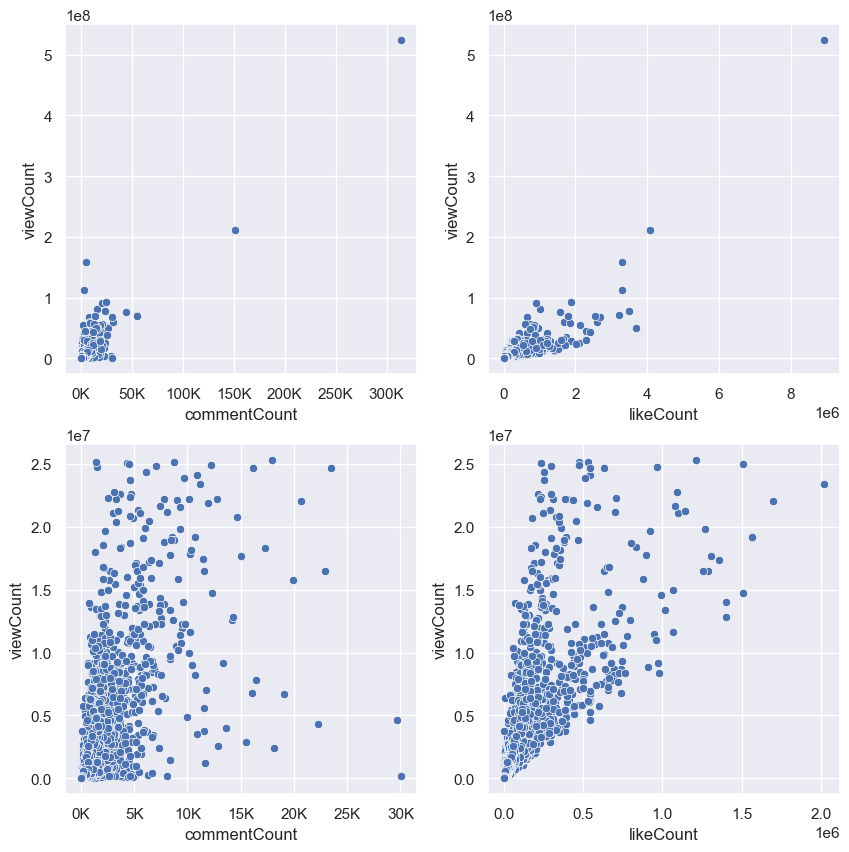

In [76]:
sns.set(rc={'figure.figsize':(10, 10)})
fig, ax =plt.subplots(2,2)
sns.scatterplot(data = video_df, x = "commentCount", y = "viewCount", ax=ax[0][0])
ax[0][0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
sns.scatterplot(data = video_df, x = "likeCount", y = "viewCount", ax=ax[0][1])
sns.scatterplot(data = video_df_remOutlier, x = "commentCount", y = "viewCount", ax=ax[1][0])
ax[1][0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
sns.scatterplot(data = video_df_remOutlier, x = "likeCount", y = "viewCount", ax=ax[1][1])

<Axes: xlabel='likeRatio', ylabel='viewCount'>

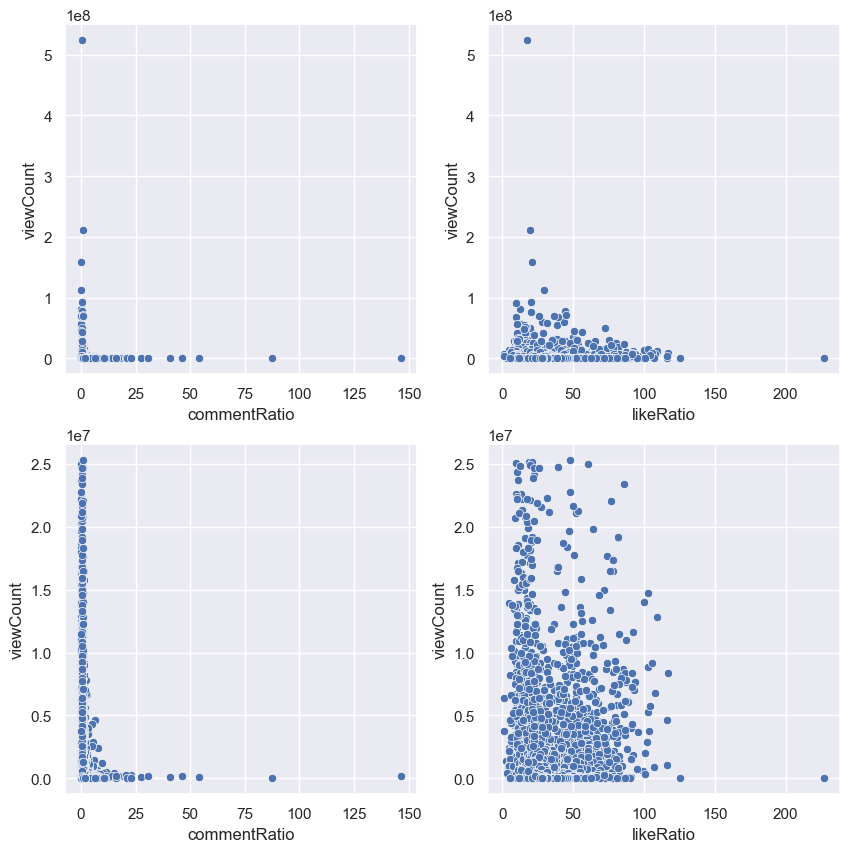

In [77]:
sns.set(rc={'figure.figsize':(10, 10)})
fig, ax = plt.subplots(2,2)
sns.scatterplot(data = video_df, x = "commentRatio", y = "viewCount", ax=ax[0][0]) #video_df_remOutlier
sns.scatterplot(data = video_df, x = "likeRatio", y = "viewCount", ax=ax[0][1])
sns.scatterplot(data = video_df_remOutlier, x = "commentRatio", y = "viewCount", ax=ax[1][0]) #video_df_remOutlier
sns.scatterplot(data = video_df_remOutlier, x = "likeRatio", y = "viewCount", ax=ax[1][1])

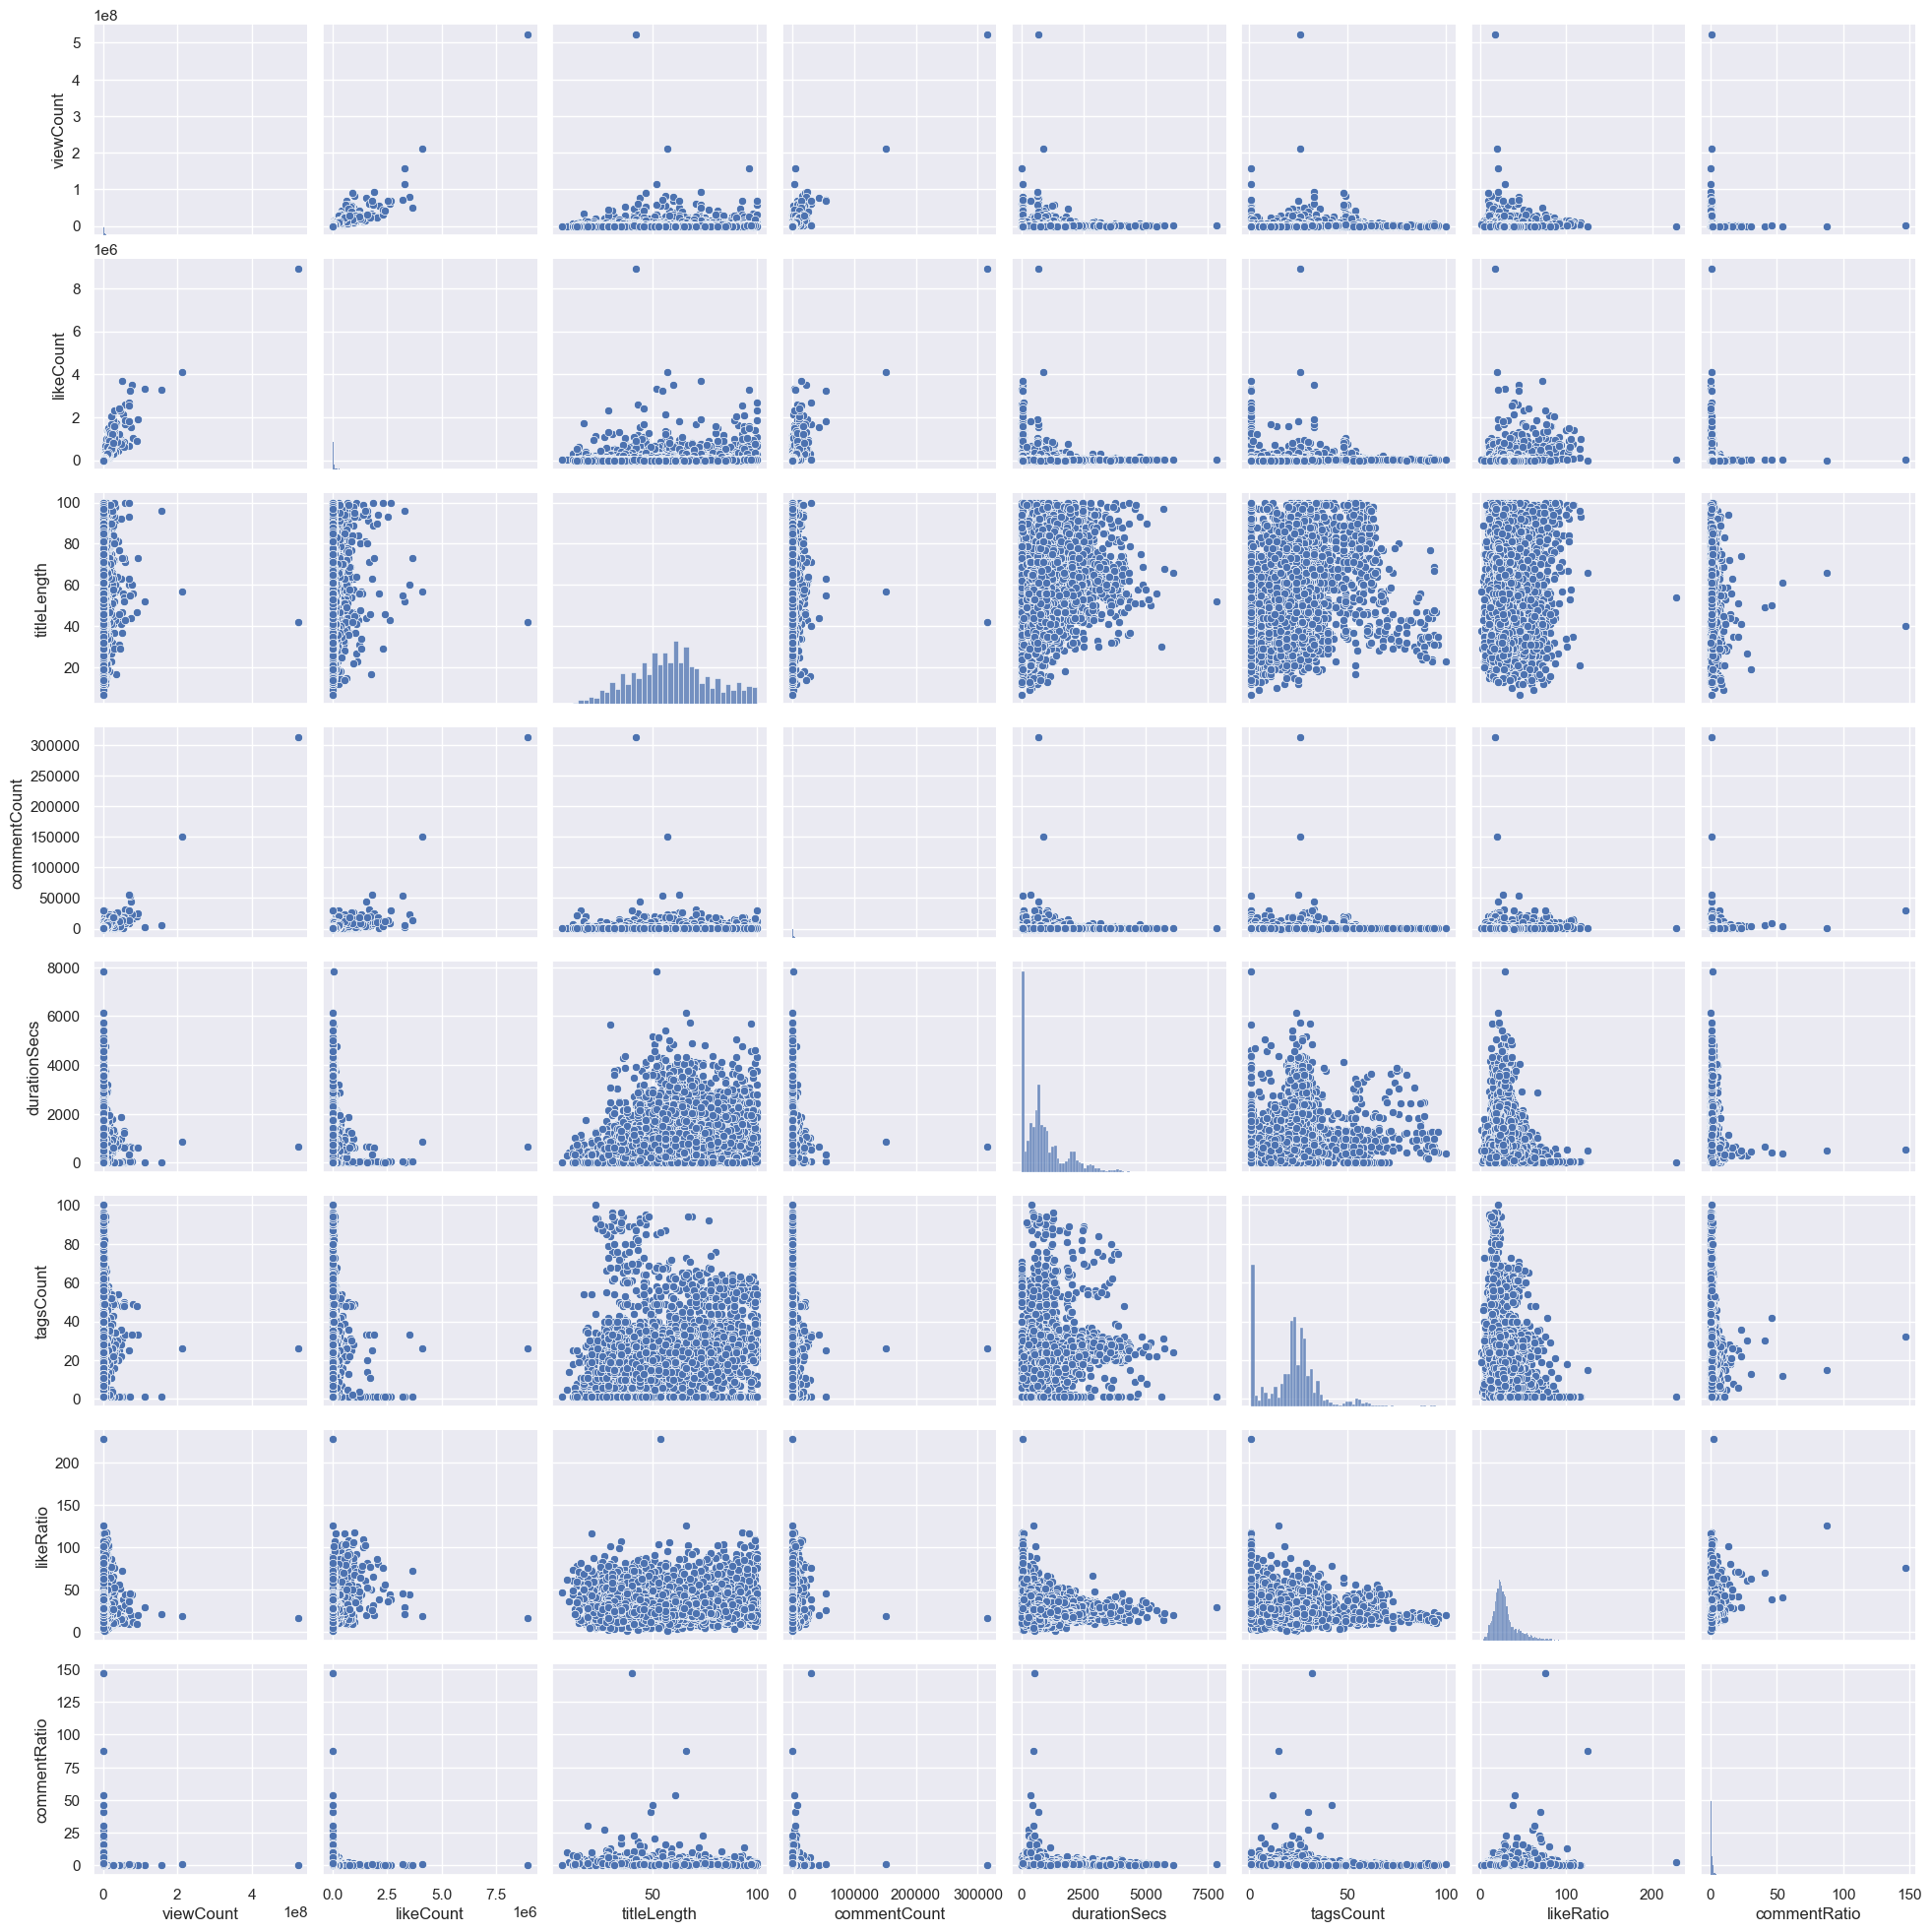

In [78]:
sns.pairplot(video_df[cols_of_interest])

In [79]:
corrmatrix = video_df[cols_of_interest].corr()

<Axes: >

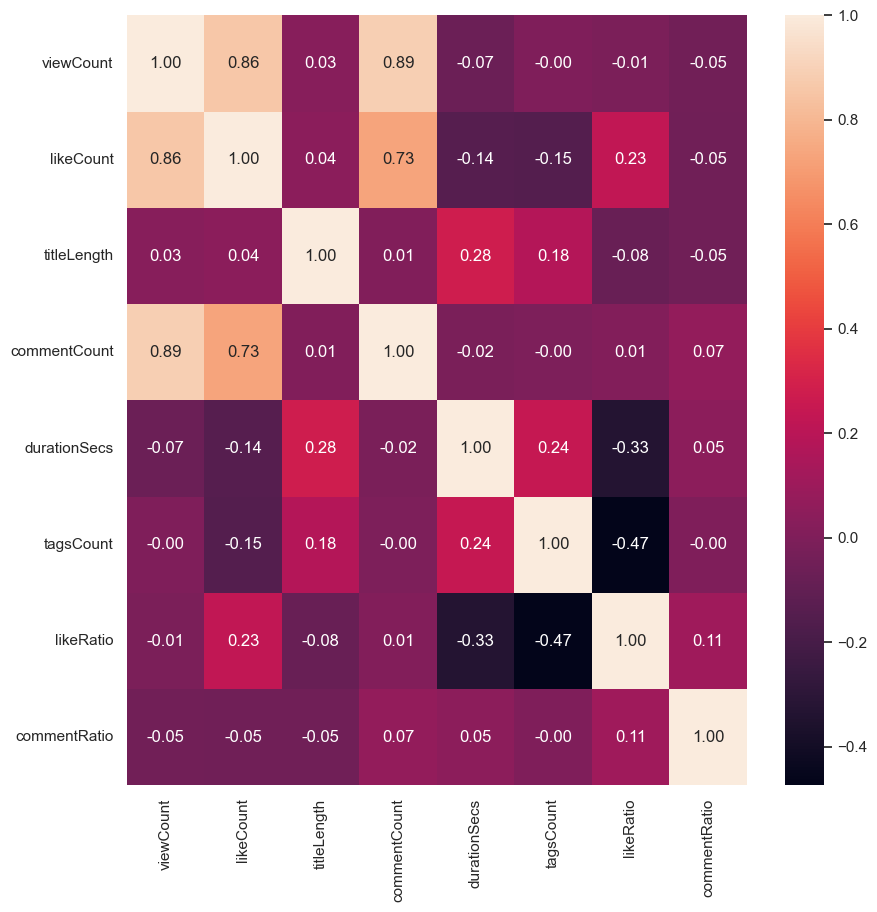

In [80]:
#plt.rcParams['figure.figsize'] = (8,6)
sns.heatmap(corrmatrix, annot=True, fmt=".2f")

<h2> Does the video duration matter for views and interaction (likes/ comments)? </h2>

Now we plot the duration against comment count and like count. It can be seen that actually shorter videos tend to get more likes and comments than very long videos. 

<Axes: xlabel='durationSecs', ylabel='Count'>

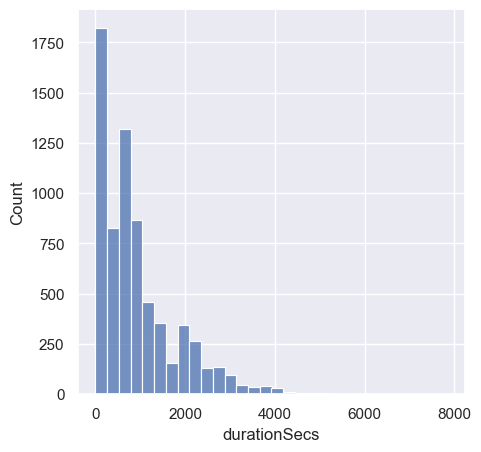

In [81]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.histplot(data=video_df , x="durationSecs", bins=30)

<Axes: xlabel='durationSecs', ylabel='likeCount'>

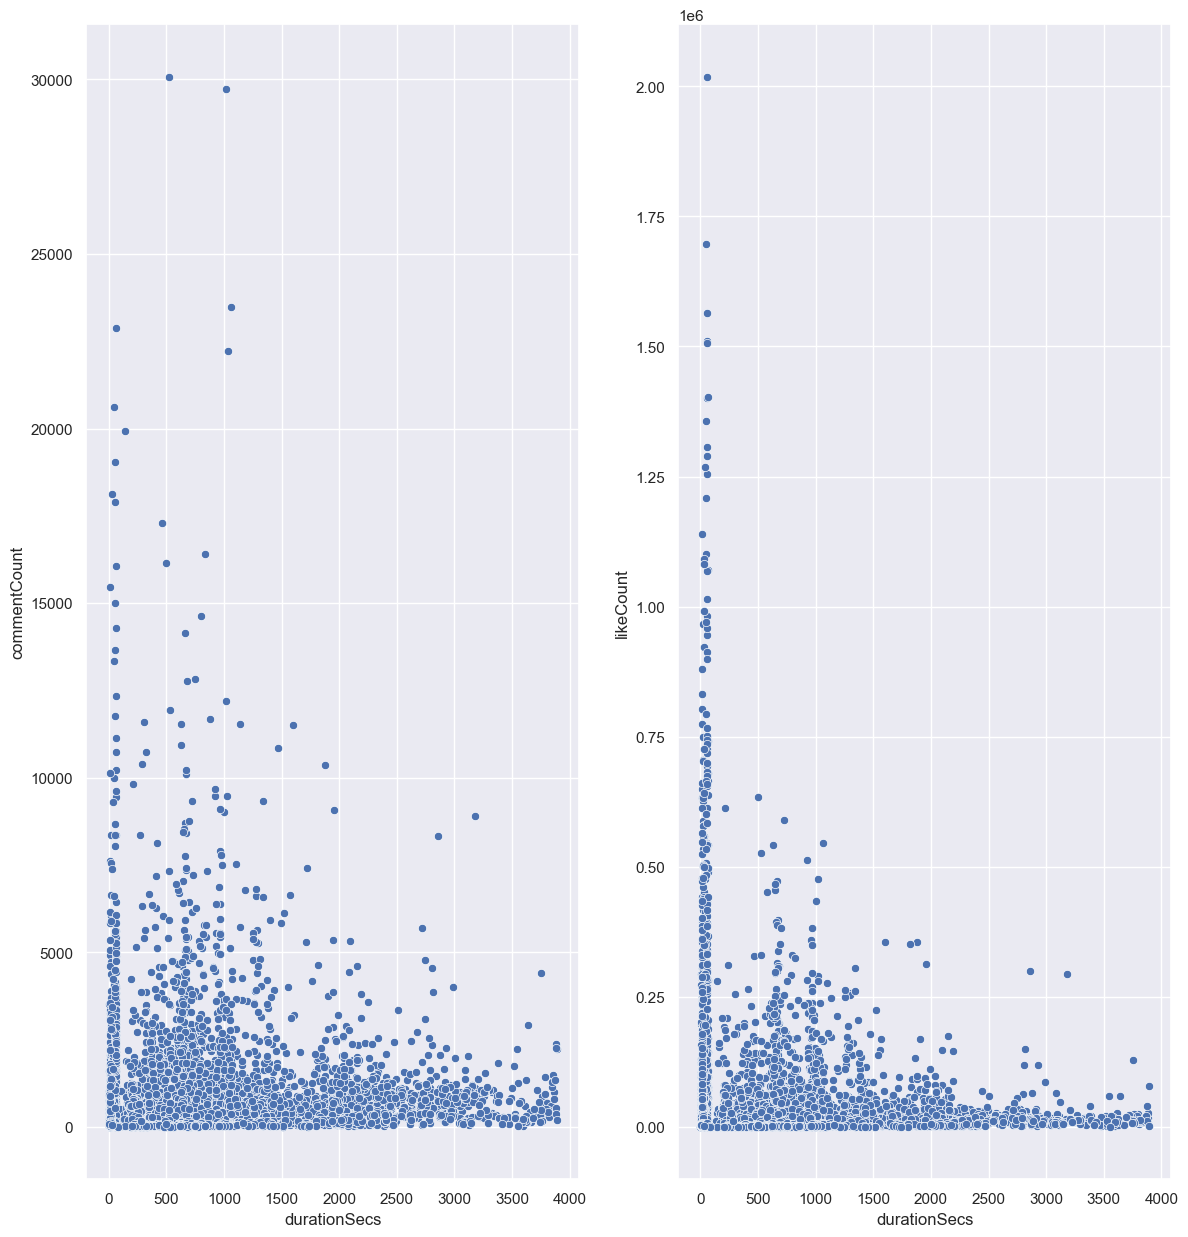

In [82]:
sns.set(rc={'figure.figsize':(14, 15)})
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video_df_remOutlier, x = "durationSecs", y = "commentCount", ax=ax[0])
sns.scatterplot(data = video_df_remOutlier, x = "durationSecs", y = "likeCount", ax=ax[1])

<h2> Relationship between title length and view count </h2>

There is no strong correlation between title length and view count, and most video titles tend to be between 40-75 characters long.

<Axes: xlabel='titleLength', ylabel='viewCount'>

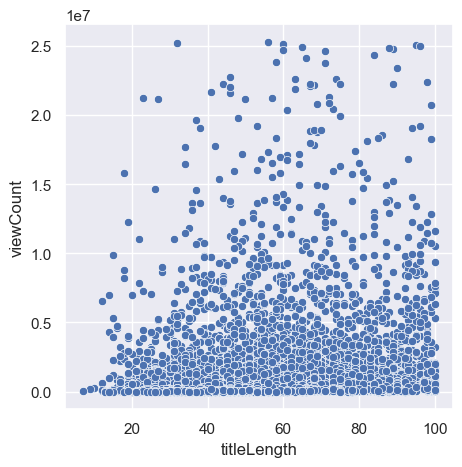

In [83]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.scatterplot(data = video_df_remOutlier, x = "titleLength", y = "viewCount")

<Axes: xlabel='titleLength', ylabel='Count'>

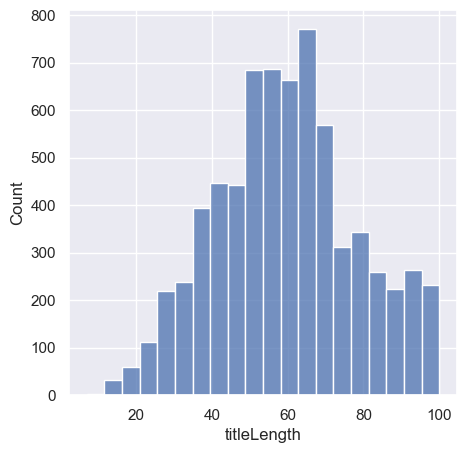

In [84]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.histplot(data=video_df , x="titleLength", bins=20)

<h2> Relationship between tag count and view count </h2>

There is no strong correlation between tag and view count. Most videos have either 0-5 tags or 20-30 tags.

<Axes: xlabel='tagsCount', ylabel='viewCount'>

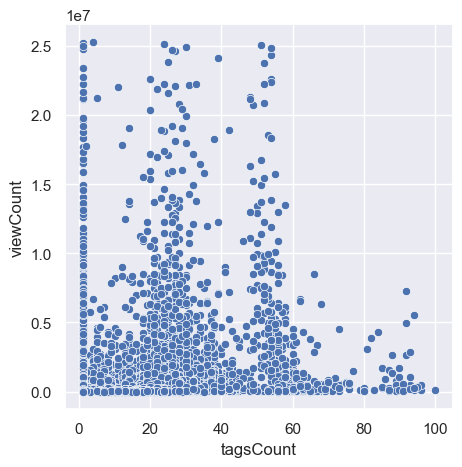

In [85]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.scatterplot(data = video_df_remOutlier, x = "tagsCount", y = "viewCount")

<Axes: xlabel='tagsCount', ylabel='Count'>

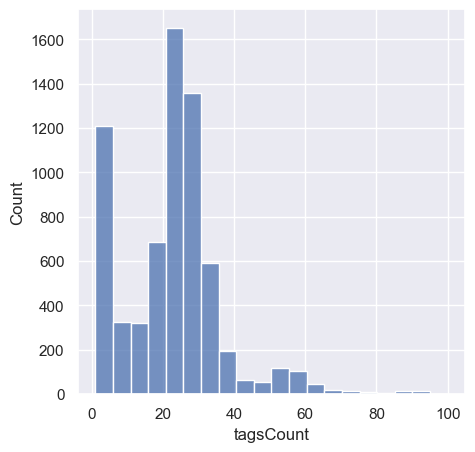

In [86]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.histplot(data=video_df_remOutlier , x="tagsCount", bins=20)

<h2> Wordcloud for words in title </h2>

* Many home workout videos target the <b> full </b> body, but <b> ab </b> videos tend to be popular as well, as noted earlier.
* Some other popular terms are <b> Fat burn </b>, <b> hiit </b> (high intensity interval training), <b> challenge </b>. Many female viewers have fat/weight loss as their target. "Challenge" videos are always a good way to motivate people. YouTubers tend to encourage viewers to take on the challenge and consistenly perform certain workouts of their to see coveted results (such as abs in 15 days).
* The word <b> equipment </b> features frequently as many people who engage in home exercises are beginners-intermediate level and may not have dumbells and other exercise equipment.
* Mentioning the parts of the body that are being targeted - <b> leg , booty, thigh </b> is a good strategy.
* Mentioning the duration of the workout (in <b> minute</b>s) is standard practice among the chosen set of YouTubers.
* <b> repeat</b> : Viewers seem to workouts that do not have repititive exercises (hence the word ).
* <b> Short </b> : as people prefer short videos when strapped for time).

In [87]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item.lower() for item in str(x).split() if item not in stop_words])

In [88]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");
    plt.show()

Removing some of the most common words that did not give additional insight and took away from the rest of the featured words:

In [89]:
#all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
#from collections import Counter
#wordcount = Counter(all_words)
#df_wordcount = pd.DataFrame.from_dict(wordcount, orient='index')
#df_wordcount.plot(kind='bar')

In [90]:
#[w for w in list(df_wordcount.sort_values(0, ascending=False)[5:100].index) if len(w) > 1 ]

In [91]:
def generateWordCloud(channel = 'all'):
    stop_words = set(stopwords.words('english'))
    if channel == 'all':
        data = video_df
        plt_title = "All video titles"
    else:
        data = video_df[video_df["channelTitle"] == channel]
        plt_title = "Video titles by "+channel
    all_words = list([a for b in data['title_no_stopwords'].tolist() for a in b])
    all_words_edited = list(filter(lambda a: a.lower() not in ("workout", "body", "min","home","day"), all_words))
    all_words_str = ' '.join(all_words_edited) 
    print(plt_title)
    print("------------------------------------------")
    wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='hsv', collocations=False).generate(all_words_str)
    plot_cloud(wordcloud)

All video titles
------------------------------------------


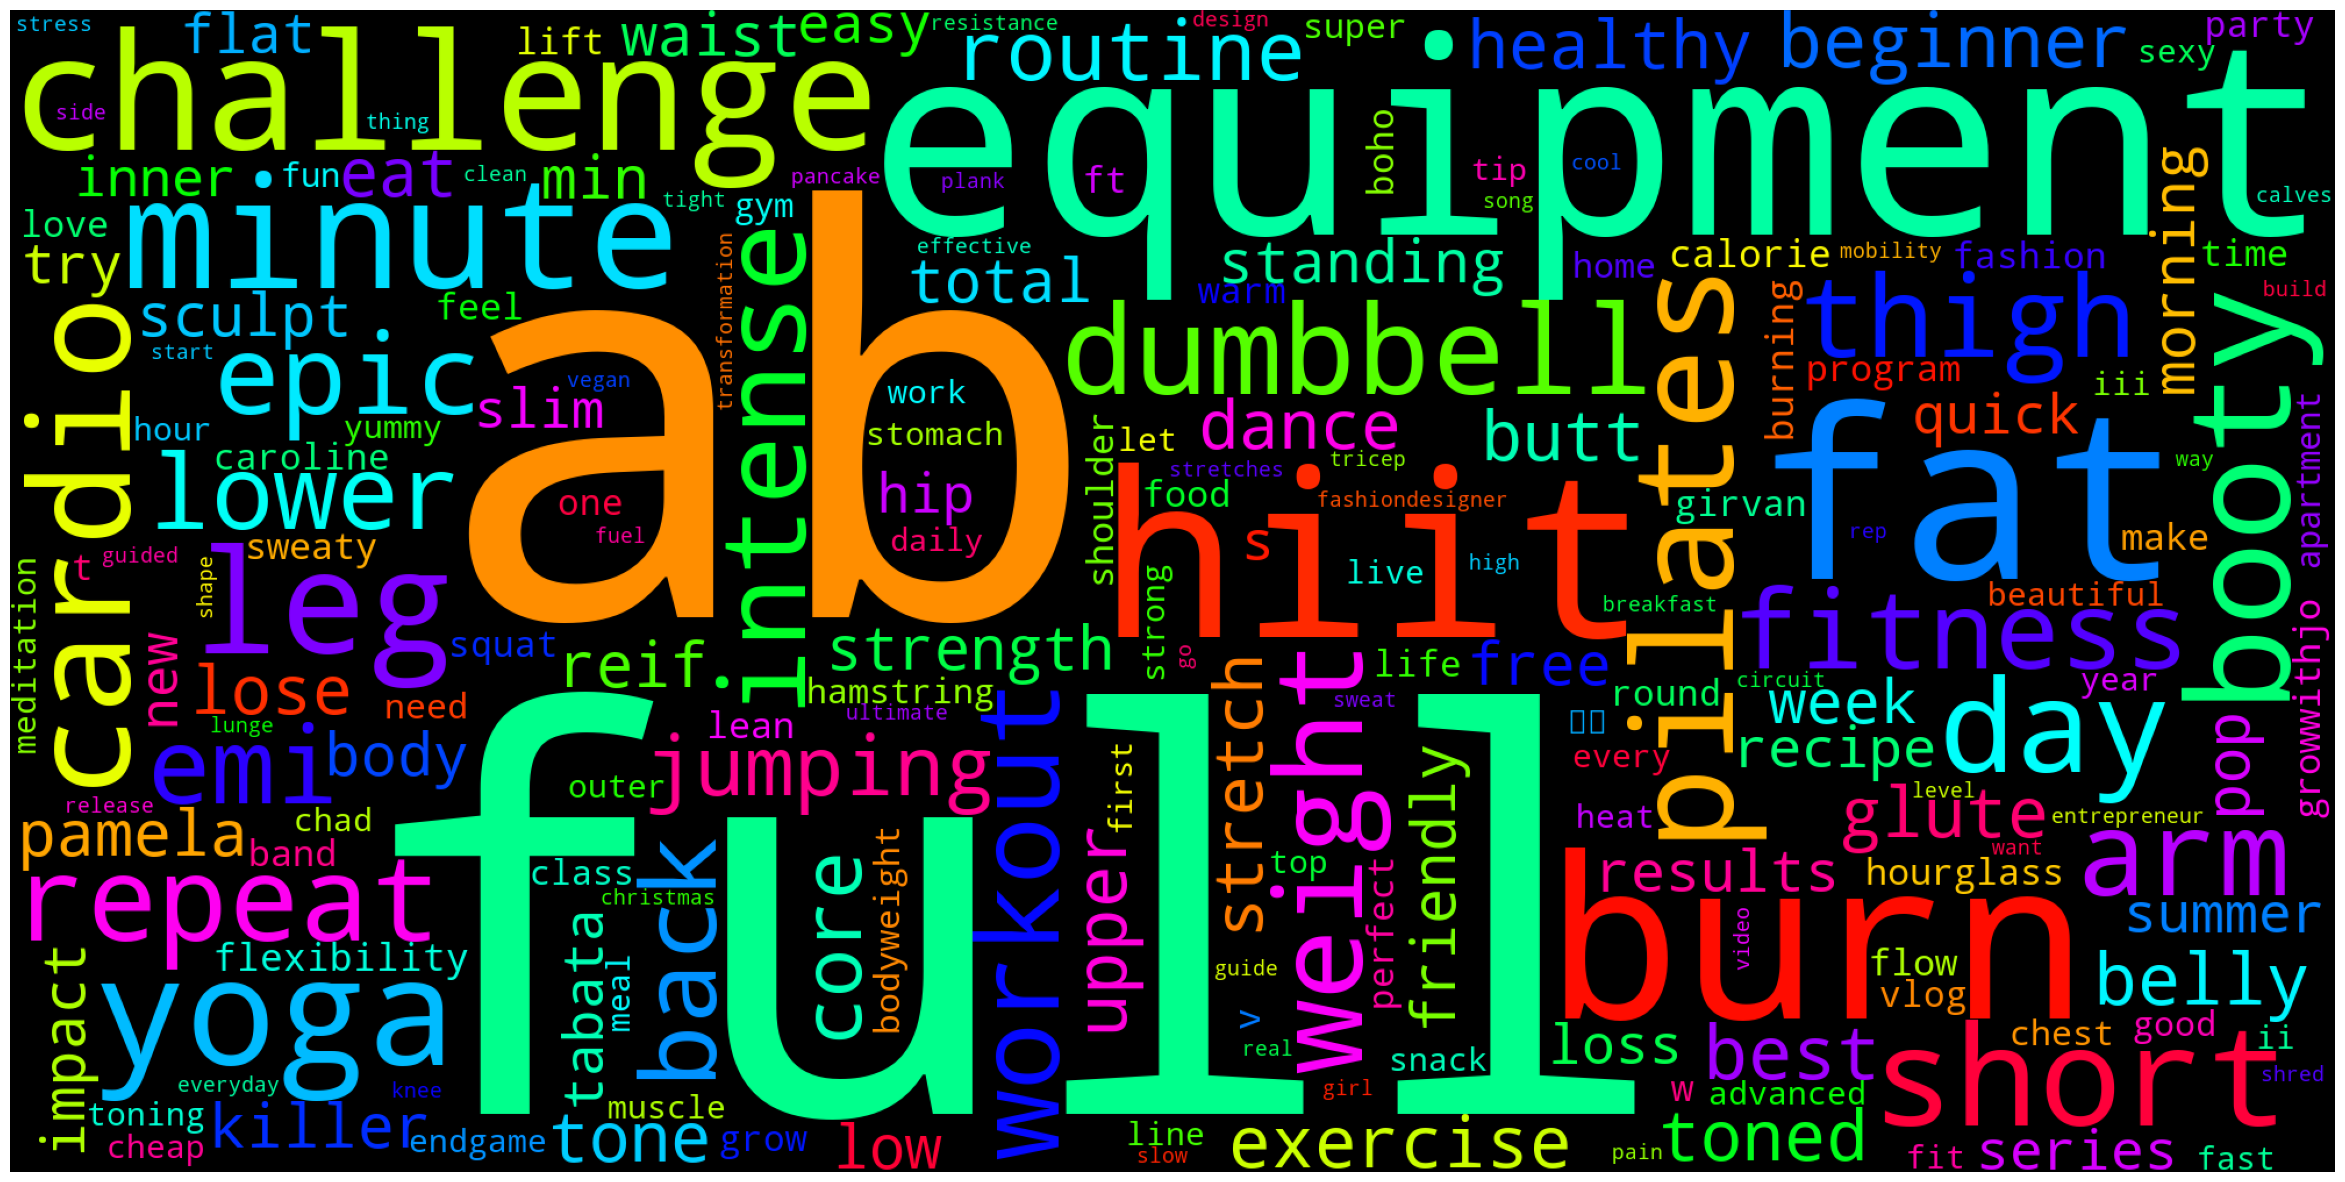

In [92]:
generateWordCloud()

<h3> Having a look at what words 3 of the most subscribed YouTuber's in our dataset use in their titles </h3>

Video titles by Chloe Ting
------------------------------------------


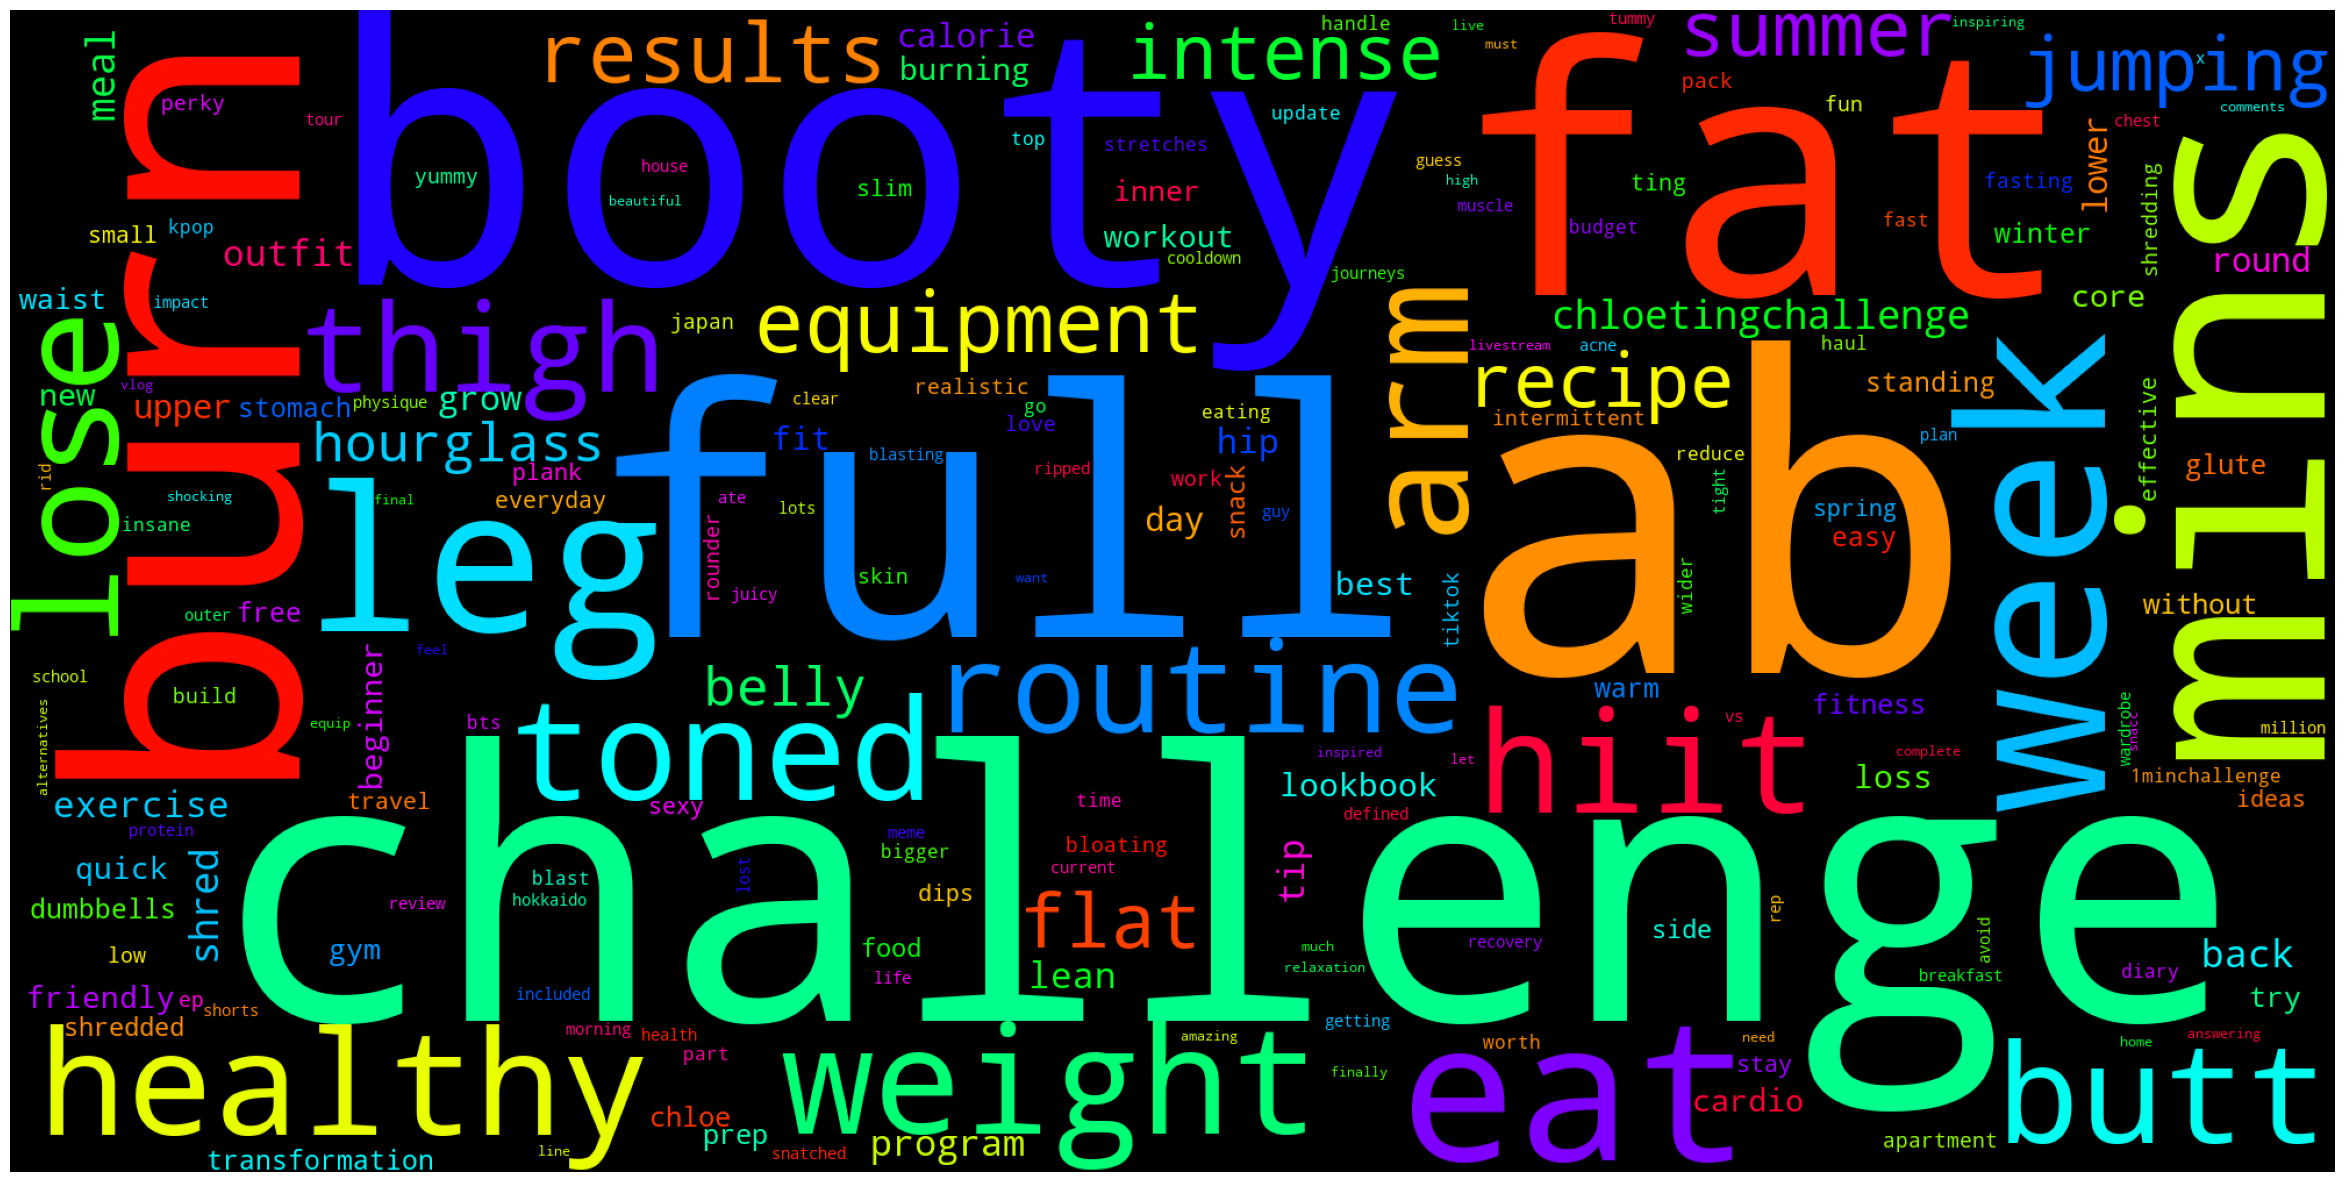

Video titles by Pamela Reif
------------------------------------------


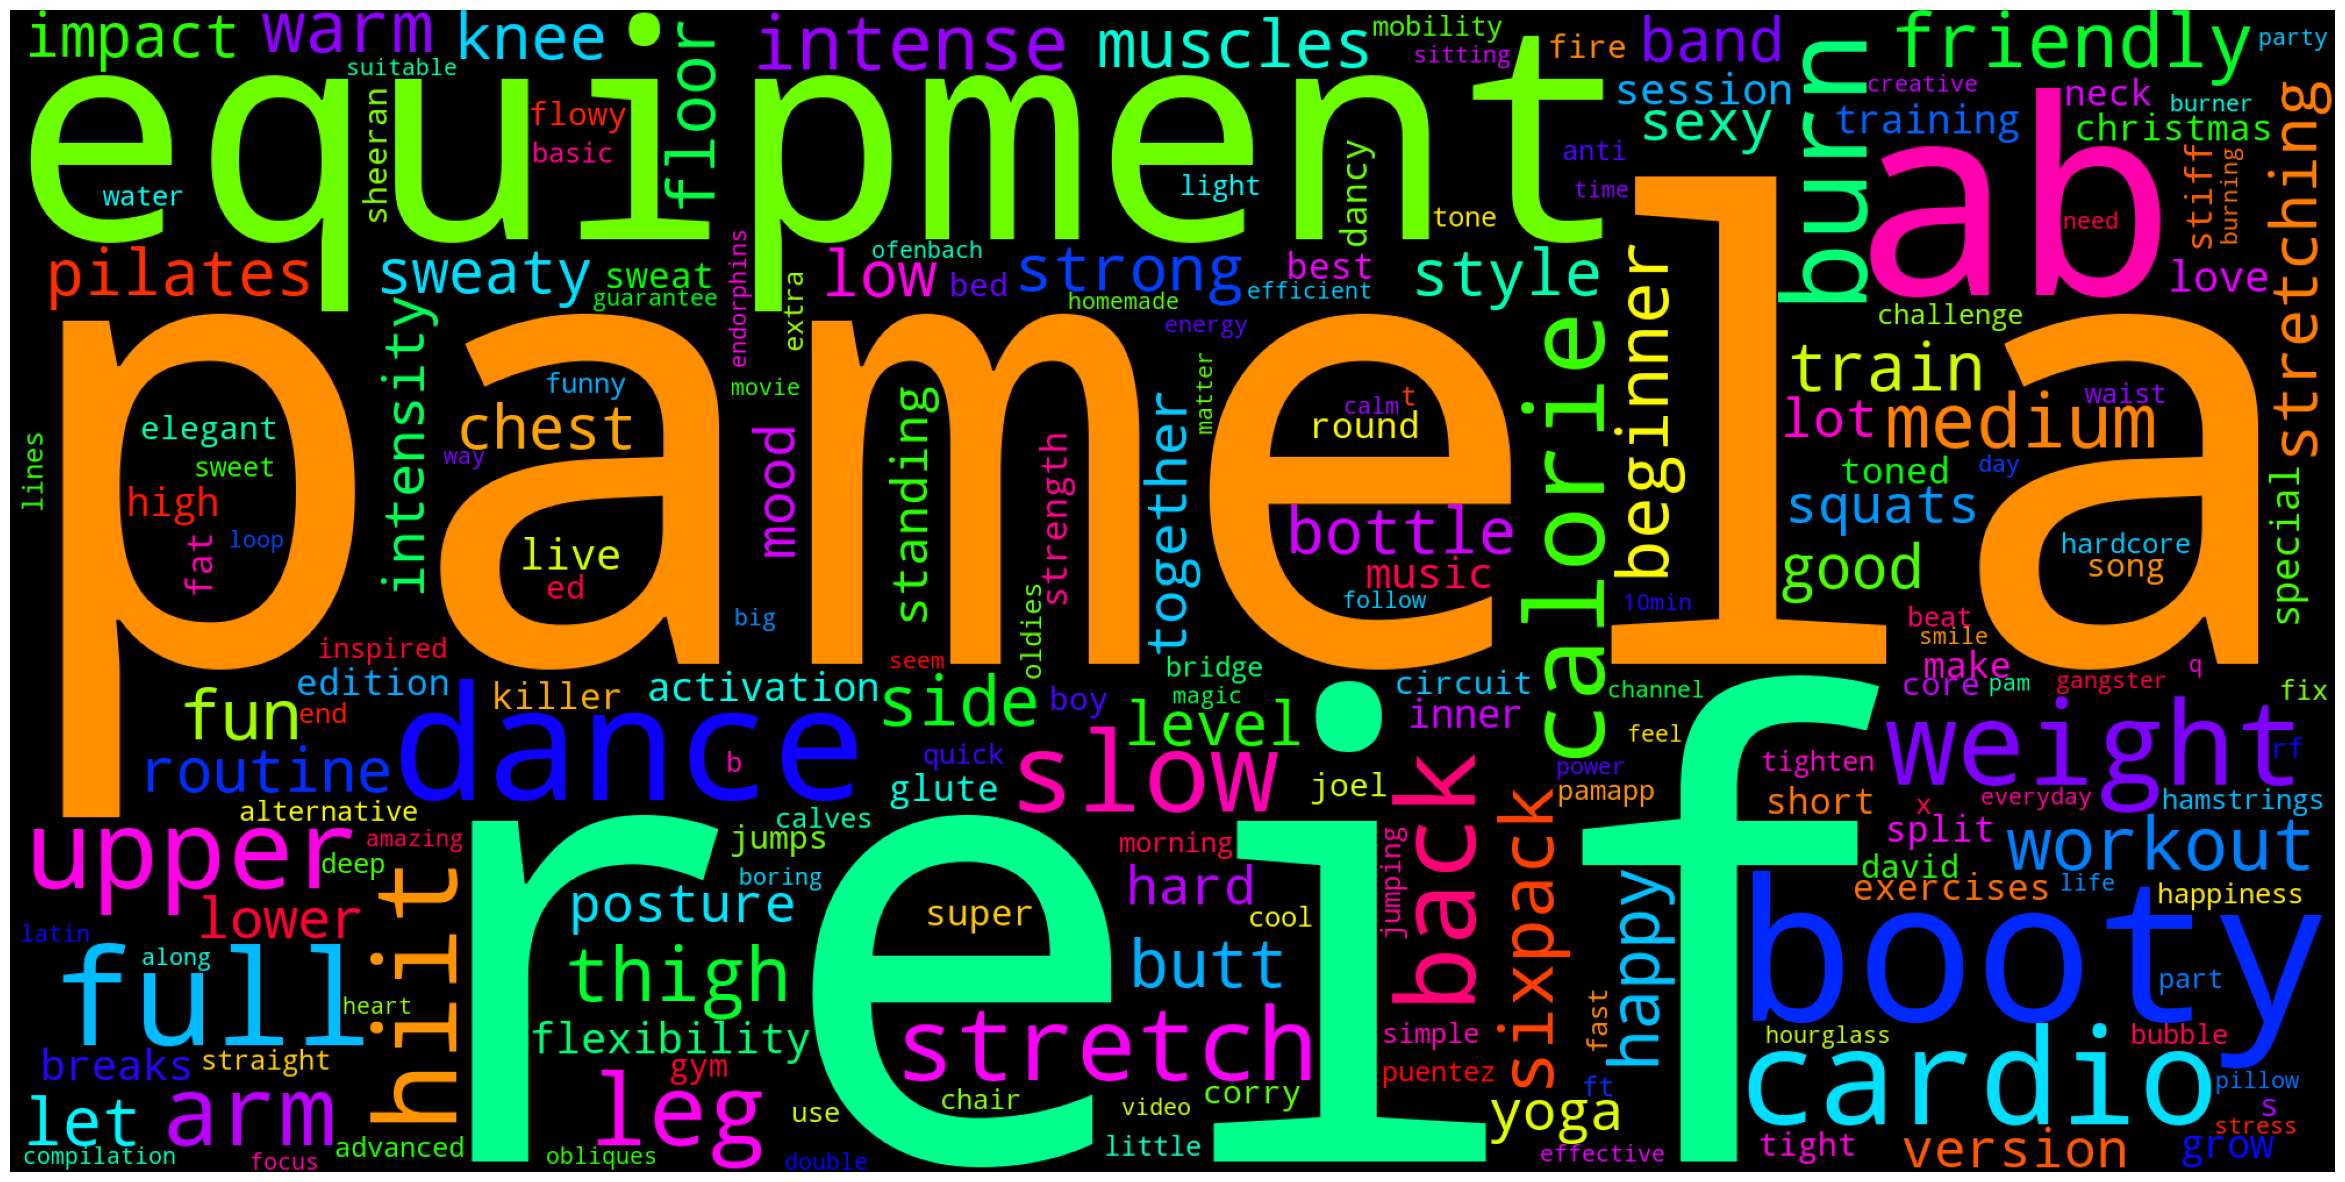

Video titles by blogilates
------------------------------------------


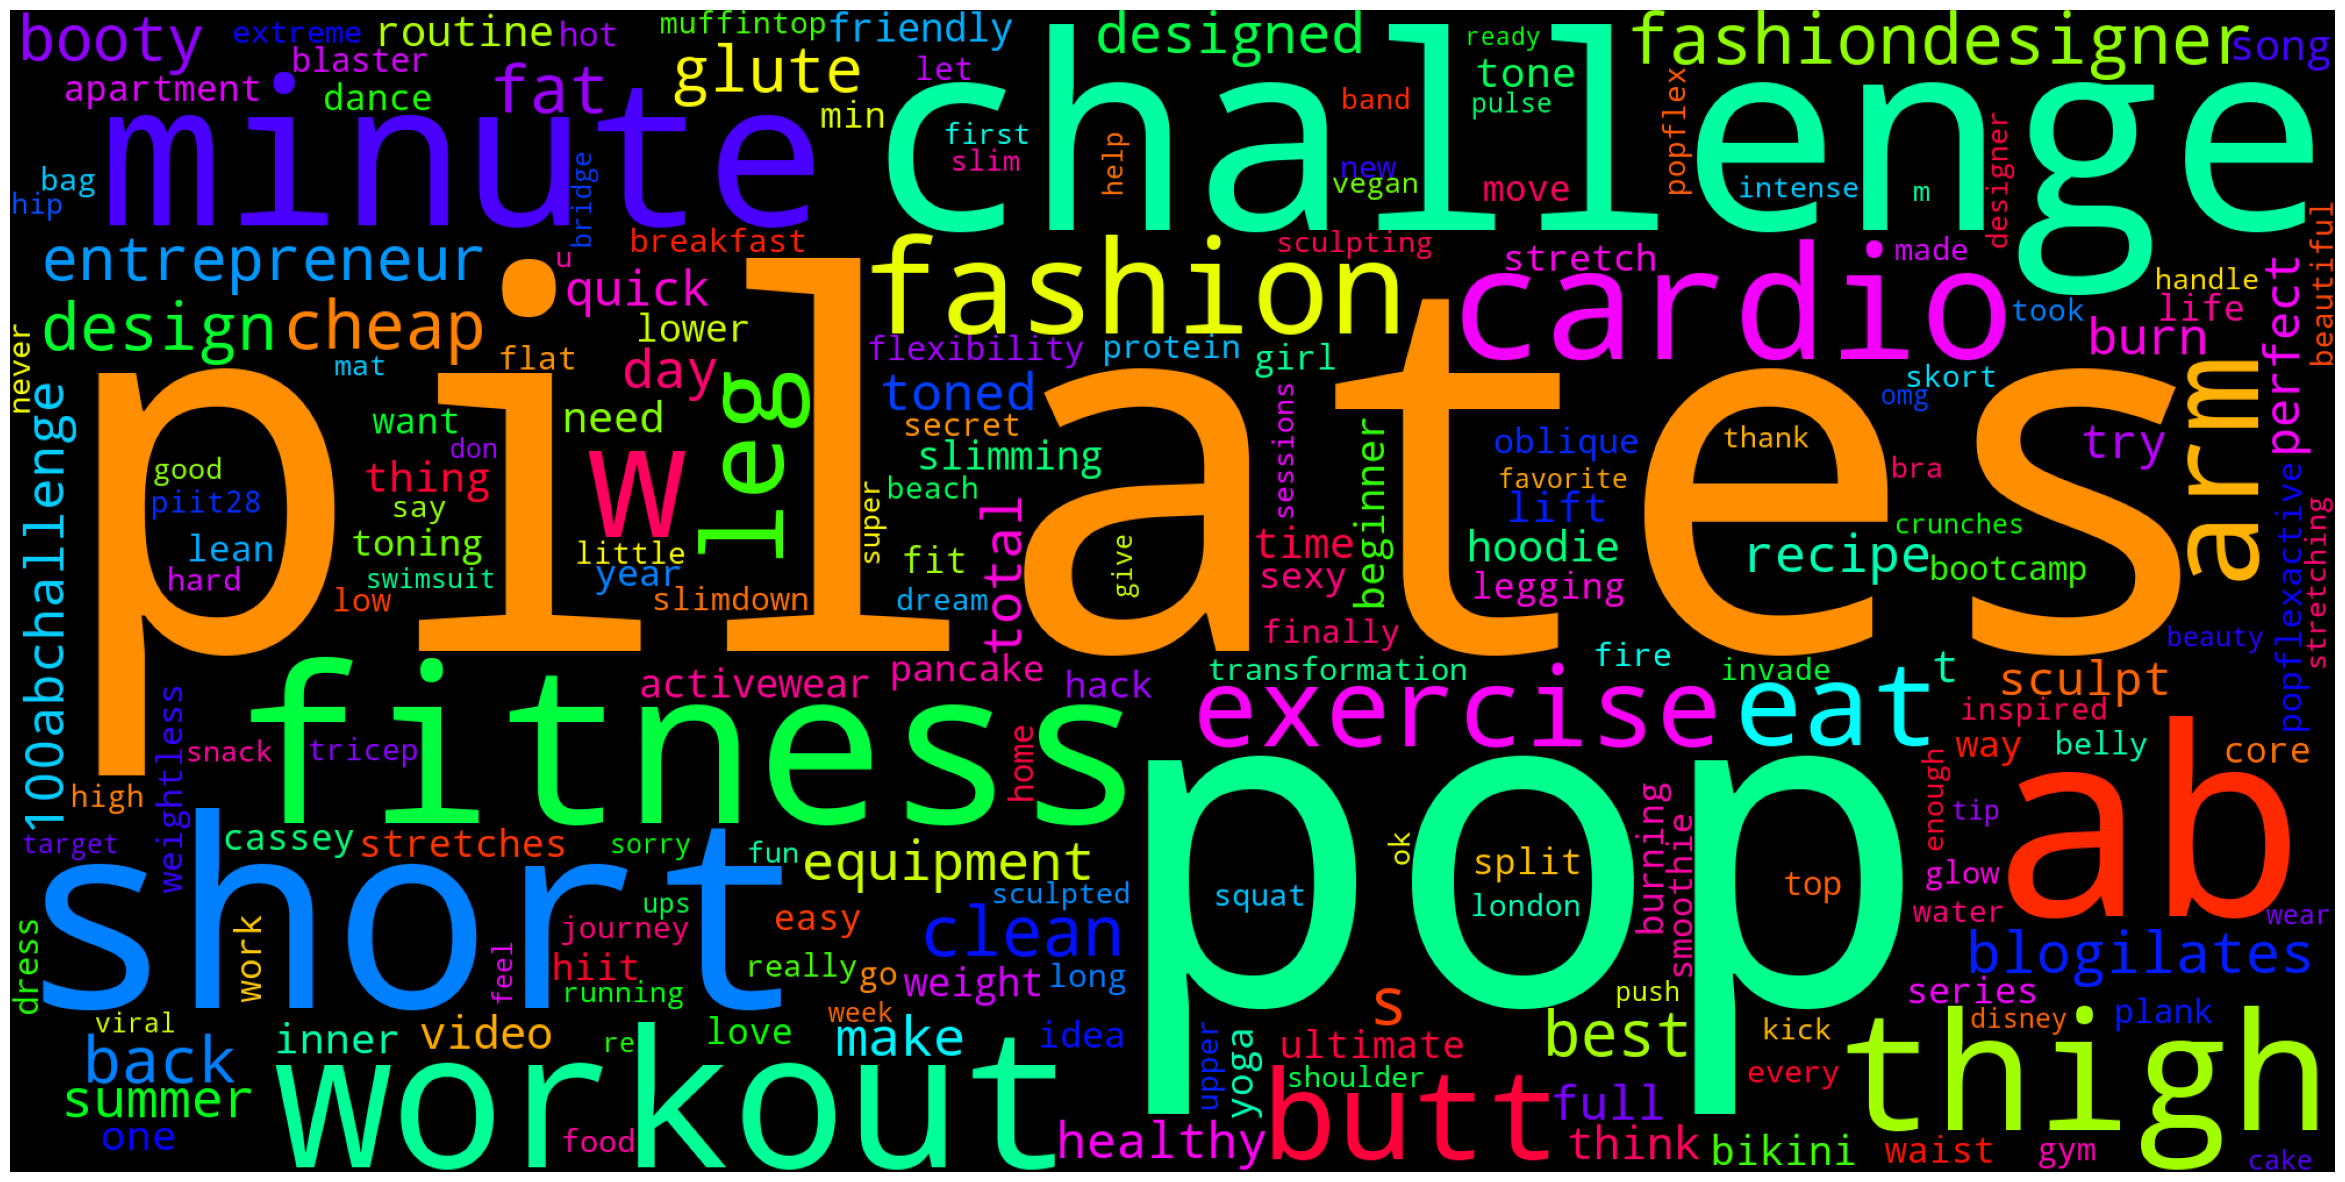

In [93]:
n = 3
topn = all_channel_data.sort_values('subscribers', ascending=False)["channelName"][:n]
for c in topn:
    generateWordCloud(c)

<h2> Relationship between video length and views </h2>

I wanted to understand the distribution of video lengths uploaded by YouTubers. My personal preference is longer workout videos (30 minutes at least), that get your heart rate up. I now know, statistically, two YouTuber who best cater to my requirements - growingananas and Caroline Girvan. 

Most other YouTubers create several short duration videos - ranging between 1 to 20 minutes. These target particular sections of the body. This is a clever strategy as shorter videos are consumed more readily and have more repeat viewership - with 6-12 minute videos racking up nearly 2.7M views on average. In contrast, 24-40 minute long videos have 1M views on average.

For every YouTuber, we can get an idea of their niche based on the length of the exercise videos they upload, and what kind of exercises do their audiences use their channel for. I have considered the average video count for videos in a bucket to estimate their popularity with viewers.

* Chloe Ting, Pamela Reif, Boho Beauitful Yoga: their best performing videos fall in these buckets: 6-12 minutes and 12-24 minutes. Lilly Sabri's content most popular content lies in the 6-12 minute bucket.
* growingannanas, emi wong, growwithjo: their user base that prefers longer videos: 24-40 minutes (myself included). Blogilates, Madfit have relatively consistent viewership across video length buckets, but her longer videos fare better.


In [94]:
rangeindex = ["0.0 - 5.9", "6.0 - 11.9", "12.0 - 23.9", "24.0 - 39.9", "40.0 - 69.9", "70.0 - 139.9"]
minbins = [0,6,12,24, 40, 70, 140]
video_df["durationMins"] = round(video_df["durationSecs"]/60.0,1)
def videoDurationDistribution(channel='all'):
    """
    Plot and return distribution of videos for the whole dataset
    or a particular channel by their time duration
    
    Params:
    channel = channel name
    
    Returns:
    histogram of videos by duration
    
    """
    if channel == 'all':
        data = video_df
        plt_title = "Video Duration Distribution for all channels in dataset"
    else:
        data = video_df[video_df["channelTitle"] == channel]
        plt_title = "Video Duration Distribution for "+channel
    
    temp = pd.DataFrame(np.histogram(data["durationMins"], 
                            bins = minbins), 
                            index=["count", "lower_bound in mins"]).T
    temp['upper_bound in mins'] = 140
    temp['channelTitle'] = channel
    for index, r in temp.iterrows():
        if index < temp.shape[0]-1:
            temp.at[index, 'upper_bound in mins'] = temp.at[index+1, 'lower_bound in mins']-0.1 
    temp = temp.iloc[:-1,:]
    temp['range in mins'] = temp['lower_bound in mins'].apply(lambda x: "%.1f" % x) +" - "+temp['upper_bound in mins'].apply(lambda x: "%.1f" % x) #.astype(str)
    temp['% of count'] = (temp['count']*100.0/np.nansum(temp['count'])).apply(lambda x: "%.1f" % x)
    #display(temp)
    plt.rcParams['figure.figsize'] = (5, 5)
    y = sns.histplot(data=data , x="durationMins", bins=15, stat="percent")
    y.bar_label(y.containers[1], labels=["{:.1f}".format(v) if v else '' for v in y.containers[1].datavalues], fontsize=8)
    plt.title(plt_title, fontsize = 14)
    plt.show()
    temp.drop(columns=['lower_bound in mins', 'upper_bound in mins'], inplace=True)
    return temp

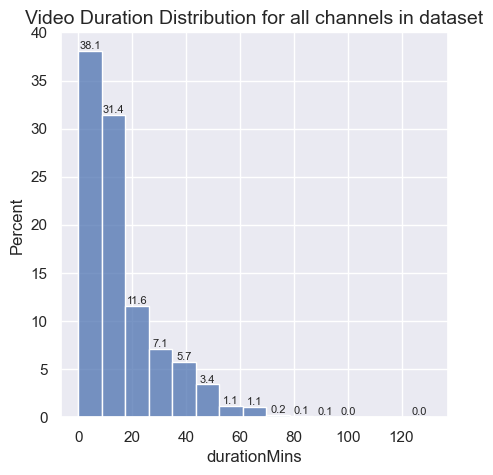

count channelTitle range in mins % of count
0  2080.0          all     0.0 - 5.9       29.9
1  1565.0          all    6.0 - 11.9       22.5
2  1876.0          all   12.0 - 23.9       27.0
3   915.0          all   24.0 - 39.9       13.2
4   491.0          all   40.0 - 69.9        7.1
5    30.0          all  70.0 - 139.9        0.4

In [95]:
videoDurationDistribution()

In [96]:
def videoDurationDistributions(channels):
    cols = 3
    rows = math.ceil(len(channels)/cols)
    sns.set(rc={'figure.figsize':(rows*4, 16)})
    fig, ax = plt.subplots(rows,cols)
    videoDurationDistribution_byChannel = pd.DataFrame()
    fig.suptitle('Distribution of video counts by video length (in minutes)')
    for i in range(len(channels)):
        channel = channels[i]
        data = video_df[video_df["channelTitle"] == channel]
        temp = pd.DataFrame(np.histogram(data["durationMins"], 
                            bins = minbins), 
                            index=["count", "lower_bound in mins"]).T
        temp['upper_bound in mins'] = 140
        temp['channelTitle'] = channel
        for index, r in temp.iterrows():
            if index < temp.shape[0]-1:
                temp.at[index, 'upper_bound in mins'] = temp.at[index+1, 'lower_bound in mins']-0.1 
        temp = temp.iloc[:-1,:]
        temp['range in mins'] = temp['lower_bound in mins'].apply(lambda x: "%.1f" % x) +" - "+temp['upper_bound in mins'].apply(lambda x: "%.1f" % x) #.astype(str)
        temp['% of count'] = (temp['count']*100.0/np.nansum(temp['count'])).apply(lambda x: "%.1f" % x)
        y = sns.histplot(data=data , x="durationMins", bins=7, stat="percent", ax=ax[math.floor(i/cols)][i%cols])
        y.bar_label(y.containers[1], labels=["{:.1f}".format(v) if v else '' for v in y.containers[1].datavalues], fontsize=8)
        temp.drop(columns=['lower_bound in mins', 'upper_bound in mins'], inplace=True)
        if i%cols == 0:
            ax[math.floor(i/cols)][i%cols].set_ylabel('% of video count')
        else:
            ax[math.floor(i/cols)][i%cols].set_ylabel('')
        ax[math.floor(i/cols)][i%cols].set_xlabel('')
        ax[math.floor(i/cols)][i%cols].set_title(channel)
        videoDurationDistribution_byChannel = pd.concat([videoDurationDistribution_byChannel, temp], ignore_index=True)
    for i in range(len(channels), (rows* cols)):
        ax[math.floor(i/cols)][i%cols].set_visible(False)
    return videoDurationDistribution_byChannel

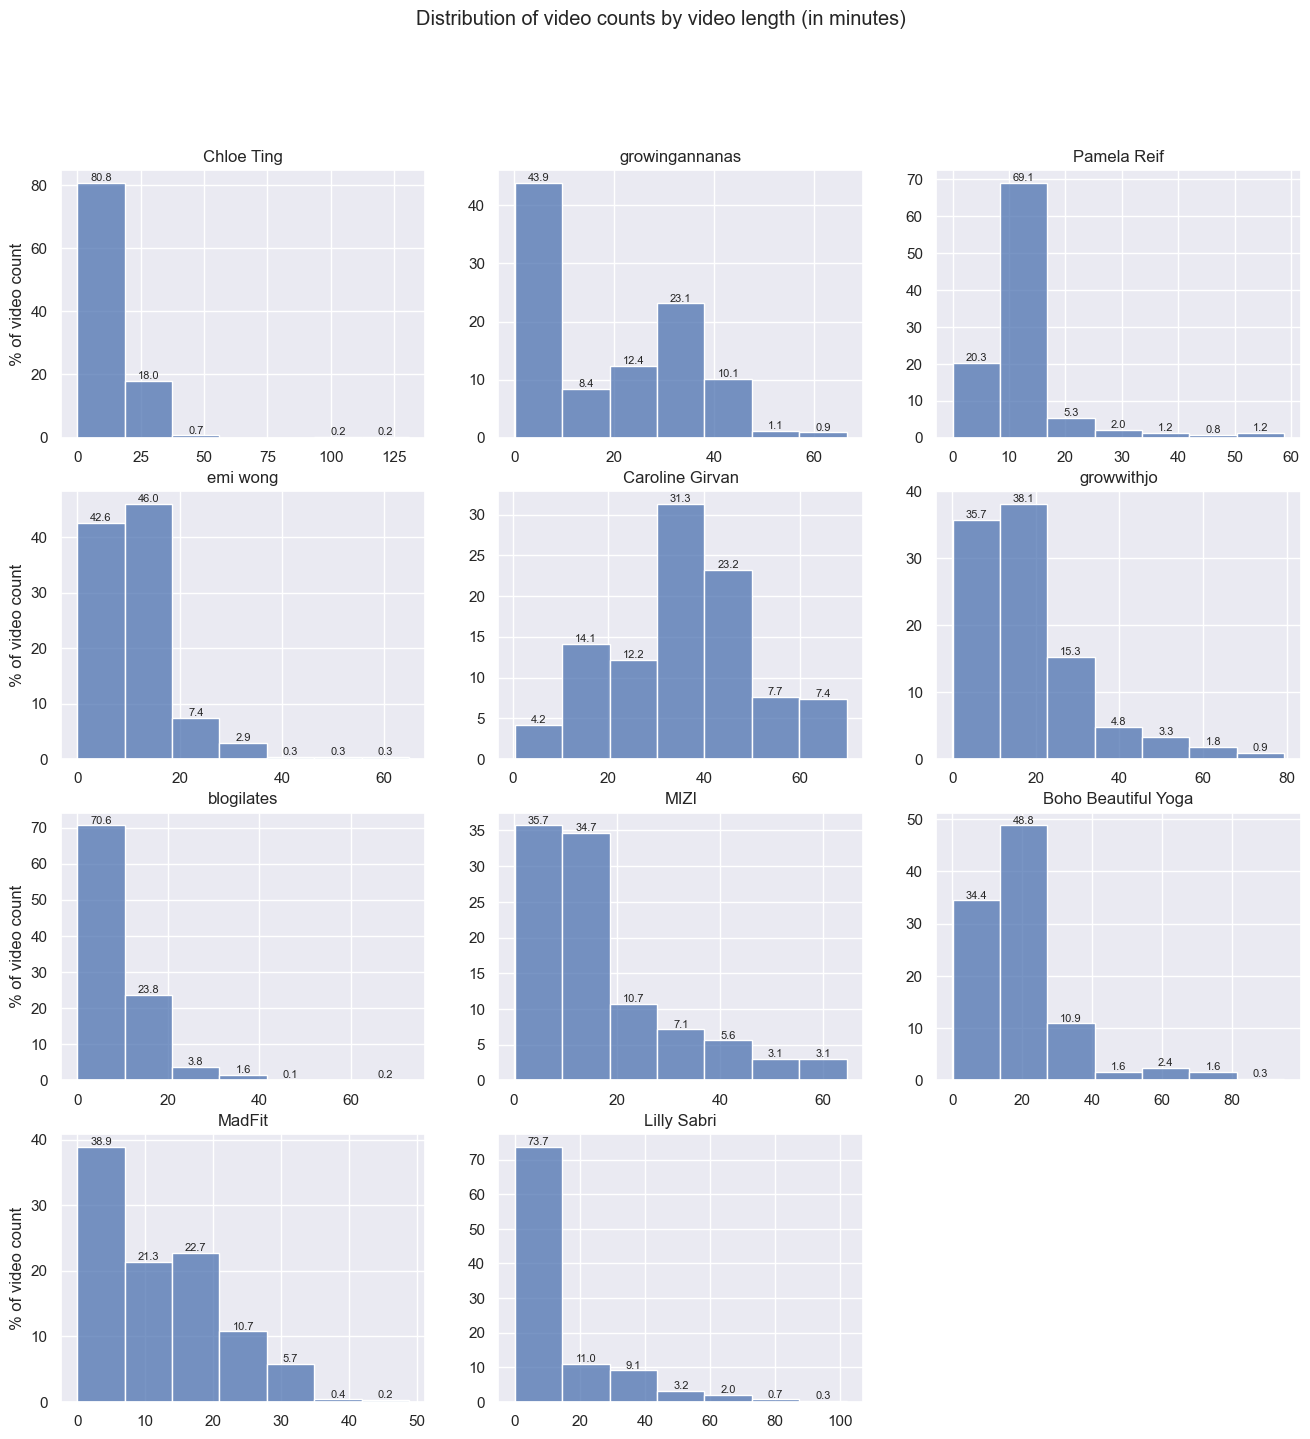

In [97]:
videoDurationDistribution_byChannel = videoDurationDistributions(channelTitles)

videoDurationDistribution_byChannel = pd.DataFrame()
for channel in channelTitles:
    videoDurationDistribution_byChannel = pd.concat([videoDurationDistribution_byChannel, videoDurationDistribution(channel)], ignore_index=True)

In [98]:
crosstab_table = pd.crosstab(videoDurationDistribution_byChannel["channelTitle"], videoDurationDistribution_byChannel["range in mins"], values=videoDurationDistribution_byChannel["count"], aggfunc="sum", margins=True, margins_name='Overall')
crosstab_table = crosstab_table.reset_index()
#crosstab_table.drop(columns=["70.0 - 140.00"], inplace=True, errors='ignore')
crosstab_table = crosstab_table[['channelTitle']+rangeindex+['Overall']]

In [99]:
crosstab_table

range in mins         channelTitle  0.0 - 5.9  6.0 - 11.9  12.0 - 23.9  \
0              Boho Beautiful Yoga       93.0        70.0        271.0   
1                  Caroline Girvan       13.0        28.0        110.0   
2                       Chloe Ting       40.0       169.0        191.0   
3                      Lilly Sabri      369.0       401.0        175.0   
4                             MIZI       45.0        63.0         48.0   
5                           MadFit      296.0       100.0        367.0   
6                      Pamela Reif       41.0       123.0         68.0   
7                       blogilates      591.0       357.0        226.0   
8                         emi wong      181.0       180.0        195.0   
9                   growingannanas      341.0        19.0         95.0   
10                      growwithjo       70.0        55.0        130.0   
11                         Overall     2080.0      1565.0       1876.0   

range in mins  24.0 - 39.9  40.0 - 69.9  70.0 - 139.9  Overall  
0                    108.0         27.0           9.0    578.0  
1                    243.0        245.0           0.0    639.0  
2                     18.0          2.0           2.0    422.0  
3                    104.0         70.0          16.0   1135.0  
4                     17.0         23.0           0.0    196.0  
5                     55.0          2.0           0.0    820.0  
6                      9.0          5.0           0.0    246.0  
7                     48.0          2.0           1.0   1225.0  
8                     18.0          6.0           0.0    580.0  
9                    247.0         81.0           0.0    783.0  
10                    48.0         28.0           2.0    333.0  
11                   915.0        491.0          30.0   6957.0

In [100]:
for col in crosstab_table.select_dtypes([np.number]).columns:
    if col != 'Overall':
        crosstab_table[col + " as % of all"] = round((crosstab_table[col]/crosstab_table['Overall'])*100,1)

In [101]:
crosstab_table.iloc[:, [0] + list(range(len(crosstab_table.columns)-5-1, len(crosstab_table.columns)))]

range in mins         channelTitle  0.0 - 5.9 as % of all  \
0              Boho Beautiful Yoga                   16.1   
1                  Caroline Girvan                    2.0   
2                       Chloe Ting                    9.5   
3                      Lilly Sabri                   32.5   
4                             MIZI                   23.0   
5                           MadFit                   36.1   
6                      Pamela Reif                   16.7   
7                       blogilates                   48.2   
8                         emi wong                   31.2   
9                   growingannanas                   43.6   
10                      growwithjo                   21.0   
11                         Overall                   29.9   

range in mins  6.0 - 11.9 as % of all  12.0 - 23.9 as % of all  \
0                                12.1                     46.9   
1                                 4.4                     17.2   
2                                40.0                     45.3   
3                                35.3                     15.4   
4                                32.1                     24.5   
5                                12.2                     44.8   
6                                50.0                     27.6   
7                                29.1                     18.4   
8                                31.0                     33.6   
9                                 2.4                     12.1   
10                               16.5                     39.0   
11                               22.5                     27.0   

range in mins  24.0 - 39.9 as % of all  40.0 - 69.9 as % of all  \
0                                 18.7                      4.7   
1                                 38.0                     38.3   
2                                  4.3                      0.5   
3                                  9.2                      6.2   
4                                  8.7                     11.7   
5                                  6.7                      0.2   
6                                  3.7                      2.0   
7                                  3.9                      0.2   
8                                  3.1                      1.0   
9                                 31.5                     10.3   
10                                14.4                      8.4   
11                                13.2                      7.1   

range in mins  70.0 - 139.9 as % of all  
0                                   1.6  
1                                   0.0  
2                                   0.5  
3                                   1.4  
4                                   0.0  
5                                   0.0  
6                                   0.0  
7                                   0.1  
8                                   0.0  
9                                   0.0  
10                                  0.6  
11                                  0.4

Taking a closer look at views per video based on video length, at an overall and per channel level:

In [102]:
def getRange(x):
    minbins = [0,6,12,24, 40, 70]
    bins = [i*60 for i in minbins]
    range_in_mins = "70.0 - 139.9"
    for i in range(1, len(bins)):
        if x < bins[i]:
            lower_bound_in_mins = round((bins[i-1]/60),1)
            upper_bound_in_mins = round((bins[i]-1)/60,1)-0.1
            range_in_mins = str(lower_bound_in_mins)+" - " + str(upper_bound_in_mins)
            break
    return range_in_mins

data = video_df
data["range in mins"] = data["durationSecs"].apply(getRange)


In [103]:
pvt_table_overall = pd.pivot_table(data, values=["video_id","viewCount", "likeCount", "commentCount"], index="range in mins",
                                   aggfunc={"video_id" : "count",  "viewCount":["sum","mean"],
                                   "likeCount":["sum","mean"], "commentCount":["sum","mean"]})
pvt_table_overall.reindex(rangeindex).style.format(precision=1)

In [104]:
pvt_table = pd.pivot_table(data, values=["video_id","viewCount", "likeCount", "commentCount"], index=["channelTitle","range in mins"],
                           aggfunc={"video_id" : "count",  "viewCount":["sum","mean"],
                                   "likeCount":["sum","mean"], "commentCount":["sum","mean"]})

In [105]:
pvt_table = pvt_table.reindex(pd.MultiIndex.from_product([channelTitles, rangeindex], names=['channelTitle','range in mins']))

In [106]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

In [107]:
pvt_table.style \
  .format(precision=1, thousands=",", decimal=".")\
.apply(highlight_max, props='color:blue', axis=0)\
.apply(highlight_min, props='color:red', axis=0)

<h2> Which day in the week are most videos uploaded? </h2> 

It's interesting to see that more videos are uploaded on Mondays, Wednesdays and Sundays. Targeting Mondays could indicate creators wanting to cater to those who want to start their week strong by establishing an exercise routine.

A closer look at each creator's distribution gives us an idea of their rhythm (Chloe Ting, for example, uploads largely on Tuesdays, Pamela Reif on on Wednesdays). This seems to be a personal preference and has real bearing - since exercise should ideally be a daily habit anyway.

In [108]:
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [109]:
def checkUploadDayDistribution(channel='all'):
    if channel == 'all':
        data = video_df
        plt_title = "Distribution of video upload by weekday for all channels in dataset"
    else:
        data = video_df[video_df["channelTitle"] == channel]
        plt_title = "Distribution of video upload by weekday for "+channel
    day_df = pd.DataFrame(data["publishDayName"].value_counts())
    day_df = day_df.reindex(weekdays).reset_index()
    if channel == 'all':
        plt.rcParams['figure.figsize'] = (4, 4)
        ax = day_df.plot.bar(x='index', y='publishDayName', rot=90)
        plt.title(plt_title)
        plt.xlabel('Weekday')
        plt.ylabel('Video count')
        ax.get_legend().remove()
        plt.show()
    day_df["publishDayName"] = day_df["publishDayName"]*100/np.sum(day_df["publishDayName"])
    ax = day_df.plot.bar(x='index', y='publishDayName', rot=90)
    plt.title(plt_title)
    plt.xlabel('Weekday')
    plt.ylabel('% of Video count')
    ax.get_legend().remove()
    plt.show()

In [110]:
def checkUploadDayDistributions(channels):
    cols = 3
    rows = math.ceil(len(channels)/cols)
    sns.set(rc={'figure.figsize':(rows*4, 16)})
    fig, ax = plt.subplots(rows,cols)
    #fig.suptitle('Distribution of video upload by weekday')
    for i in range(len(channels)):
        channel = channels[i]
        data = video_df[video_df["channelTitle"] == channel]
        day_df = pd.DataFrame(data["publishDayName"].value_counts())
        day_df = day_df.reindex(weekdays).reset_index()
        day_df['index'] = day_df['index'].apply(lambda x: x[0:3])
        day_df["publishDayName"] = day_df["publishDayName"]*100/np.sum(day_df["publishDayName"])
        sns.barplot(data=day_df, x='index', y='publishDayName', ax=ax[math.floor(i/cols)][i%cols])
        if i%cols == 0:
            ax[math.floor(i/cols)][i%cols].set_ylabel('% of video count')
        else:
            ax[math.floor(i/cols)][i%cols].set_ylabel('')
        ax[math.floor(i/cols)][i%cols].set_xlabel('')
        ax[math.floor(i/cols)][i%cols].set_title(channel)
    for i in range(len(channels), (rows* cols)):
        ax[math.floor(i/cols)][i%cols].set_visible(False)

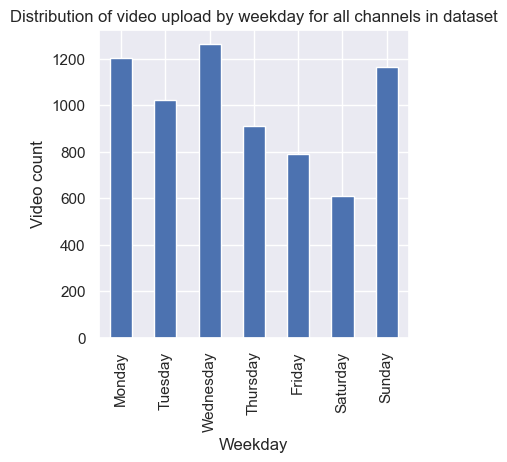

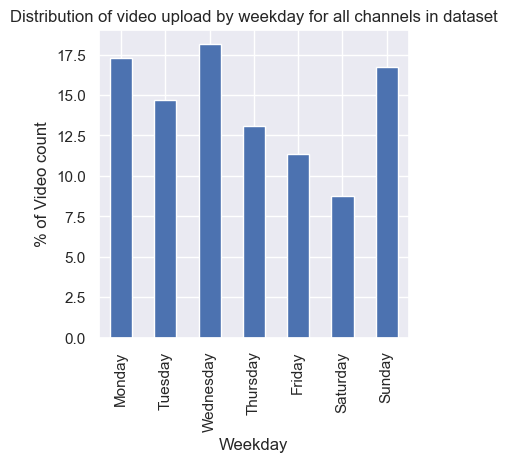

In [111]:
checkUploadDayDistribution()

Having a closer look for each channel:

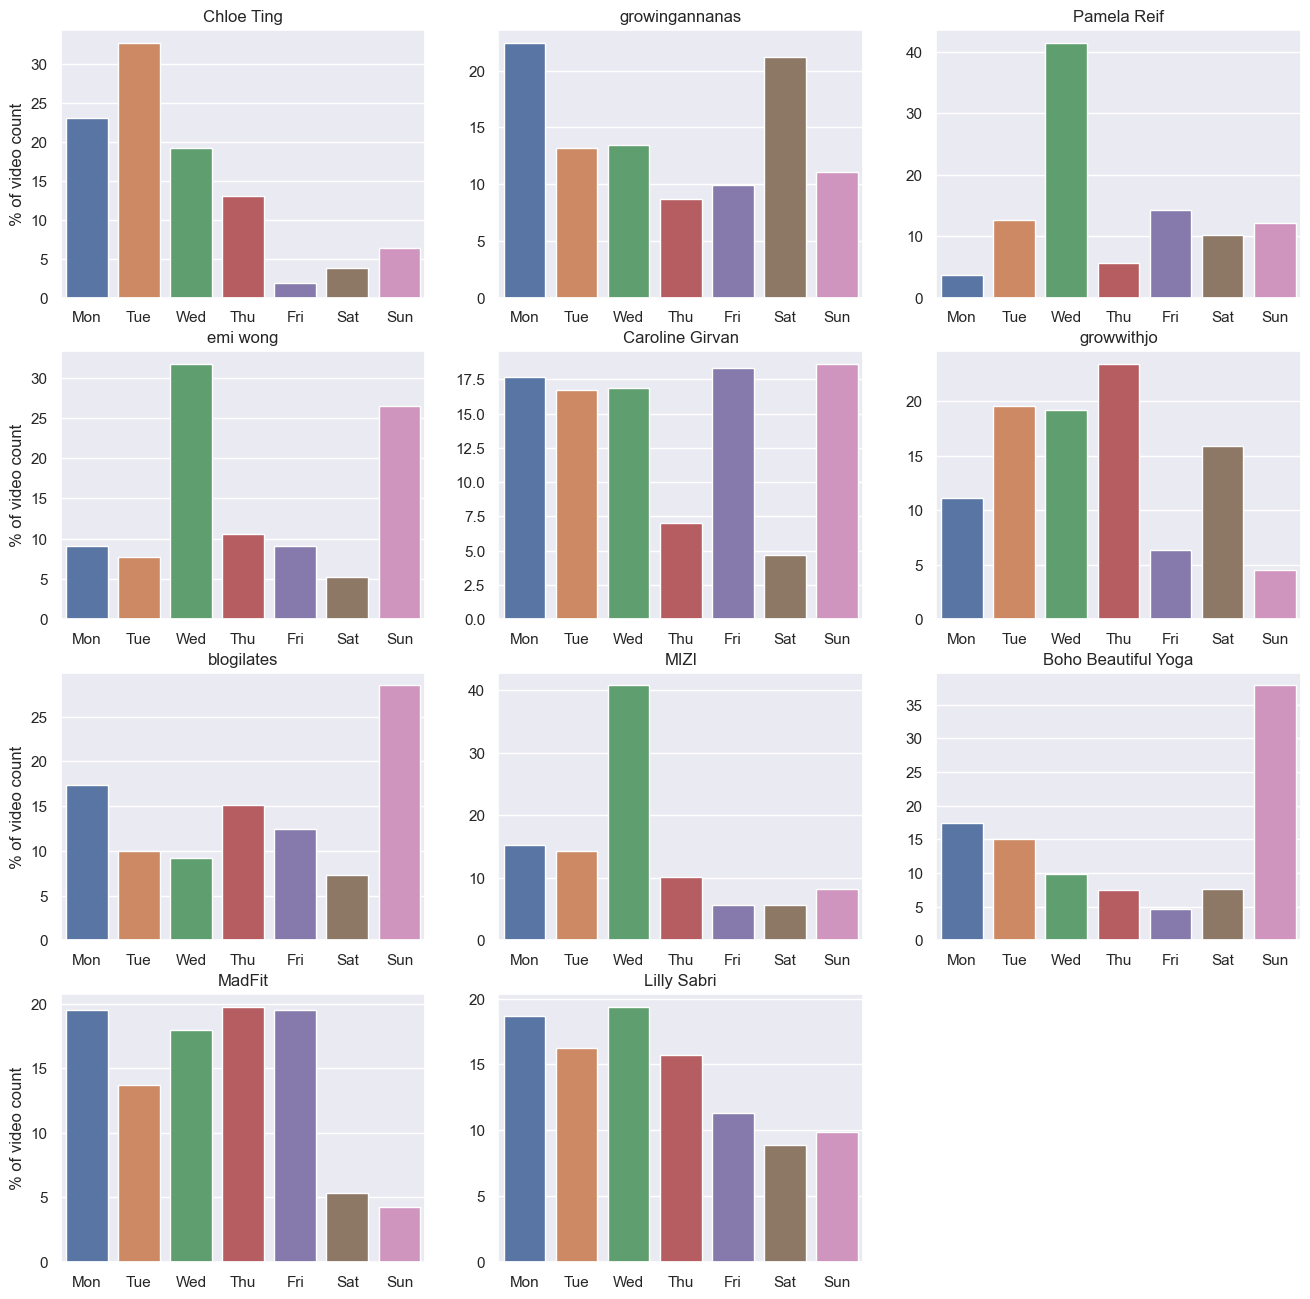

In [112]:
checkUploadDayDistributions(channelTitles)

<h2> Wordcloud for video comments </h2>

I removed the word "workout" to see what things people have to say in the comments sections of these videos. Gratitude is a strong theme, and people love the workouts they do. I have observed people tracking their progress in the comments section, noting the days on which they followed the workout video.

In [113]:
comments_df.head()

Unnamed: 0     video_id                                     comments_top20
0           0  J3cvnNmifnA  ["That's not my Chloe she looks different", 'p...
1           1  uVg3O0KeQ3E  ['Free palestine 🇸🇩🇸🇩🇸🇩🇸🇩🇸🇩🇸🇩', 'Welcome to Ne...
2           2  Nt1sOThC834  ['I love your video.❤❤', "Hi Chloe, firstly i ...
3           3  b4TXNOTaY94  ['I heard if u say your fav youtuber name 3 ti...
4           4  HSk76ZthVHw  ['Not you including useful resources and conta...

In [114]:
comments_df['comments_no_stopwords'] = comments_df['comments_top20'].apply(lambda x: parseListStr(x))

In [115]:
all_comments_words = list([a.lower() for b in comments_df['comments_no_stopwords'] for a in b])

In [116]:
all_words_edited = list(w for c in all_comments_words for w in c.split(' ') if w not in ['workout'] )

In [117]:
all_comments_words_str = ' '.join(all_words_edited) 

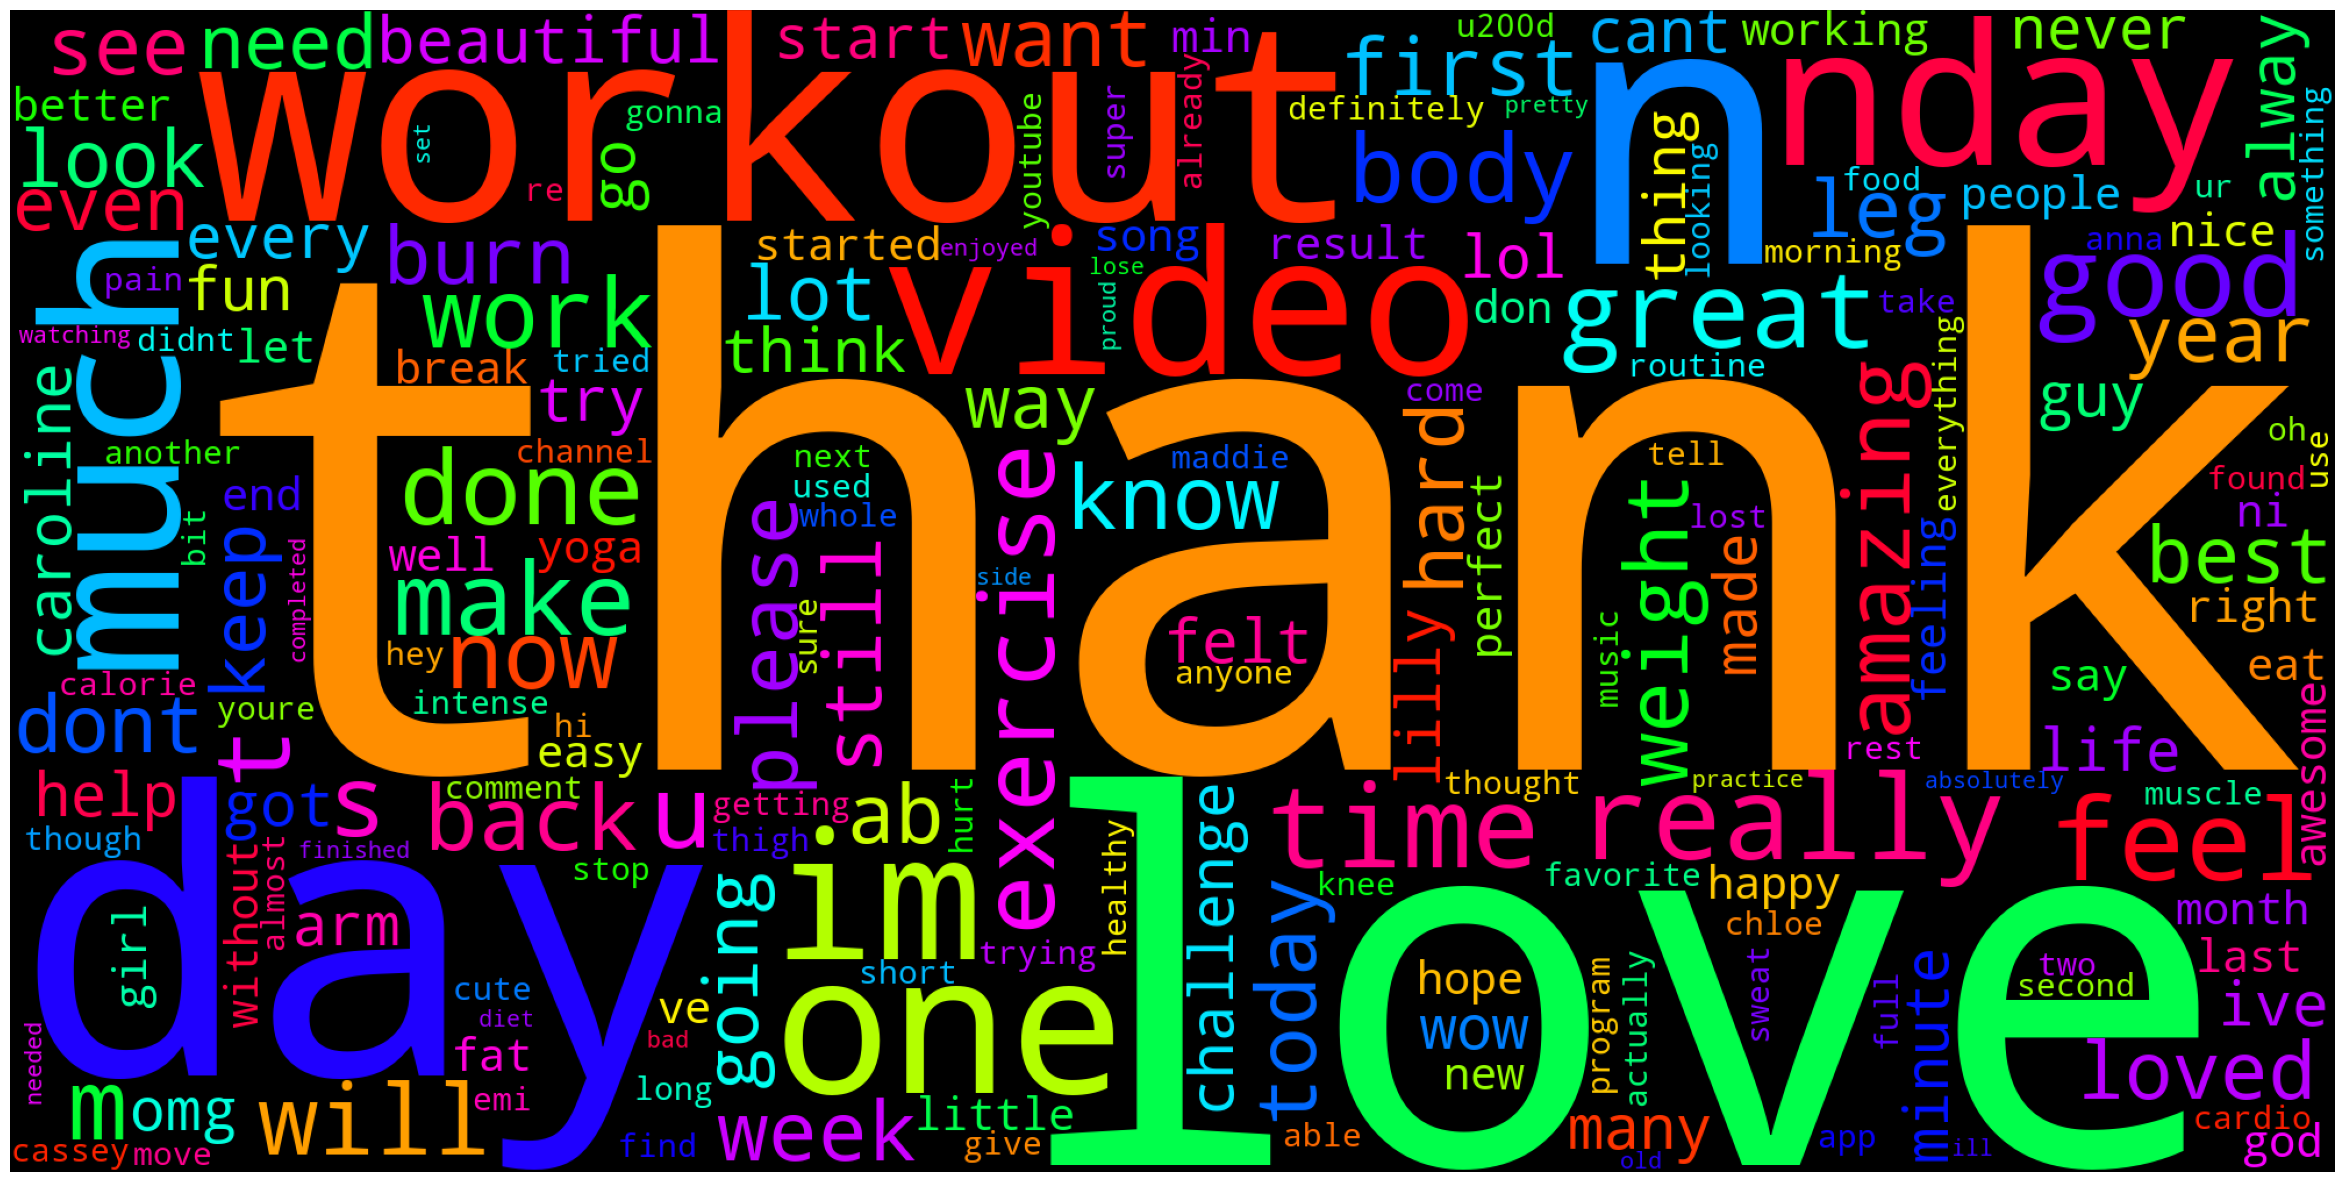

In [118]:
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='hsv', collocations=False).generate(all_comments_words_str)
plot_cloud(wordcloud)

<h1> Conclusions and Future research ideas </h1>

In this project, I have explored the video data of 11 of the most popular fitness channels featuring women as of today and revealed some interesting findings for anyone who are starting out with their own channel, particularly in the realm of fitness:

* The more likes and comments a video has, the more views the video gets (it is not guaranteed that this is a causal relationship, it is simply a correlation and can work both way). Comments seem to be a slightly better indicator for interaction than likes. The number of likes seem to follow the "social proof", which means the more views the video has, the more people will like it.

* Most videos have either 0-5 tags or 20-30 tags

* Most-viewed videos tend to have average title length of 40-75 characters. Being descriptive is not a problem.

* Videos are usually uploaded on Wednesdays and Sundays. The latter half of the week is not a particularly popular time for posting new videos.

* Comments on videos are generally positive.

<h3> Project limitation: </h3>

The findings should also be taken with a grain of salt for a number of reasons:

* The number of videos is quite small (the dataset has only ~7000 videos)

* I have only considered the first 20 comments on each video, which might not be representative for all comments.

* There are many other factors that haven't been considered in this analysis, including the marketing strategy of the creators and many random effects that would affect how successful a video is.

<h3> Ideas for future research: </h3>

To expand and build on this research project, one can:

* Expand the dataset to also smaller channels in this niche.

* Do sentiment analysis on the comments and find out which videos get more positive comments and which videos get less positive comments

* Do market research by analyzing questions in the comment threads and identifying common questions/ market gaps which could potentially filled

* Conduct this research for other niches (e.g. vlogs or beauty channels), to compare different niches with each other to see the different patterns in viewership and video characteristics.

<h3> References/ Resources used: </h3>
[1] Youtube API. Avaiable at https://developers.google.com/youtube/v3

[2] Converting video durations to time function. https://stackoverflow.com/questions/15596753/how-do-i-get-video-durations-with-youtube-api-version-3